# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos = np.shape(Y_train[Y_train == 1])[0]
    neg = np.shape(Y_train[Y_train == -1])[0]

    pi = pos/(pos + neg)
    mu_pos = mu_neg = np.zeros(X_train.shape[1])

    mu_pos = np.sum(X_train[Y_train == 1], axis = 0)/pos
    mu_neg = np.sum(X_train[Y_train == -1], axis = 0)/neg

    w = mu_neg - mu_pos
    b = 0.5 * ((np.linalg.norm(mu_pos))**2 - (np.linalg.norm(mu_neg))**2)
    
    w = w.reshape(w.shape[0], 1)
    temp = (1/pi - 1) * np.exp(np.matmul(np.transpose(w), np.transpose(X_test)) + b * np.ones((1, X_test.shape[0])))
    temp = 1/(1 + temp)
    
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(Y_test_pred.shape[0]) :
        if temp[0, i] >= 0.5 :
            Y_test_pred[i] = 1
        else : 
            Y_test_pred[i] = -1
    
    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos = np.shape(Y_train[Y_train == 1])[0]
    neg = np.shape(Y_train[Y_train == -1])[0]

    pi = pos/(pos + neg)
    mu_pos = mu_neg = np.zeros(X_train.shape[1])
    
    mu_pos = np.sum(X_train[Y_train == 1], axis = 0)/pos
    mu_neg = np.sum(X_train[Y_train == -1], axis = 0)/neg

    norm_mu_pos = np.linalg.norm(mu_pos)
    norm_mu_neg = np.linalg.norm(mu_neg)

    X_train_pos = X_train[Y_train == 1]
    for i in range(X_train_pos.shape[0]) :
        X_train_pos[i, :] -= mu_pos
    X_train_neg = X_train[Y_train == -1]
    for i in range(X_train_pos.shape[0]) :
        X_train_neg[i, :] -= mu_neg

    sigma = np.matmul(np.transpose(X_train_pos), X_train_pos) + np.matmul(np.transpose(X_train_neg), X_train_neg)
    
    sigma = sigma/X_train.shape[0]
    q = np.linalg.inv(sigma)

    eta_pos = np.matmul(np.matmul(X_test, q), mu_pos.reshape(mu_pos.shape[0], 1)) + (np.log(pi) - 0.5 * np.matmul(np.matmul(np.transpose(mu_pos), q), mu_pos)) * np.ones((X_test.shape[0], 1))
    eta_neg = np.matmul(np.matmul(X_test, q), mu_neg.reshape(mu_pos.shape[0], 1)) + (np.log(1 - pi) - 0.5 * np.matmul(np.matmul(np.transpose(mu_neg), q), mu_neg)) * np.ones((X_test.shape[0], 1))

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]) :
        if eta_pos[i, 0] >= eta_neg[i, 0] :
            Y_test_pred[i] = 1
        else :
            Y_test_pred[i] = -1
    
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos = np.shape(Y_train[Y_train == 1])[0]
    neg = np.shape(Y_train[Y_train == -1])[0]

    pi = pos/(pos + neg)
    mu_pos = mu_neg = np.zeros(X_train.shape[1])

    mu_pos = np.sum(X_train[Y_train == 1], axis = 0)/pos
    mu_neg = np.sum(X_train[Y_train == -1], axis = 0)/neg
    
    norm_mu_pos = np.linalg.norm(mu_pos)
    norm_mu_neg = np.linalg.norm(mu_neg)

    X_train_pos = X_train[Y_train == 1]
    for i in range(X_train_pos.shape[0]) :
        X_train_pos[i, :] -= mu_pos
    X_train_neg = X_train[Y_train == -1]
    for i in range(X_train_pos.shape[0]) :
        X_train_neg[i, :] -= mu_neg

    sigma_pos = np.matmul(np.transpose(X_train_pos), X_train_pos)/pos
    sigma_neg = np.matmul(np.transpose(X_train_neg), X_train_neg)/pos

    eta = lambda x, sig, q, mu, pi : np.log(pi) - 0.5 * np.log(np.linalg.det(sig)) - 0.5 * np.matmul(np.matmul(np.transpose(x - mu), q), (x - mu))

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]) :
        eta_plus = eta(X_test[i, :].reshape(X_test.shape[1], 1), sigma_pos, np.linalg.inv(sigma_pos), mu_pos.reshape(mu_pos.shape[0], 1), pi)
        eta_minus = eta(X_test[i, :].reshape(X_test.shape[1], 1), sigma_neg, np.linalg.inv(sigma_neg), mu_neg.reshape(mu_neg.shape[0], 1), 1 - pi)
        if eta_plus >= eta_minus :
            Y_test_pred[i] = 1
        else : 
            Y_test_pred[i] = -1
    
    return Y_test_pred


In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


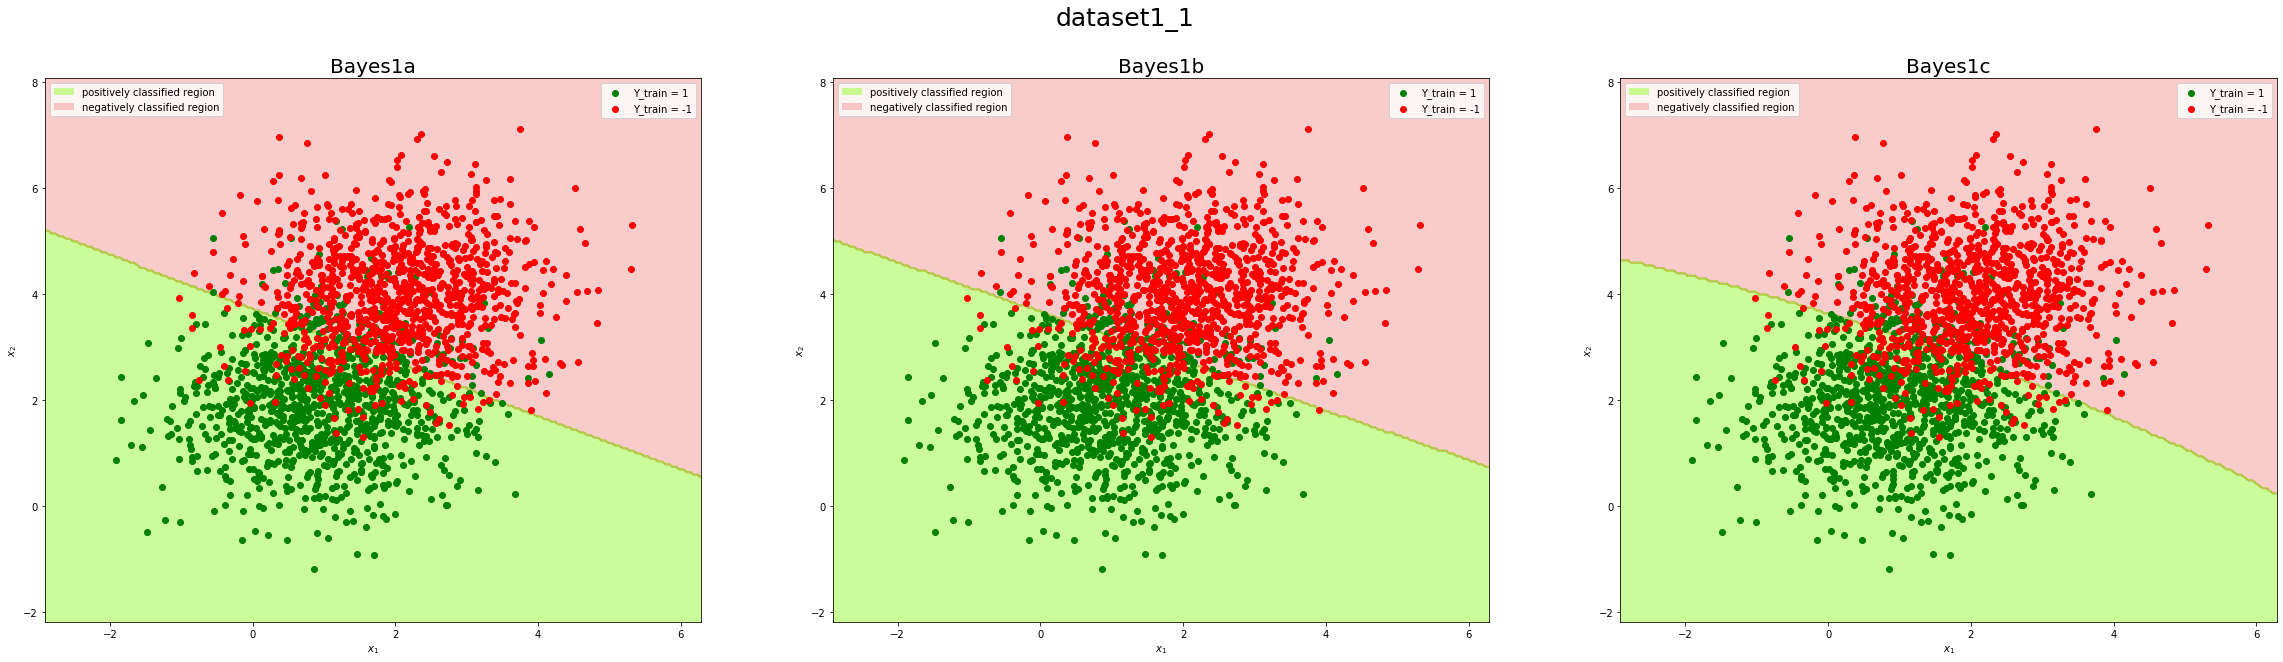

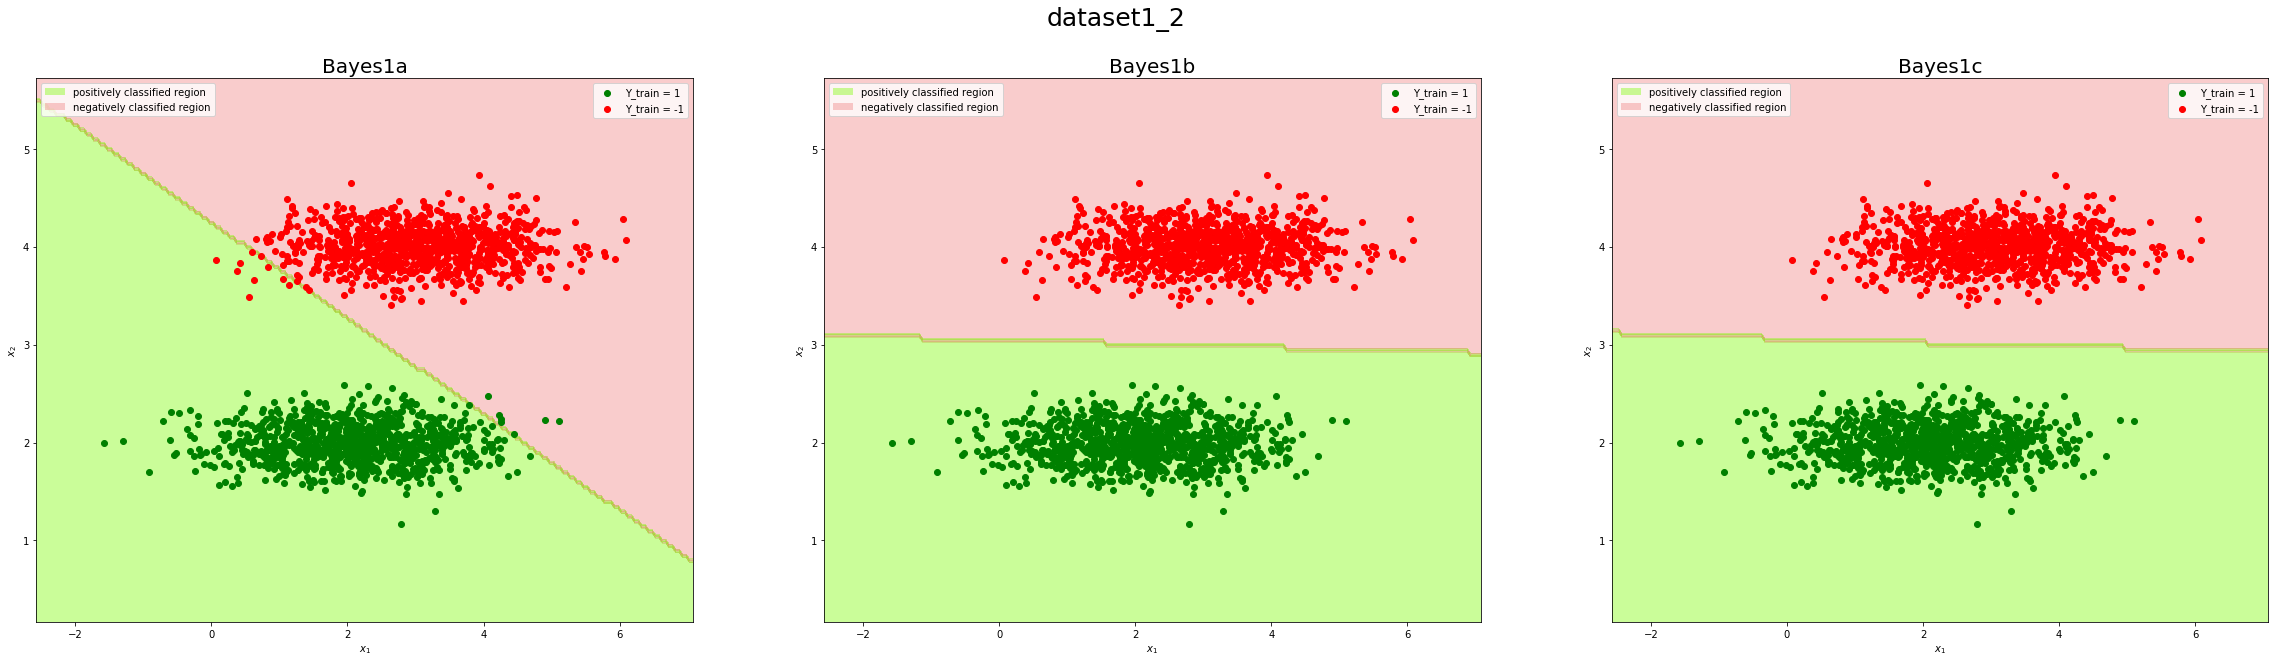

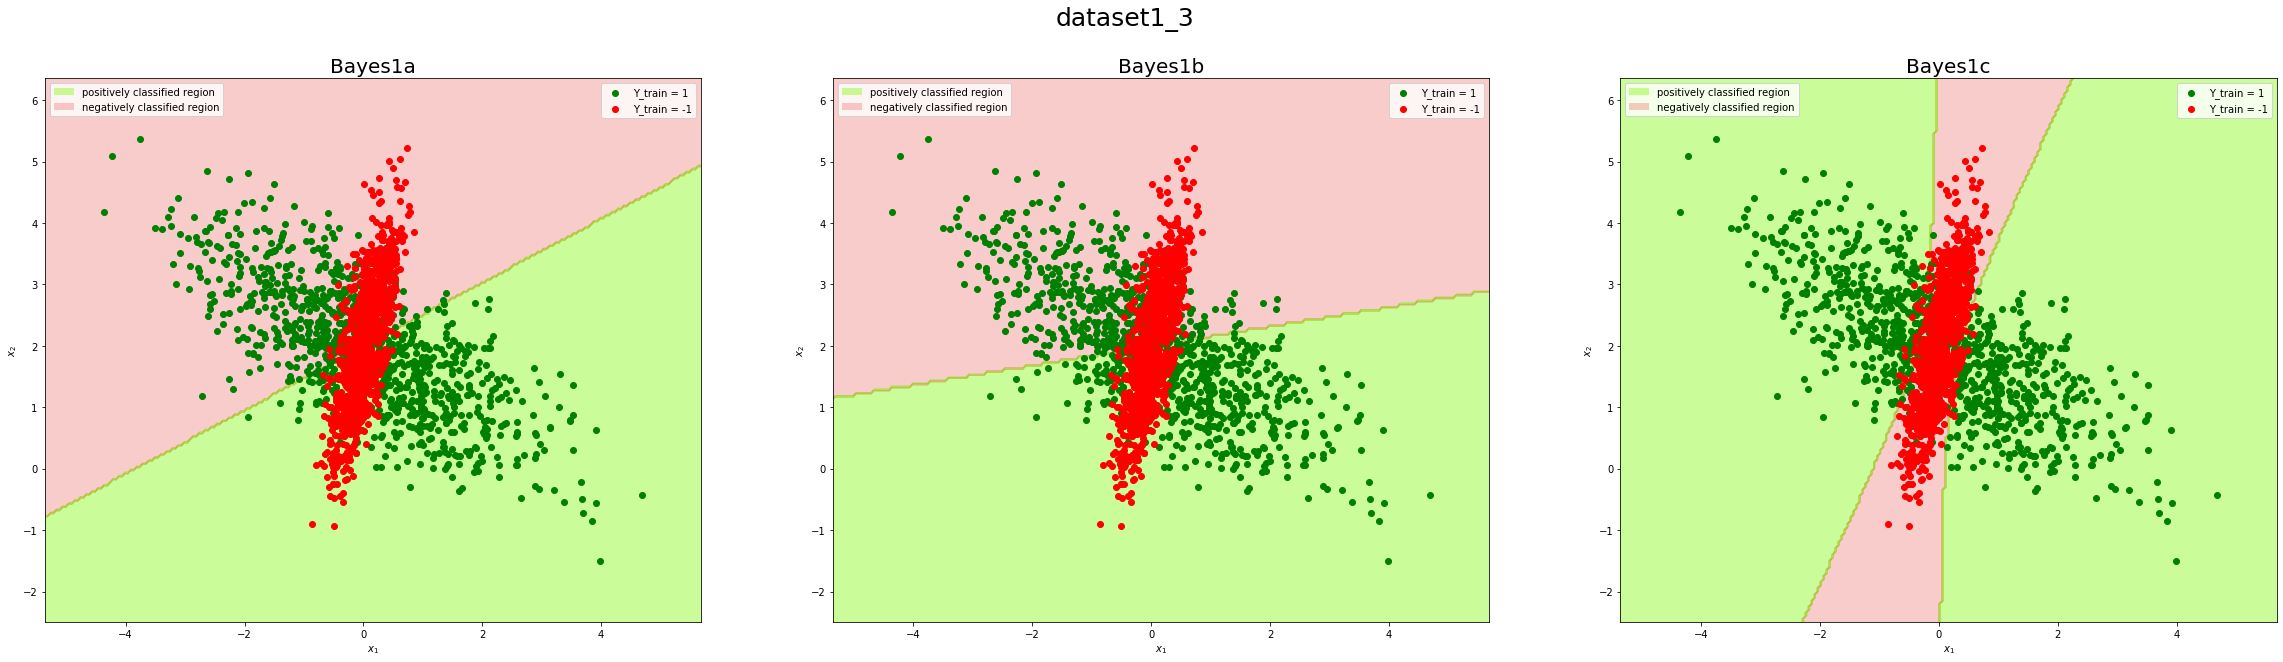

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

dataset = {}
dataset[1] = np.load('../../Data/dataset1_1.npz')
dataset[2] = np.load('../../Data/dataset1_2.npz')
dataset[3] = np.load('../../Data/dataset1_3.npz')

X_train = {}
Y_train = {}
Y_test = {}
X_test = {}
Y_test_pred_1a = {}
Y_test_pred_1b = {}
Y_test_pred_1c = {}
error_1a = {}
error_1b = {}
error_1c = {}

for i in range(1, 4) :
    X_train[i] = dataset[i]['arr_0']
    Y_train[i] = dataset[i]['arr_1']
    X_test[i] = dataset[i]['arr_2']
    Y_test[i] = dataset[i]['arr_3']
    Y_test_pred_1a[i] = Bayes1a(X_train[i], Y_train[i], X_test[i])
    Y_test_pred_1b[i] = Bayes1b(X_train[i], Y_train[i], X_test[i])
    Y_test_pred_1c[i] = Bayes1c(X_train[i], Y_train[i], X_test[i])
    error_1a[i] = Y_test[i][Y_test[i] != Y_test_pred_1a[i]].shape[0]/Y_test[i].shape[0]
    error_1b[i] = Y_test[i][Y_test[i] != Y_test_pred_1b[i]].shape[0]/Y_test[i].shape[0]
    error_1c[i] = Y_test[i][Y_test[i] != Y_test_pred_1c[i]].shape[0]/Y_test[i].shape[0]

X_train_pos = {}
X_train_neg = {}

#Code for plotting
for i in range(1, 4) :
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(40, 10, forward = True)
    fig.suptitle("dataset1_" + str(i), fontsize = 25)

    X_train_pos[i] = X_train[i][Y_train[i] == 1]
    X_train_neg[i] = X_train[i][Y_train[i] == -1]

    x_min, x_max = X_train[i][:, 0].min() - 1, X_train[i][:, 0].max() + 1
    y_min, y_max = X_train[i][:, 1].min() - 1, X_train[i][:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Za = Bayes1a(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Zb = Bayes1b(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Zc = Bayes1c(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Za = Za.reshape(xx.shape)
    Zb = Zb.reshape(xx.shape)
    Zc = Zc.reshape(xx.shape)
    CS0 = ax[0].contourf(xx, yy, Za, colors = ('#f08080', '#7cfc00'), alpha = 0.4)
    CS1 = ax[1].contourf(xx, yy, Zb, colors = ('#f08080', '#7cfc00'), alpha = 0.4)
    CS2 = ax[2].contourf(xx, yy, Zc, colors = ('#f08080', '#7cfc00'), alpha = 0.4)
    legend = {}
    proxy0 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS0.collections]
    legend[0] = ax[0].legend(proxy0[::-1], ["positively classified region", "negatively classified region"], loc = "upper left")
    proxy1 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS1.collections]
    legend[1] = ax[1].legend(proxy1[::-1], ["positively classified region", "negatively classified region"], loc = "upper left")
    proxy2 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS2.collections]
    legend[2] = ax[2].legend(proxy2[::-1], ["positively classified region", "negatively classified region"], loc = "upper left")
    
    for j in range(3) :
        ax[j].scatter(X_train_pos[i][:, 0], X_train_pos[i][:, 1], color = 'g', label = 'Y_train = 1')
        ax[j].scatter(X_train_neg[i][:, 0], X_train_neg[i][:, 1], color = 'r', label = 'Y_train = -1')
        
    for j in range(3) :
        char = chr((ord('a') + j))
        ax[j].set_title("Bayes1" + str(char), fontsize = 20)
        ax[j].set_xlabel("$x_1$", fontsize = 10)
        ax[j].set_ylabel("$x_2$", fontsize = 10)
        ax[j].legend()
        ax[j].add_artist(legend[j])


***
### Bayes1a
#### Assumptions
* The class conditionals are distributed normally with different mean and identical covariance of $I$ i.e. $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$.

#### Parameters 
* $a = P(Y = 1)$
* $\mu_{+}$
* $\mu_{-}$

#### ML estimates for the parameters
##### **Notation** : $C_{+}, C_{-}$ represent the positive and negative training classes and $n_{+}, n_{-}$ represent their sizes, using this notation, we get

$$a = \frac{n_+}{n}$$
$$\mu_{+} = \frac{1}{n_{+}} \sum_{x_+ \in C_+} x_+ $$
$$\mu_{-} = \frac{1}{n_{-}} \sum_{x_- \in C_-} x_- $$

#### Shape of the decision boundary
* Predicts a linear decision boundary of the form $w^{T}x + b = \ln(a/1-a)$ where
    $w = \mu_{-} - \mu_{+}$ and $b = \frac{1}{2}(||\mu_{+}||^{2} - ||\mu_{-}||^2)$.
    
***
### Bayes1b
#### Assumptions
* The class conditionals are distributed normally with different mean and identical covariance of $\Sigma$ i.e. $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$.

#### Parameters 
* $a = P(Y = 1)$
* $\mu_{+}$
* $\mu_{-}$
* $\Sigma$

#### ML estimates for the parameters
##### **Notation** : $C_{+}, C_{-}$ represent the positive and negative training classes and $n_{+}, n_{-}$ represent their sizes, using this notation, we get

$$a = \frac{n_+}{n}$$
$$\mu_{+} = \frac{1}{n_{+}} \sum_{x_+ \in C_+} x_+ $$
$$\mu_{-} = \frac{1}{n_{-}} \sum_{x_- \in C_-} x_- $$
$$\Sigma = \frac{1}{n} \Big( \sum_{x_+ \in C_{+}} (x_+ - \mu_{+})(x_+ - \mu_{+})^{T} + \sum_{x_- \in C_{-}} (x_- - \mu_{-})(x_- - \mu_{-})^{T} \Big)$$

#### Shape of the decision boundary
* Predicts a linear decision boundary of the form $w^{T}x + b = \ln(a/1-a)$ where
    $w = \Sigma^{-1} (\mu_{-} - \mu_{+})$ and $b = \frac{1}{2}(\mu_{+}^{T}\Sigma^{-1}\mu_{+} - \mu_{-}^{T}\Sigma^{-1}\mu_{-})$.


***

### Bayes1c
#### Assumptions
* The class conditionals are distributed normally with different mean and different covariances i.e. $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_{-})$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$.

#### Parameters 
* $a = P(Y = 1)$
* $\mu_{+}$
* $\mu_{-}$
* $\Sigma_+$
* $\Sigma_-$

#### ML estimates for the parameters
##### **Notation** : $C_{+}, C_{-}$ represent the positive and negative training classes and $n_{+}, n_{-}$ represent their sizes, using this notation, we get

$$a = \frac{n_+}{n}$$
$$\mu_{+} = \frac{1}{n_{+}} \sum_{x_+ \in C_+} x_+ $$
$$\mu_{-} = \frac{1}{n_{-}} \sum_{x_- \in C_-} x_- $$
$$\Sigma_{+} = \frac{1}{n_+} \Big( \sum_{x_+ \in C_{+}} (x_+ - \mu_{+})(x_+ - \mu_{+})^{T} \Big)$$
$$\Sigma_{-} = \frac{1}{n_-} \Big( \sum_{x_- \in C_{-}} (x_- - \mu_{-})(x_- - \mu_{-})^{T} \Big) $$

#### Shape of the decision boundary
* Predicts a non-linear decision boundary.

***

### Observations on the behaviour of the algorithms on each dataset

#### dataset1_1
* The scatter plot of this data seems to indicate that both the positive and the negative training classes are normally distributed with fairly similar covariances. But there is significant overlap between the supports of the two distributions. 
* Because of this overlap, all three classifiers have an inherent Bayes error, this is the minimum error for any possible classifier. The Bayes error is non-zero if there is a non-zero probability of a given instance belonging to more than one class. Such a case clearly occurs in this dataset in the overlap region. 
* It is this Bayes error that is reflected in all the three classification algorithms as 0.126, 0.1245 and 0.1245, despite the assumptions of all three algorithms being valid.

#### dataset1_2
* The first thing we can observe is that the two classes are linearly separable i.e. the supports of the class conditionals are such that they can be seperated by a hyperplane. Secondly, while the assumptions of both of the class conditionals being normal with equal covariances seem valid, this covariance is definitely not $I$. 
* Because of this, the assumption of the Bayes1a classifier that both the class conditionals are normals with $I$ as the covariance matrix, is invalid and therefore it performs relatively poorly as compared to the other two with a misclassification error of 0.0085. Whereas, both the other two algorithms, Bayes1b and Bayes1c which make valid assumptions, perform exceptionally well on this data with 0 misclassification error. This is also because the supports of the class conditionals are linearly separable. 


#### dataset1_3
* In this dataset, the supports of the two class conditionals are not linearly separable. Furthermore, while the assumption that both the class conditionals are normals seems valid, the positive and negative class conditionals have different covariances. 
* Because the supports are not linearly seperable, Bayes1a and Bayes1b which output linear decision boundaries perform very poorly with high misclassification errors of 0.497 and 0.495 respectively. Whereas, the Bayes1c algorithm which outputs a classifier with a non-linear decision boundary is able to differentiate between the two classes and performs relatively better with a misclassification error of 0.135. 
Again, there is a significant inherent error in the data in the form of the Bayes error as evident from the overlap between the supports of two class conditionals. 

The very slight differences between the errors in the classifiers produced by Bayes1a and Bayes1b despite both of them producing linear decision boundaries can be attributed to the fact that the linear decision boundary produced by the Bayes1a algorithm is constrained to be the perpendicular bisector of $\mu_1$ and $\mu_2$, whereas, the linear decision boundary produced by the Bayes1b algorithm is not constrained to be so. 

***

### Error rate for the 3 classifiers on the 3 datasets
The errors reported in the table below are calculated as misclassification fractions i.e.

$$ \sum_{x \in X_{test}} \frac{I(h(x) \neq y_{test})}{n_{test}}$$

| Dataset | Misclassification fraction for Bayes1a | Misclassification fraction for Bayes1b | Misclassification fraction for Bayes1c |
|---------|----------------------------------------|----------------------------------------|----------------------------------------|
| $1\_1$     | $0.126$                                  | $0.1245$                                 | $0.1245$                                 |
| $1\_2$     | $0.0085$                                 | $0.0$                                    | $0.0$                                    |
| $1\_3$     | $0.497$                                  | $0.495$                                  | $0.135$                                  |

***



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = np.zeros(4)
    pi = np.zeros(4)
    for i in range(4) :
        n[i] = Y_train[Y_train == (i + 1)].shape[0]
    
    for i in range(4) :
        pi[i] = n[i]/(np.sum(n))
    
    mu = np.zeros((4, X_train.shape[1]))

    for i in range(4) :
        mu[i, :] = (1/n[i]) * np.sum(X_train[Y_train == (i + 1)], axis = 0)
    
    norm_mu_sqrd = {}
    for i in range(4) :
        norm_mu_sqrd[i] = np.linalg.norm(mu[i])**2

    eta = np.zeros((X_test.shape[0], 4))
    for i in range(4) :
        eta[:, i] =  np.exp(np.matmul(X_test, np.transpose(mu[i])) - 0.5 * norm_mu_sqrd[i]) * pi[i]
    
    loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    predictor = np.matmul(eta, loss_matrix)
    predictor = (np.argmin(predictor, axis = 1) + np.ones(predictor.shape[0])).astype(int)

    return predictor

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = np.zeros(4)
    pi = np.zeros(4)
    for i in range(4) :
        n[i] = Y_train[Y_train == (i + 1)].shape[0]
    
    for i in range(4) :
        pi[i] = n[i]/(np.sum(n))
    
    mu = np.zeros((4, X_train.shape[1]))
    for i in range(4):
        mu[i, :] = (1/n[i]) * np.sum(X_train[Y_train == (i + 1)], axis = 0)

    X_train_class = {}
    for i in range(4) :
        X_train_class[i] = X_train[Y_train == (i + 1)]
        for j in range(X_train_class[i].shape[0]) :
            X_train_class[i][j] -= mu[i]
    
    sigma = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(4) :
        sigma += np.matmul(np.transpose(X_train_class[i]), X_train_class[i])
    sigma = sigma/X_train.shape[0]
    q = np.linalg.inv(sigma)

    eta = np.zeros((X_test.shape[0], 4))
    denominator = np.sqrt(np.linalg.det(sigma))

    norm_mu_sqrd = {}
    for i in range(4) :
        norm_mu_sqrd[i] = 0.5 * np.matmul(np.matmul(mu[i], q), np.transpose(mu[i]))
    
    for i in range(4) :
        eta[:, i] = np.exp(np.matmul(np.matmul(X_test, q), np.transpose(mu[i])) - norm_mu_sqrd[i]) * pi[i]
    
    loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    predictor = np.matmul(eta, loss_matrix)
    predictor = (np.argmin(predictor, axis = 1) + np.ones(predictor.shape[0])).astype(int)

    return predictor


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = np.zeros(4)
    pi = np.zeros(4)
    for i in range(4) :
        n[i] = Y_train[Y_train == (i + 1)].shape[0]
    
    for i in range(4) :
        pi[i] = n[i]/(np.sum(n))
    
    mu = np.zeros((4, X_train.shape[1]))
    for i in range(4):
        mu[i, :] = (1/n[i]) * np.sum(X_train[Y_train == (i + 1)], axis = 0)
    
    exp = lambda x, mu, q : np.exp(-0.5 * np.matmul(np.matmul(np.transpose(x - mu), q), (x - mu))) 
    mul = lambda x, mu : np.matmul(x - mu, np.transpose(x - mu))
    
    X_train_class = {}
    for i in range(4) :
        X_train_class[i] = X_train[Y_train == (i + 1)]
        for j in range(X_train_class[i].shape[0]) :
            X_train_class[i][j] -= mu[i]

    sigma = {}
    for k in range(4) :
        sigma[k] = np.matmul(np.transpose(X_train_class[k]), X_train_class[k])/n[k]
    
    q = {}
    for i in range(4) : 
        q[i] = np.linalg.inv(sigma[i])
    
    eta = np.zeros((X_test.shape[0], 4))
    
    denominator = np.zeros(4)
    for i in range(4) :
        denominator[i] = np.sqrt(np.linalg.det(sigma[i]))
        
    for i in range(X_test.shape[0]) :
        for j in range(4) :
            eta[i, j] = (exp(X_test[i, :], mu[j, :], q[j]) * pi[j])/denominator[j]
    
    loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    predictor = np.matmul(eta, loss_matrix)
    predictor = (np.argmin(predictor, axis = 1) + np.ones(predictor.shape[0])).astype(int)

    return predictor

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


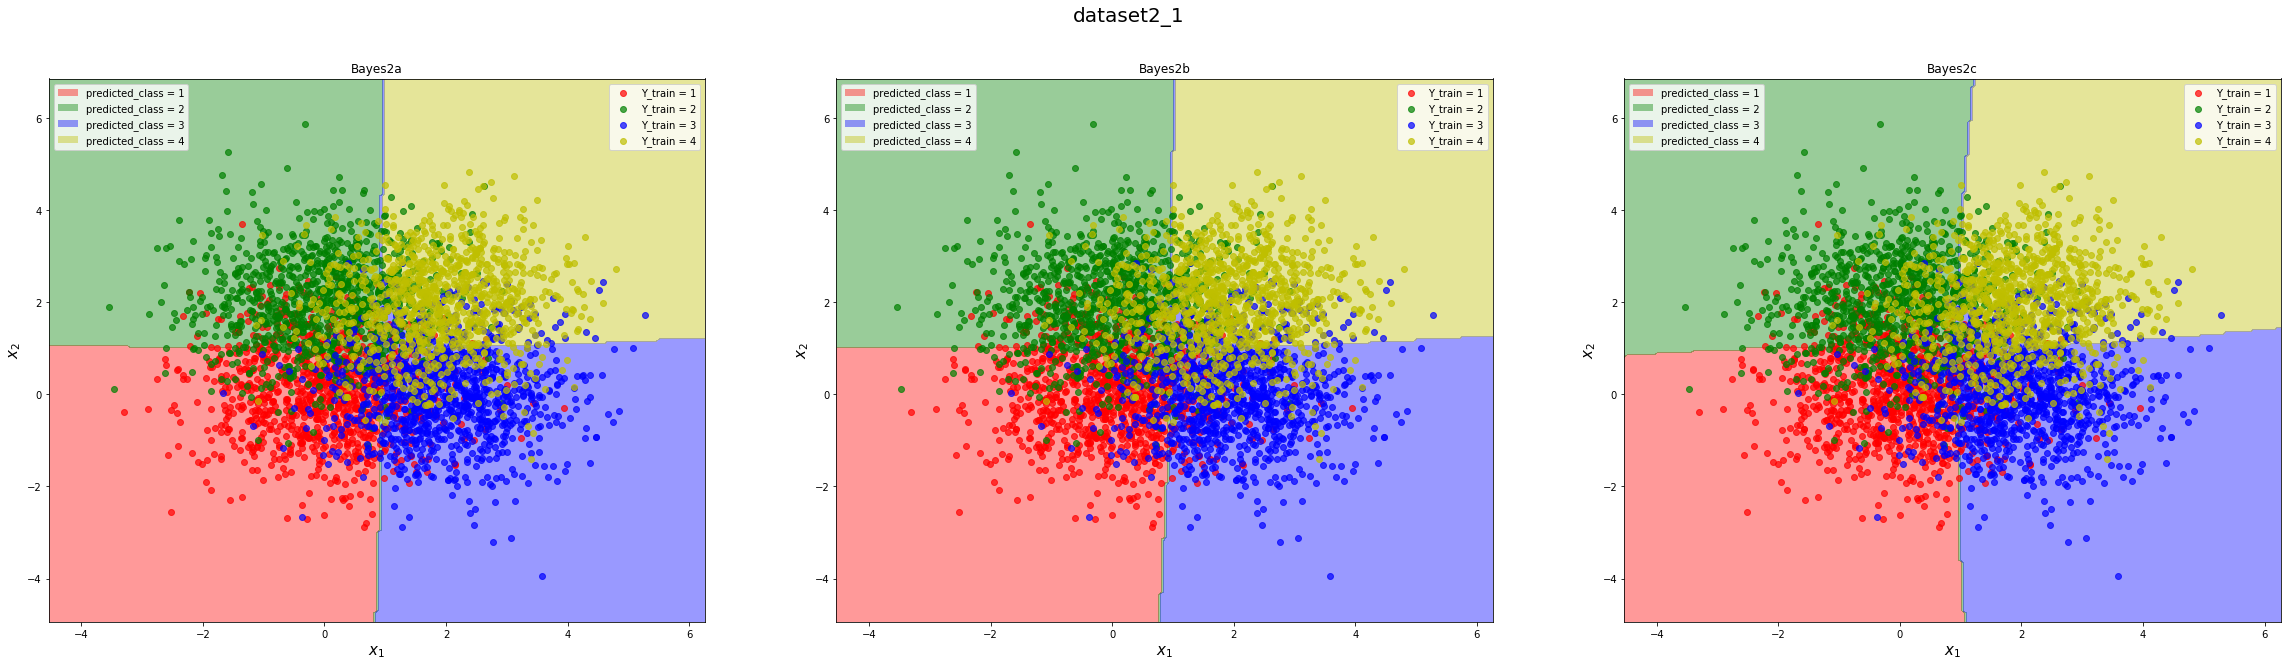

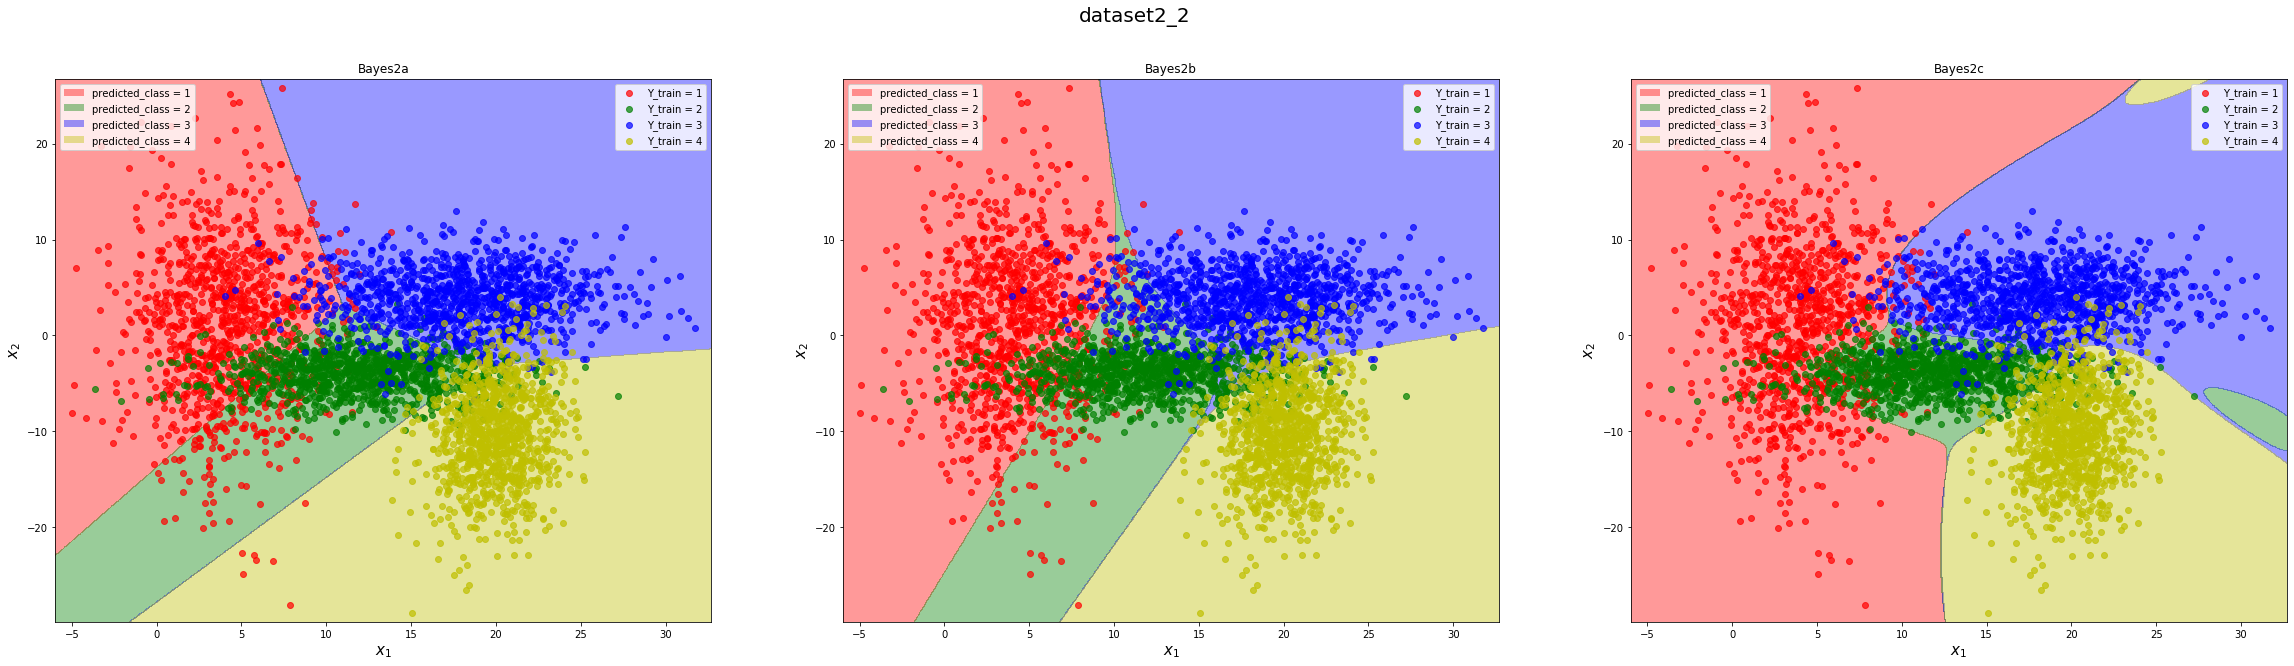

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
dataset = {}
dataset[1] = np.load('../../Data/dataset2_1.npz')
dataset[2] = np.load('../../Data/dataset2_2.npz')

X_train = {}
X_test = {}
Y_train = {}
Y_test = {}
Y_test_pred_2a = {}
Y_test_pred_2b = {}
Y_test_pred_2c = {}
error_2a = {}
error_2b = {}
error_2c = {}
confusion_matrix_2a = {}
confusion_matrix_2b = {}
confusion_matrix_2c = {}

loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

for i in range(1, 3) :
    X_train[i] = dataset[i]['arr_0']
    Y_train[i] = dataset[i]['arr_1']
    X_test[i] = dataset[i]['arr_2']
    Y_test[i] = dataset[i]['arr_3']
    Y_test_pred_2a[i] = Bayes2a(X_train[i], Y_train[i], X_test[i])
    Y_test_pred_2b[i] = Bayes2b(X_train[i], Y_train[i], X_test[i])
    Y_test_pred_2c[i] = Bayes2c(X_train[i], Y_train[i], X_test[i])
    error_2a[i] = error_2b[i] = error_2c[i] = 0
    confusion_matrix_2a[i] = np.zeros((4, 4))
    confusion_matrix_2b[i] = np.zeros((4, 4))
    confusion_matrix_2c[i] = np.zeros((4, 4))
    for j in range(Y_test[i].shape[0]) :
        error_2a[i] += loss_matrix[int(Y_test[i][j] - 1), int(Y_test_pred_2a[i][j] - 1)]
        confusion_matrix_2a[i][int(Y_test[i][j] - 1), int(Y_test_pred_2a[i][j] - 1)] += 1
        error_2b[i] += loss_matrix[int(Y_test[i][j] - 1), int(Y_test_pred_2b[i][j] - 1)]
        confusion_matrix_2b[i][int(Y_test[i][j] - 1), int(Y_test_pred_2b[i][j] - 1)] += 1
        error_2c[i] += loss_matrix[int(Y_test[i][j] - 1), int(Y_test_pred_2c[i][j] - 1)]
        confusion_matrix_2c[i][int(Y_test[i][j] - 1), int(Y_test_pred_2c[i][j] - 1)] += 1
    error_2a[i] /= Y_test[i].shape
    error_2b[i] /= Y_test[i].shape
    error_2c[i] /= Y_test[i].shape

"""
for i in range(1, 3) :
    #print(error_2a[i], error_2b[i], error_2c[i])
    print(confusion_matrix_2a[i])
    print(confusion_matrix_2b[i])
    print(confusion_matrix_2c[i])
"""

X_train_class = {}
X_train_class = {}

#Code for plotting below
for i in range(1, 3) :
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(40, 10, forward = True)
    fig.suptitle("dataset2_" + str(i), fontsize = 20)

    X_train_class[i] = {}
    for j in range(1, 5) :
        X_train_class[i][j] = X_train[i][Y_train[i] == j]

    x_min, x_max = X_train[i][:, 0].min() - 1, X_train[i][:, 0].max() + 1
    y_min, y_max = X_train[i][:, 1].min() - 1, X_train[i][:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Za = Bayes2a(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Zb = Bayes2b(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Zc = Bayes2c(X_train[i], Y_train[i], np.c_[xx.ravel(), yy.ravel()])
    Za = Za.reshape(xx.shape)
    Zb = Zb.reshape(xx.shape)
    Zc = Zc.reshape(xx.shape)
    CS0 = ax[0].contourf(xx, yy, Za, levels = [0, 1, 2, 3, 4], colors = ('r', 'g', 'b', 'y'), alpha = 0.4)
    CS1 = ax[1].contourf(xx, yy, Zb, levels = [0, 1, 2, 3, 4], colors = ('r', 'g', 'b', 'y'), alpha = 0.4)
    CS2 = ax[2].contourf(xx, yy, Zc, levels = [0, 1, 2, 3, 4], colors = ('r', 'g', 'b', 'y'), alpha = 0.4)
    legend = {}
    proxy0 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS0.collections]
    legend[0] = ax[0].legend(proxy0, ["predicted_class = 1", "predicted_class = 2", "predicted_class = 3", "predicted_class = 4"], loc = "upper left")
    proxy1 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS1.collections]
    legend[1] = ax[1].legend(proxy0, ["predicted_class = 1", "predicted_class = 2", "predicted_class = 3", "predicted_class = 4"], loc = "upper left")
    proxy2 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS2.collections]
    legend[2] = ax[2].legend(proxy0, ["predicted_class = 1", "predicted_class = 2", "predicted_class = 3", "predicted_class = 4"], loc = "upper left")
    
    for j in range(3) :
        ax[j].scatter(X_train_class[i][1][:, 0],X_train_class[i][1][:, 1], color = 'r', label = 'Y_train = 1', alpha = 0.7)
        ax[j].scatter(X_train_class[i][2][:, 0],X_train_class[i][2][:, 1], color = 'g', label = 'Y_train = 2', alpha = 0.7)
        ax[j].scatter(X_train_class[i][3][:, 0],X_train_class[i][3][:, 1], color = 'b', label = 'Y_train = 3', alpha = 0.7)
        ax[j].scatter(X_train_class[i][4][:, 0],X_train_class[i][4][:, 1], color = 'y', label = 'Y_train = 4', alpha = 0.7)
        
    for k in range(3) :
        char = chr((ord('a') + k))
        ax[k].set_title("Bayes2" + str(char))
        ax[k].set_xlabel("$x_1$", fontsize = 15)
        ax[k].set_ylabel("$x_2$", fontsize = 15)
        ax[k].legend()
        ax[k].add_artist(legend[k])

***
### Bayes2a
#### Assumptions
* $ X | Y = a \sim \mathcal{N}(\mu_a, I)$   $\forall i \in \{ 1, 2, 3, 4 \}$

#### Parameters 
* $P(Y = a)$  $\forall i \in \{ 1, 2, 3, 4 \}$
* $\mu_a$ $\forall i \in \{ 1, 2, 3, 4 \}$

***

### Bayes2b
#### Assumptions
* $ X | Y = a \sim \mathcal{N}(\mu_a, \Sigma)$   $\forall i \in \{ 1, 2, 3, 4 \}$

#### Parameters 
* $P(Y = a)$  $\forall i \in \{ 1, 2, 3, 4 \}$
* $\mu_a$ $\forall i \in \{ 1, 2, 3, 4 \}$
* $\Sigma$

***
### Bayes2c
#### Assumptions
* $ X | Y = a \sim \mathcal{N}(\mu_a, \Sigma_a)$   $\forall i \in \{ 1, 2, 3, 4 \}$

#### Parameters 
* $P(Y = a)$  $\forall i \in \{ 1, 2, 3, 4 \}$
* $\mu_a$ $\forall i \in \{ 1, 2, 3, 4 \}$
* $\Sigma_a$ $\forall i \in \{ 1, 2, 3, 4 \}$

***
#### ML Estimates
The ML estimates are obtained as simple extenstions of the case for Bayes1a, Bayes1b, Bayes1c. \
Under similar notations,
the parameters $P(Y = a)$ are estimated as 

$$ P(Y = a) = \frac{n_a}{n}$$

$$\mu_a = \frac{1}{n_a} \sum_{x_a \in C_a} x_a$$

In the case of common covariance, $\Sigma$ is estimated as

$$\Sigma = \frac{1}{n} \sum_{a = 1}^{4}\sum_{x_a \in C_a} (x_a - \mu_{a})(x_a - \mu_a)^{T}$$

and in the case of different covariances, $\Sigma_{a}$ is estimated as

$$\Sigma_{a} = \frac{1}{n_{a}} \sum_{x_{a} \in C_{a}} (x_{a} - C_{a}) (x_{a} - C_{a})^{T}$$
***
#### Observations 
* In dataset2_1, the assumptions that all four class conditionals are normals with identical covariances seems to be valid, furthermore, this identical covariance seems to be $I$ from the absence of any skewed nature of the distributions in the scatter plot (unlike in dataset1_2). 
* Therefore, the assumptions of Bayes2a, 2b, 2c, all seem to be valid. Despite this, the classfiers learnt from all three algorithms report a high and almost equal expected loss of $\approx$ 0.428. We again see a significant overlap between the supports of the 4 distributions, therefore, the high expected loss can be again attributed to Bayes error which is non-zero as there is a non-zero probability of a given instance belonging to more than one class. 
* In dataset2_2, all four class conditionals seem to be normals with different covariances. This fits the assumption of the Bayes2c algorithm well, therefore the classifier output by this algorithm has the least expected loss of 0.14075. The other two algorithms give poor classifiers as both their assumptions are not met. 
* There is significant overlap between the four distributions in dataset2_2 too, but this overlap is not as much as in dataset2_1, therefore, the inherent Bayes error in the classifiers produced for this dataset are lesser. This explains why the expected loss for dataset2_2 seems to be lesser in general than the expected loss for dataset1_1.
***
### Expected Loss
| Dataset | Expected Loss for Bayes2a | Expected Loss for Bayes2b | Expected Loss for Bayes2c |
|---------|---------------------------|---------------------------|---------------------------|
| 2_1     | $0.42975$                   | $0.429$                     | $0.42775$                   |
| 2_2     | $0.1835$                    | $0.1895$                    | $0.14075$                   |

***
### Confusion Matrices
#### Dataset 1
| Bayes2a    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $633$        | $219$        | $136$        | $12$         |
| Y_test = 2 | $97$         | $738$        | $62$         | $103$        |
| Y_test = 3 | $86$         | $49$         | $770$        | $95$         |
| Y_test = 4 | $15$         | $136$        | $194$        | $655$        |



| Bayes2b    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $633$        | $218$        | $137$        | $12$         |
| Y_test = 2 | $95$         | $743$        | $60$         | $102$        |
| Y_test = 3 | $84$         | $49$         | $773$        | $94$         |
| Y_test = 4 | $16$         | $137$        | $196$        | $651$        |



| Bayes2c    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $634$        | $217$        | $138$        | $11$         |
| Y_test = 2 | $99$         | $742$        | $61$         | $98$        |
| Y_test = 3 | $87$         | $47$         | $772$        | $94$         |
| Y_test = 4 | $15$         | $134$        | $201$        | $650$        |

***
### Dataset 2

| Bayes2a    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $830$        | $150$        | $18$         | $2$          |
| Y_test = 2 | $93$         | $748$        | $46$         | $77$         |
| Y_test = 3 | $30$         | $61$         | $905$        | $4$          |
| Y_test = 4 | $0$          | $23$         | $78$         | $899$        |



| Bayes2b    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $891$        | $106$        | $3$          | $0$          |
| Y_test = 2 | $119$        | $691$        | $124$        | $66$         |
| Y_test = 3 | $23$         | $106$        | $864$        | $7$          |
| Y_test = 4 | $0$          | $5$          | $102$        | $893$        |



| Bayes2c    | Y_pred = 1 | Y_pred = 2 | Y_pred = 3 | Y_pred = 4 |
|------------|------------|------------|------------|------------|
| Y_test = 1 | $901$        | $80$         | $19$         | $0$          |
| Y_test = 2 | $64$         | $824$        | $46$         | $66$         |
| Y_test = 3 | $19$         | $31$         | $936$        | $14$         |
| Y_test = 4 | $0$          | $36$         | $48$         | $916$        |

***

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<ipython-input-8-dc641262ee38>:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-8-dc641262ee38>:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 4)


<Figure size 432x288 with 0 Axes>

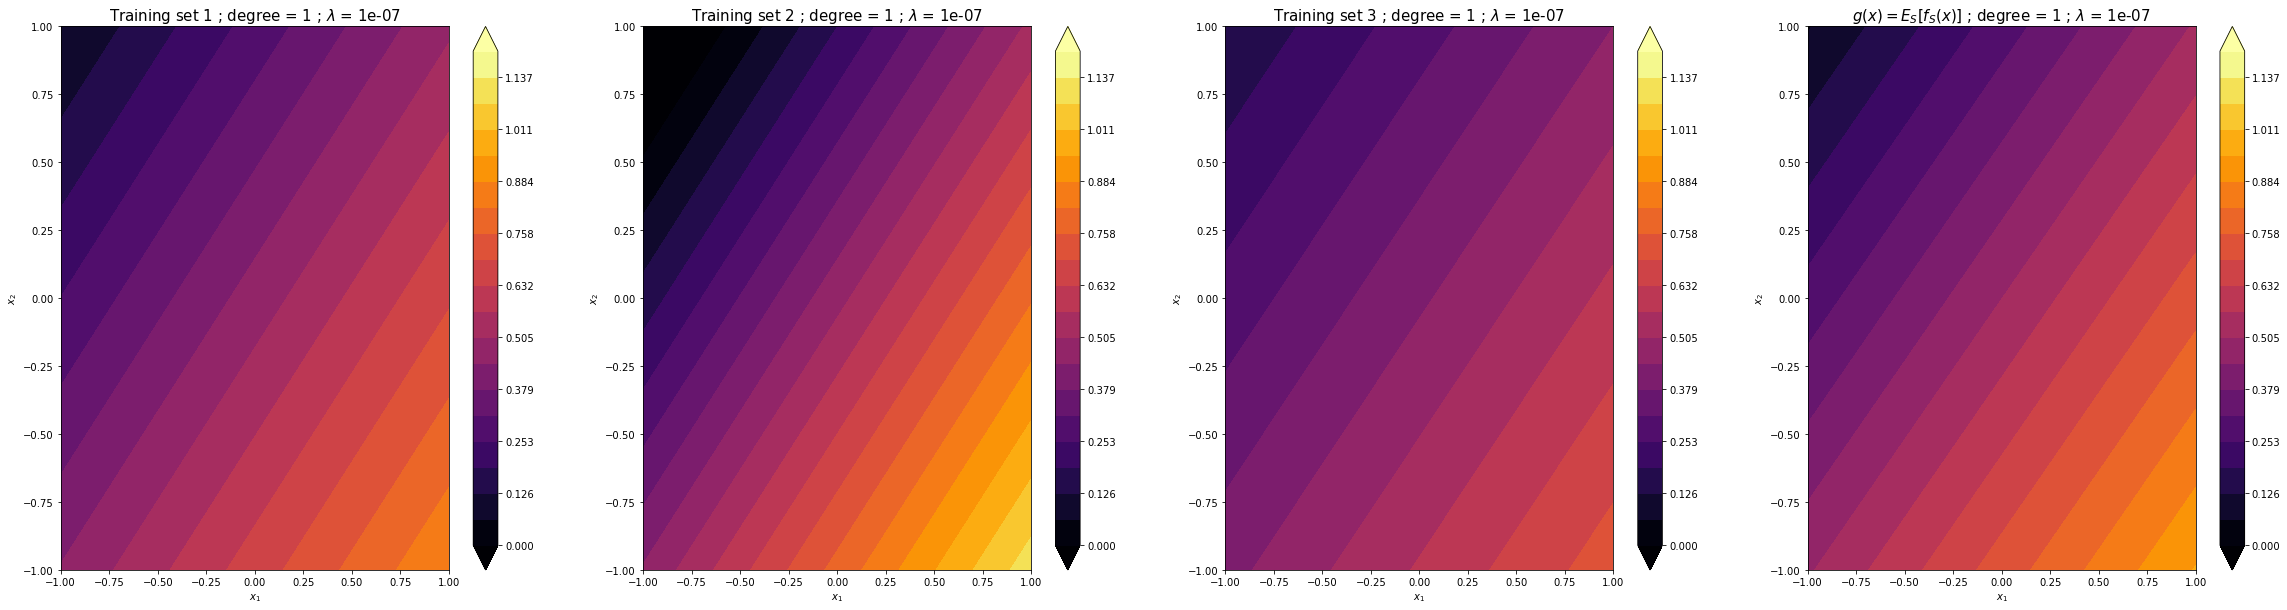

<Figure size 432x288 with 0 Axes>

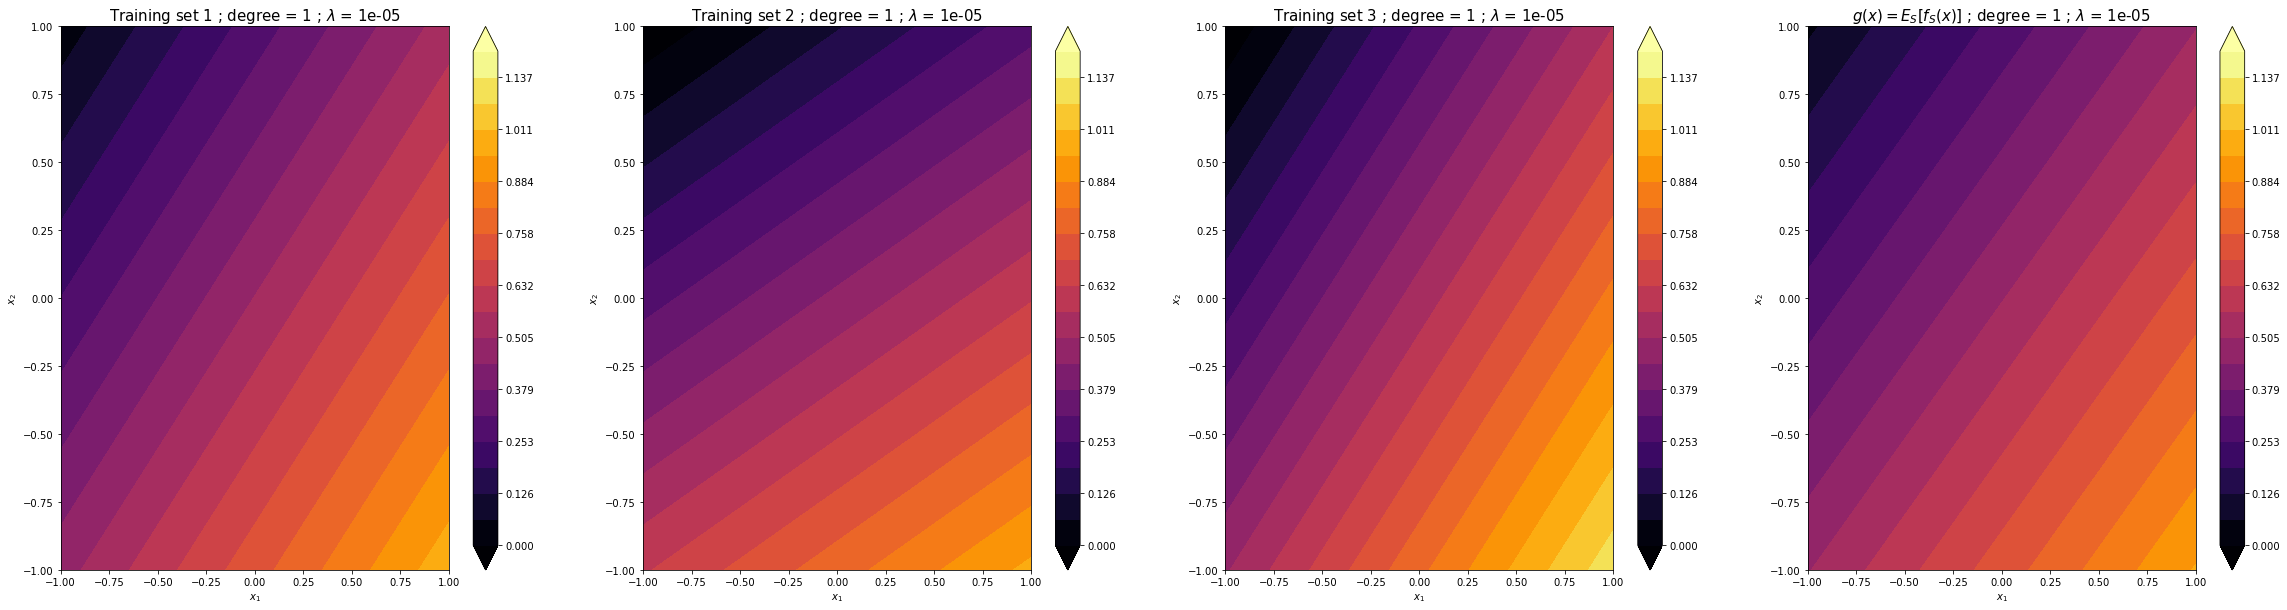

<Figure size 432x288 with 0 Axes>

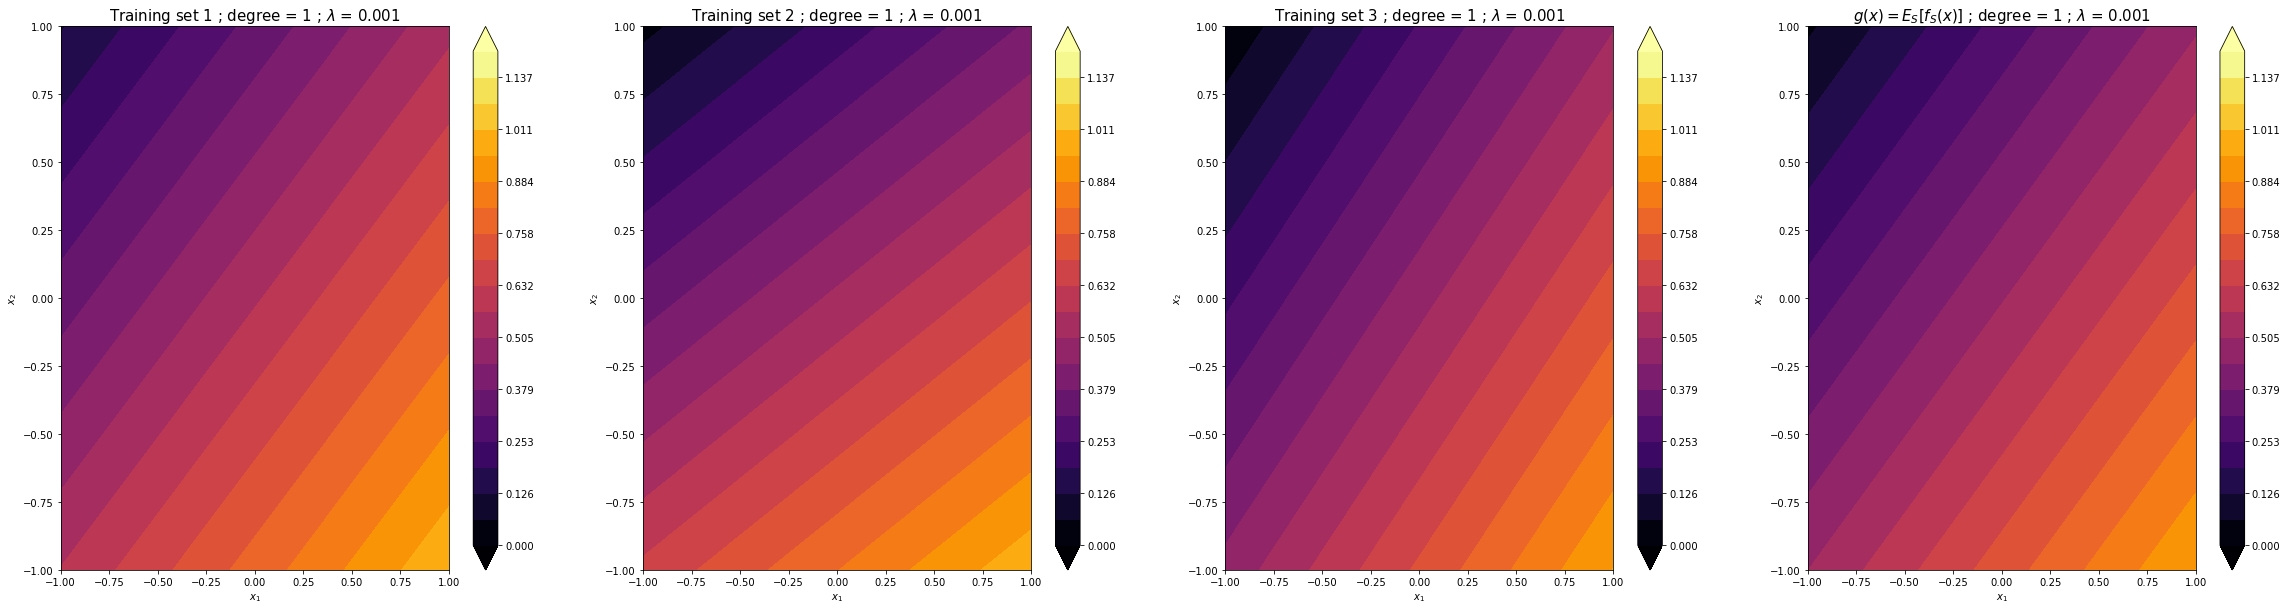

<Figure size 432x288 with 0 Axes>

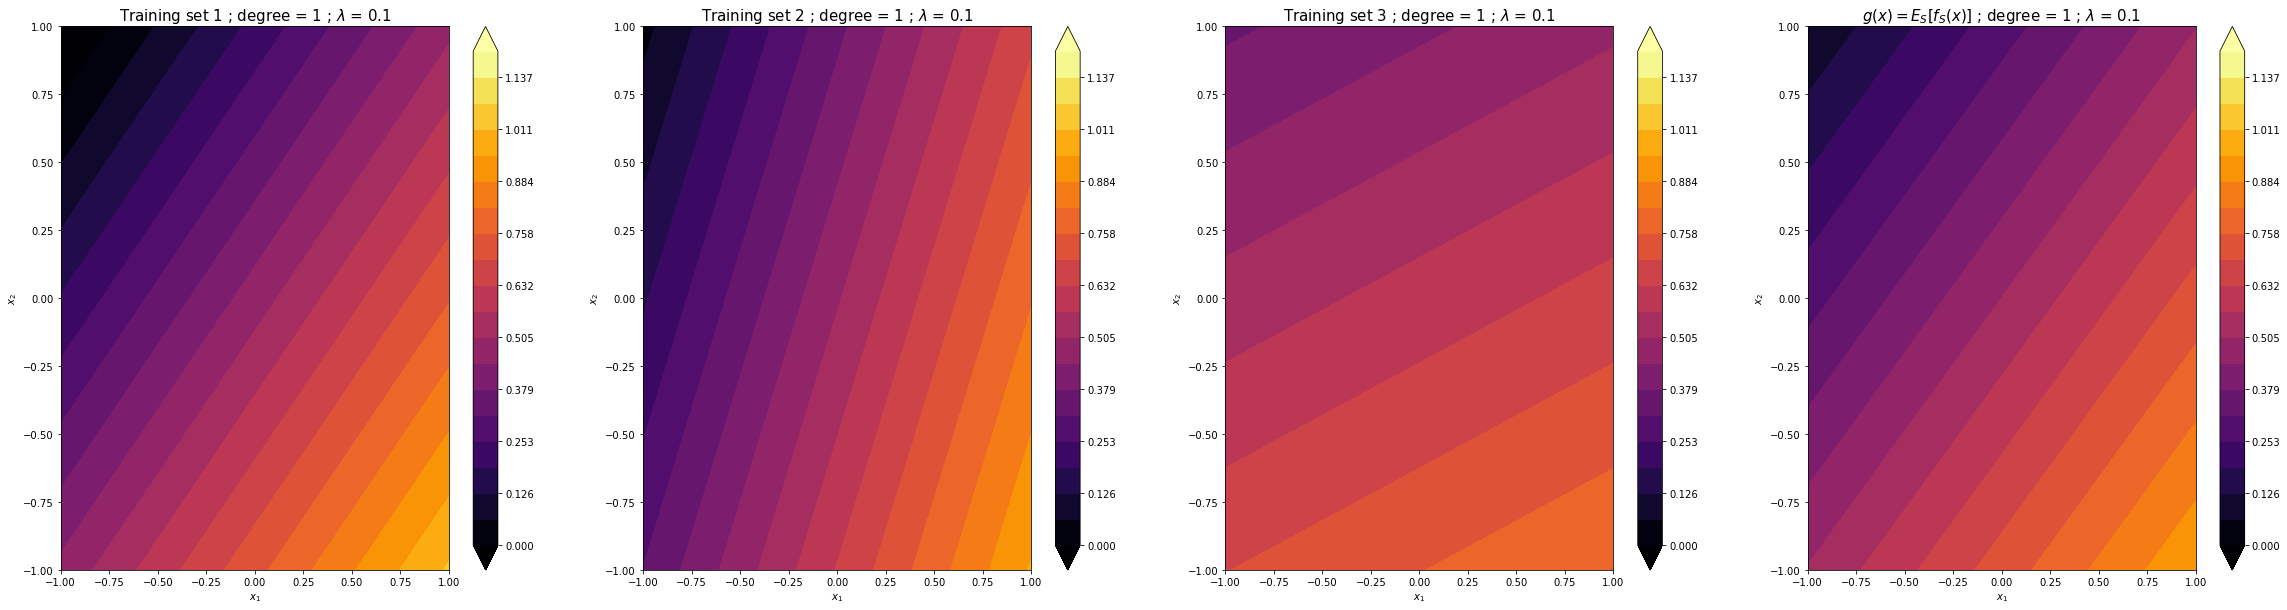

<Figure size 432x288 with 0 Axes>

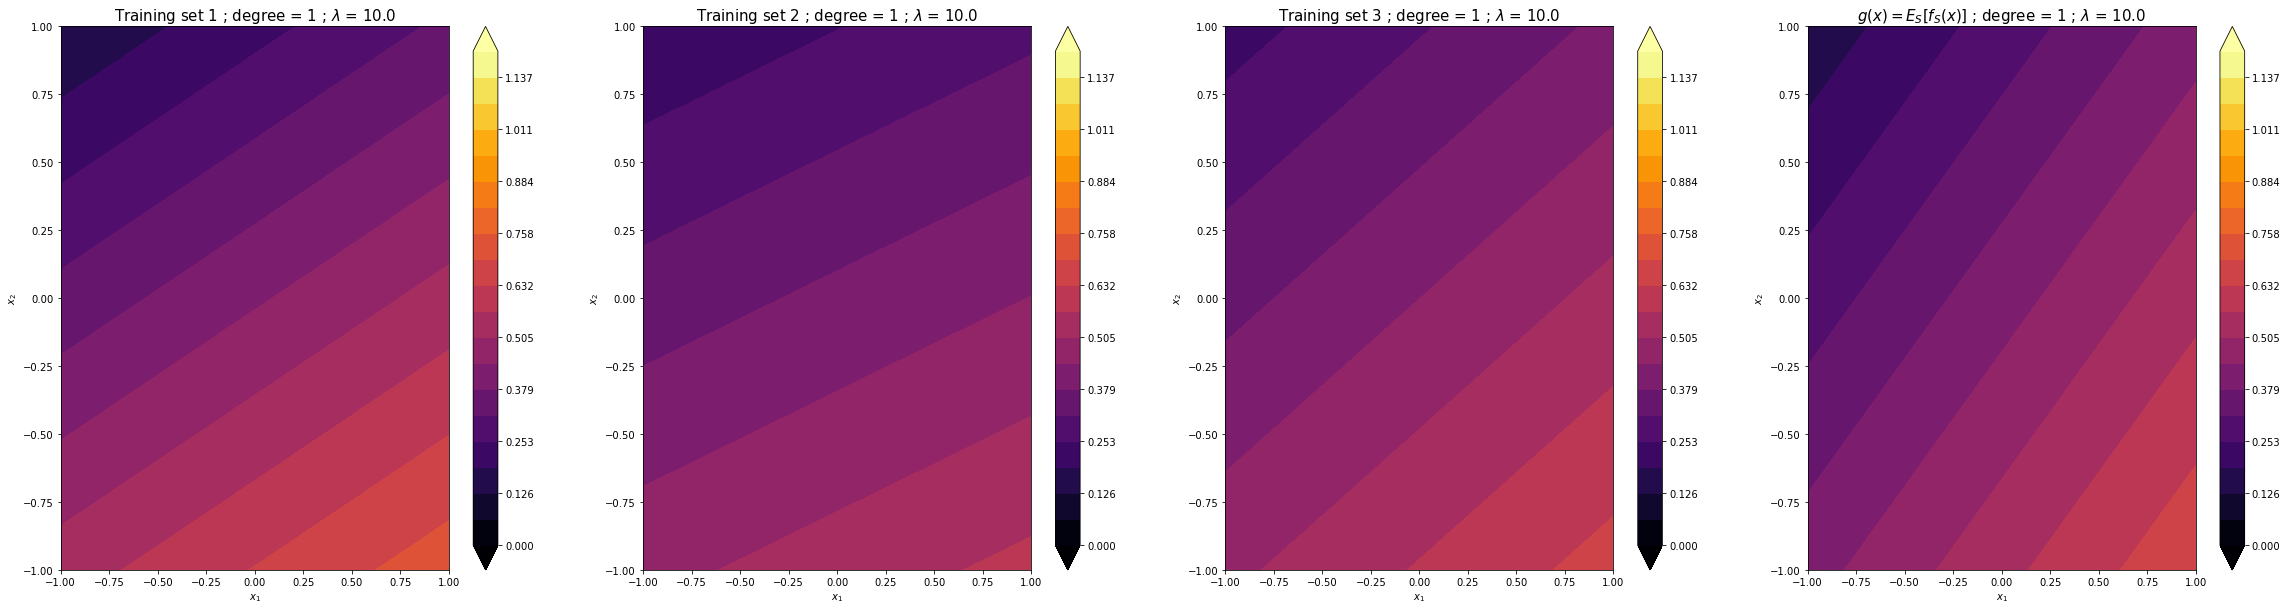

<Figure size 432x288 with 0 Axes>

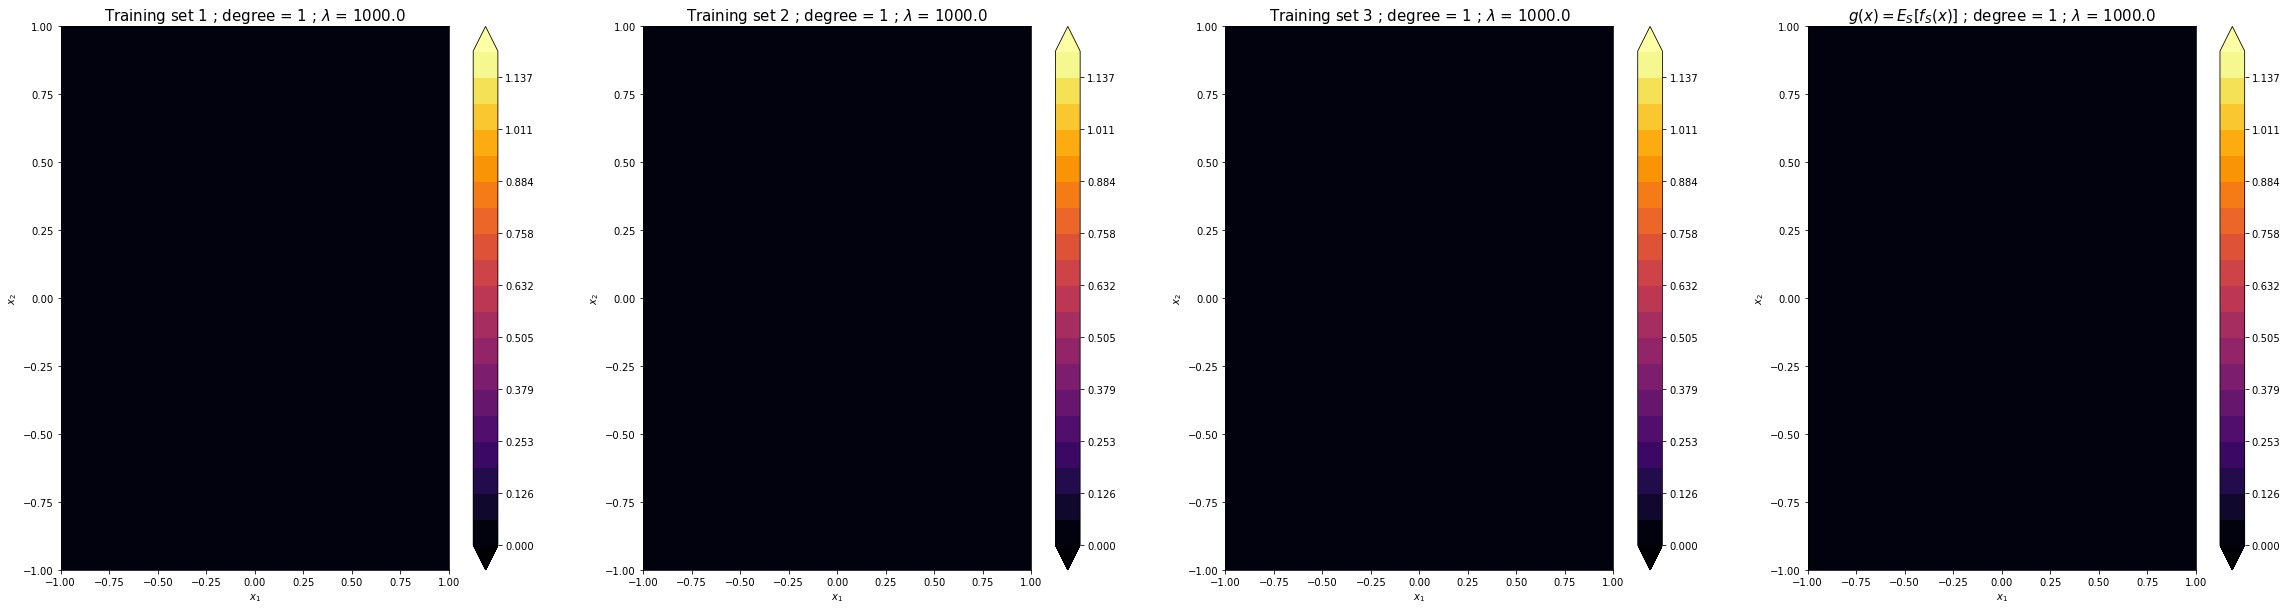

<Figure size 432x288 with 0 Axes>

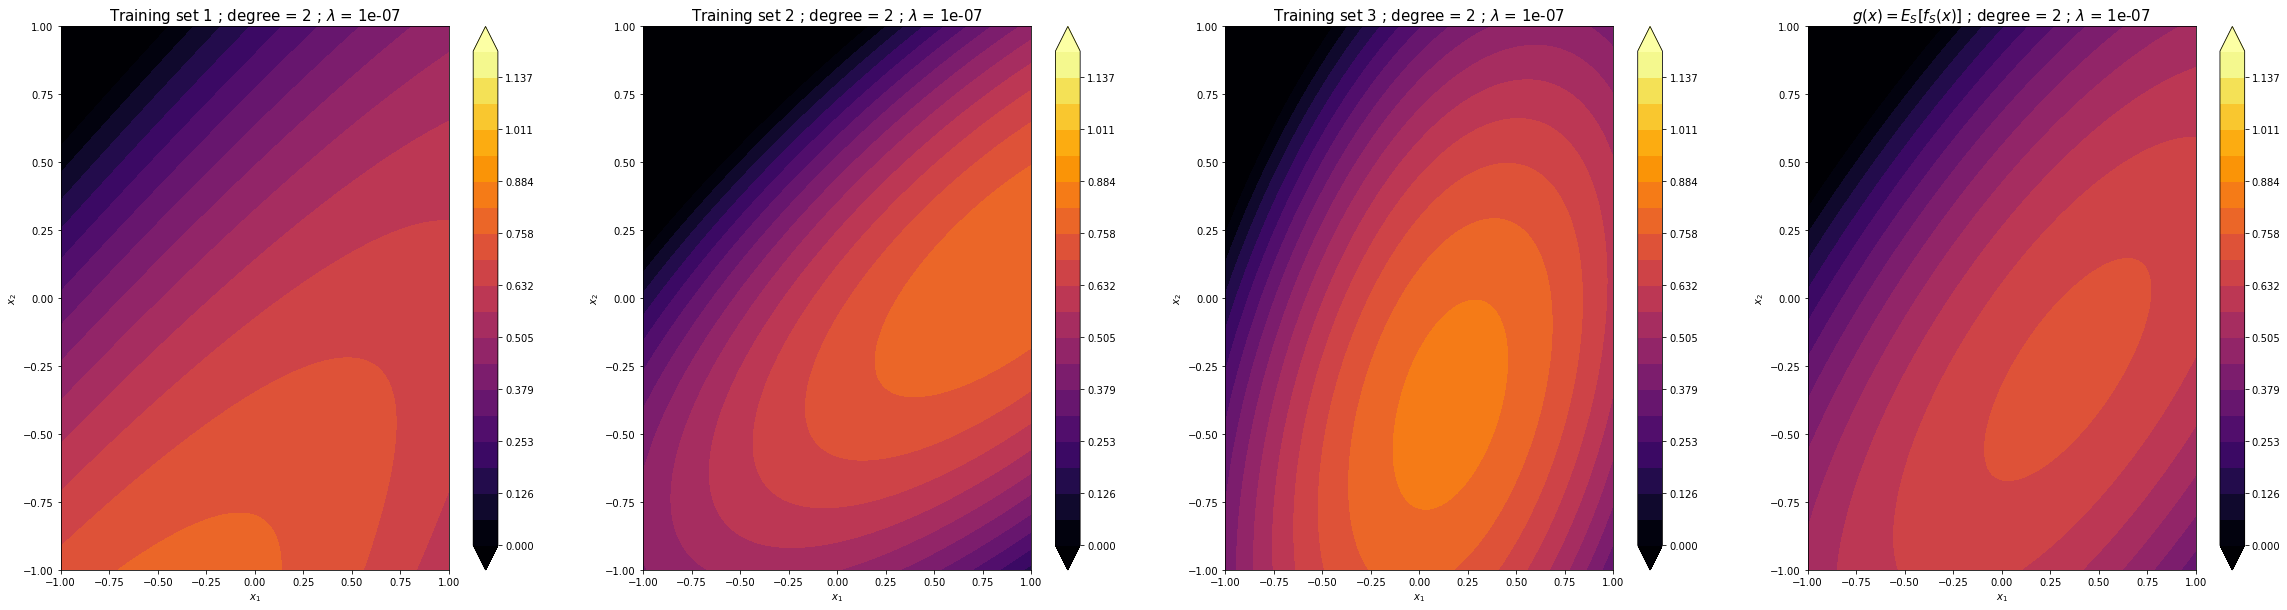

<Figure size 432x288 with 0 Axes>

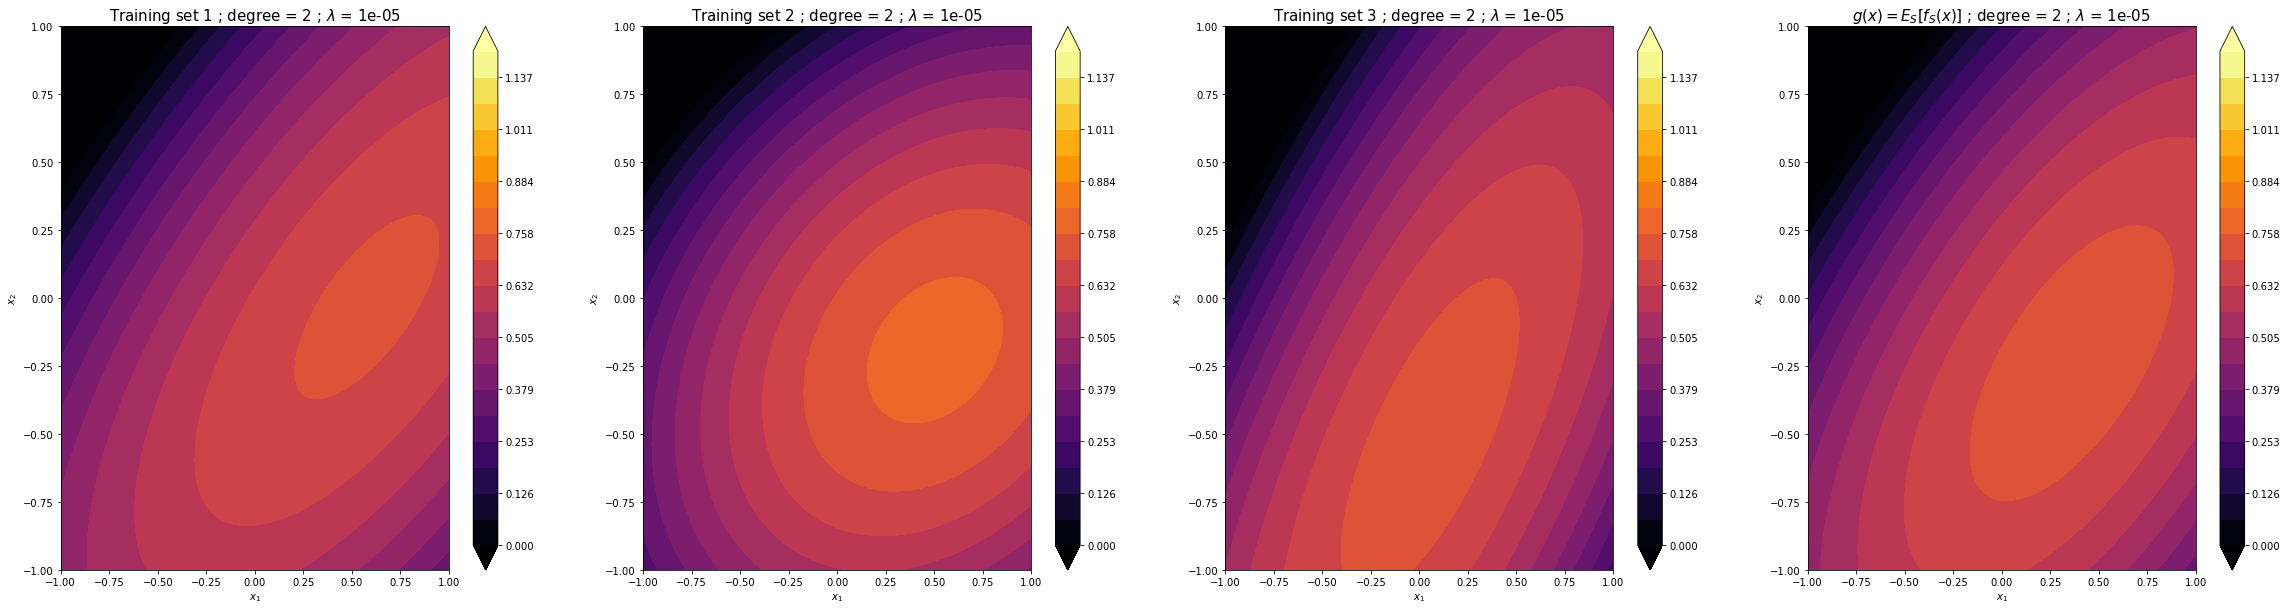

<Figure size 432x288 with 0 Axes>

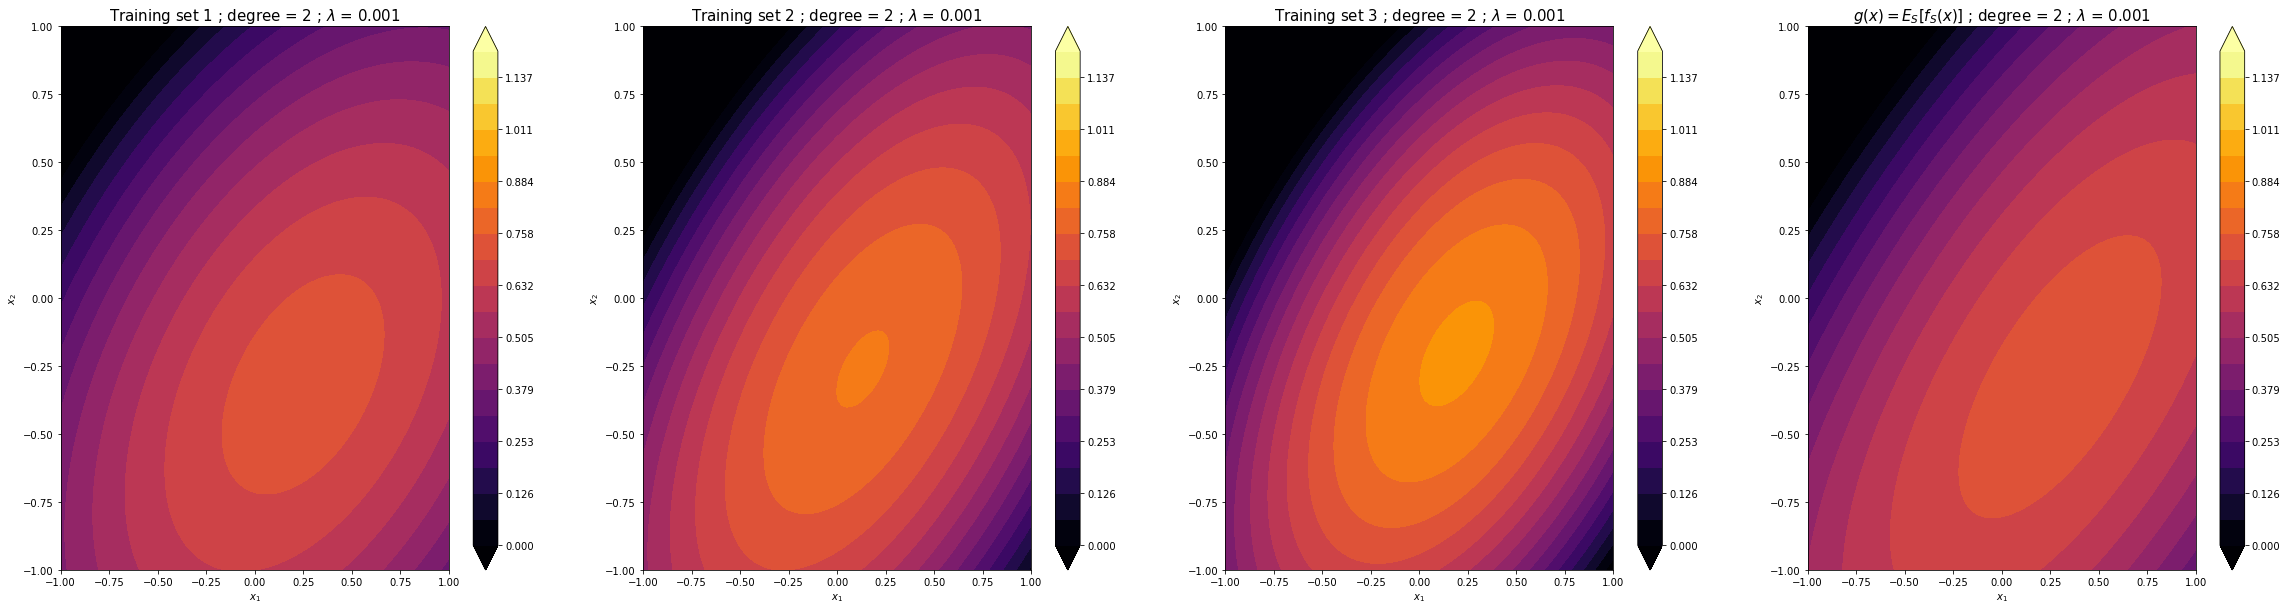

<Figure size 432x288 with 0 Axes>

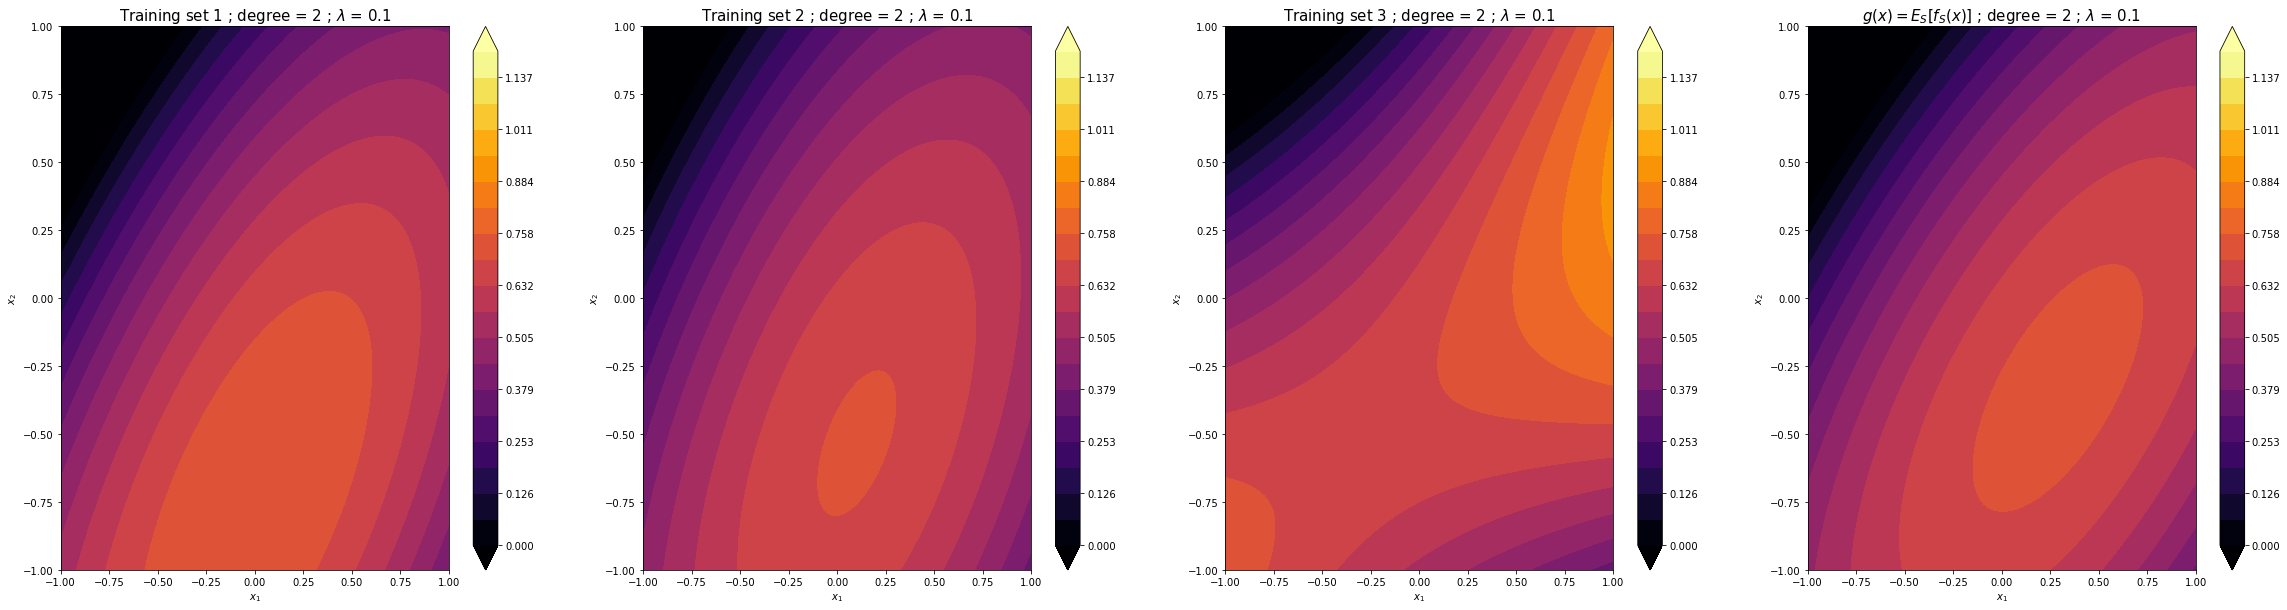

<Figure size 432x288 with 0 Axes>

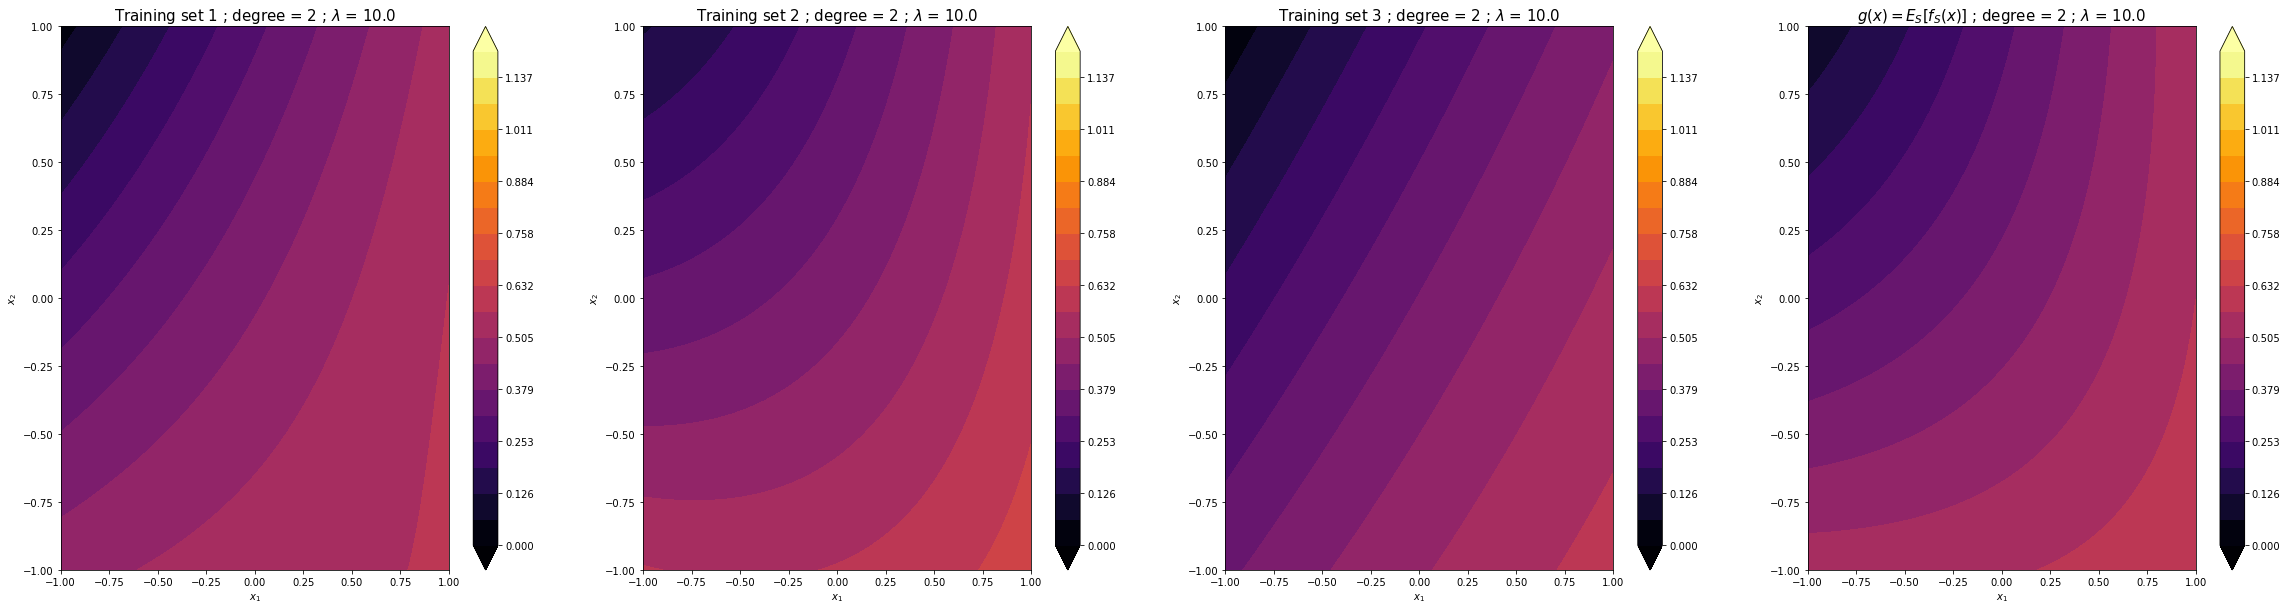

<Figure size 432x288 with 0 Axes>

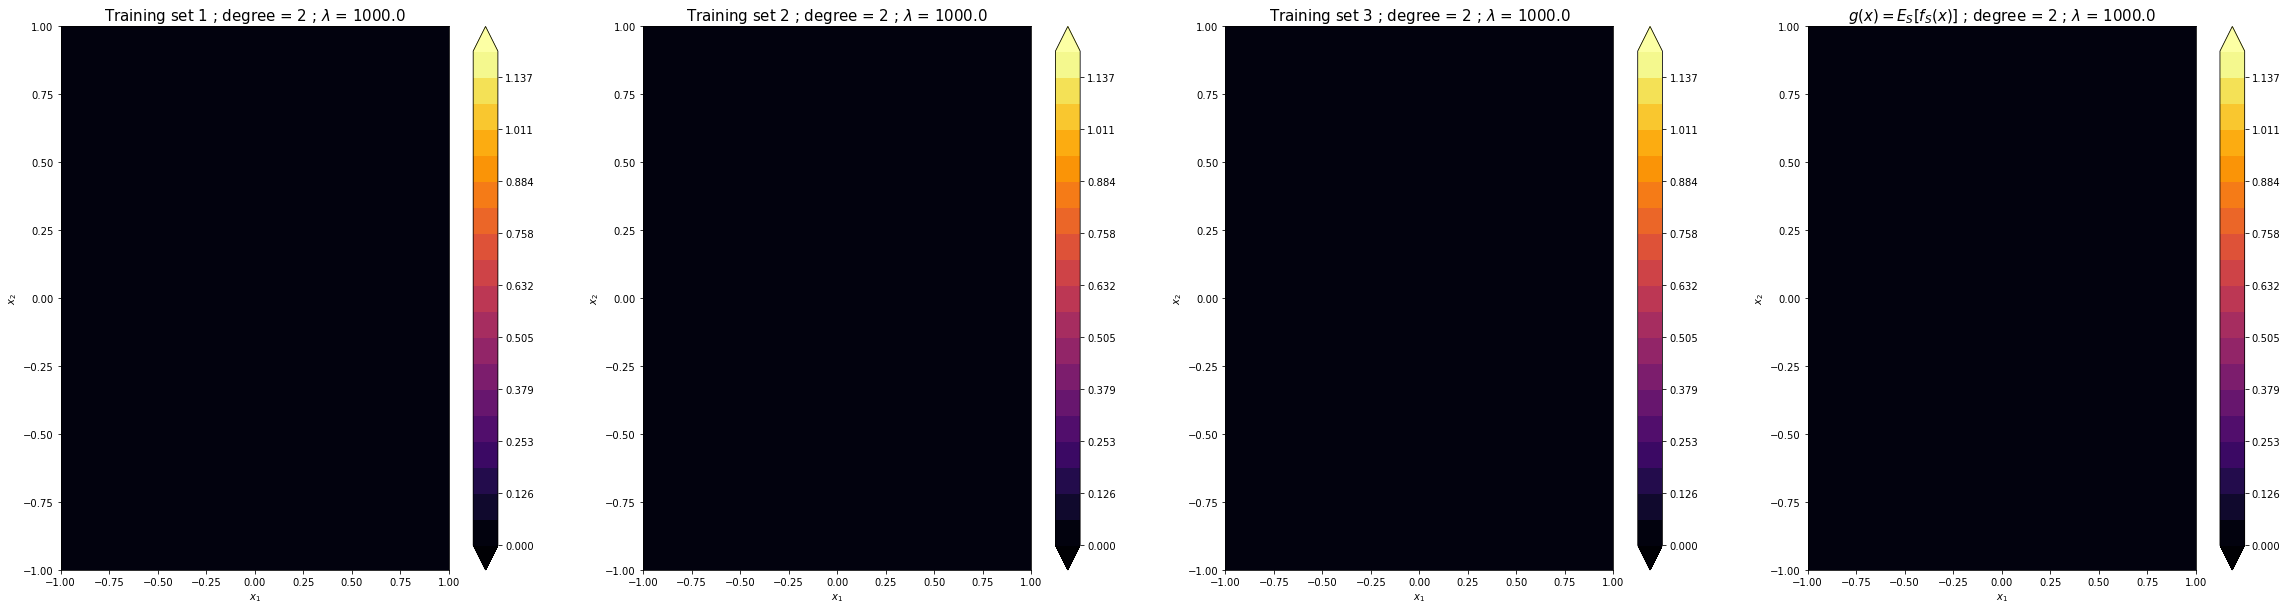

<Figure size 432x288 with 0 Axes>

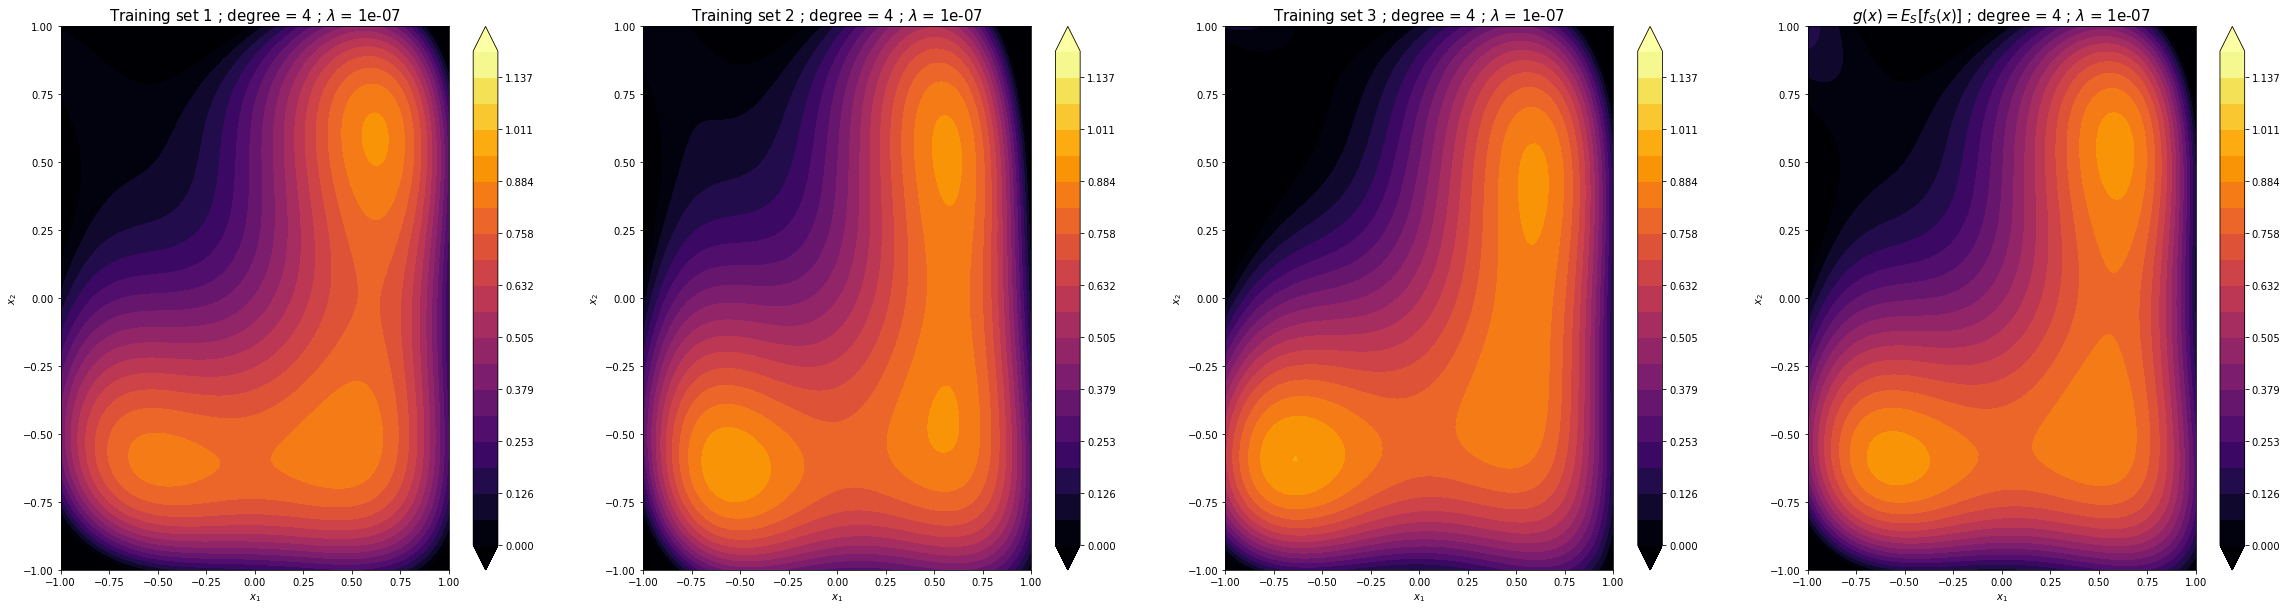

<Figure size 432x288 with 0 Axes>

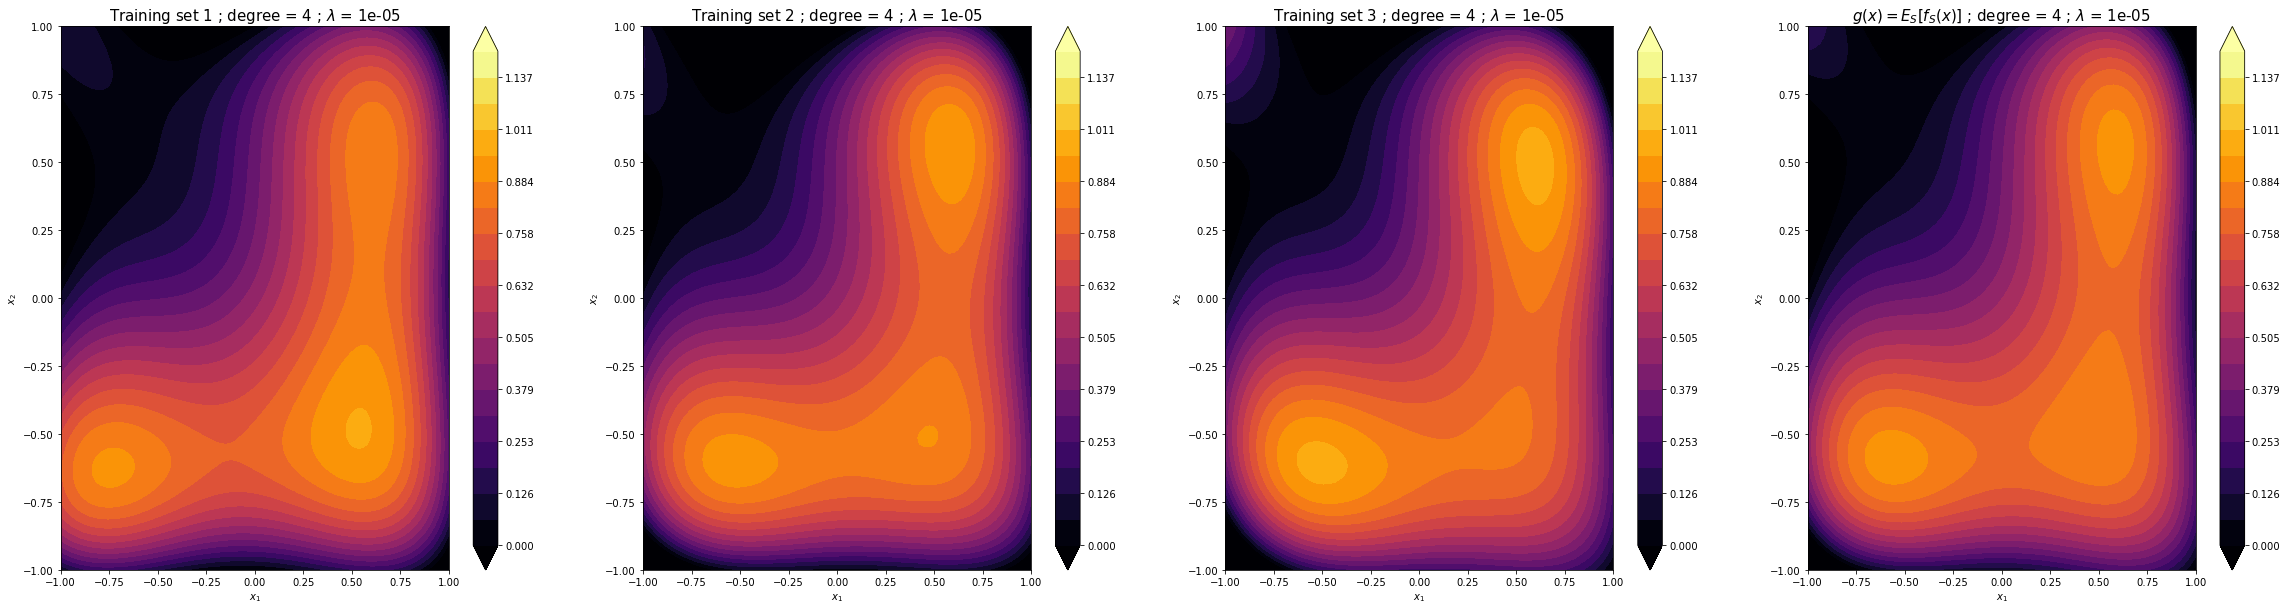

<Figure size 432x288 with 0 Axes>

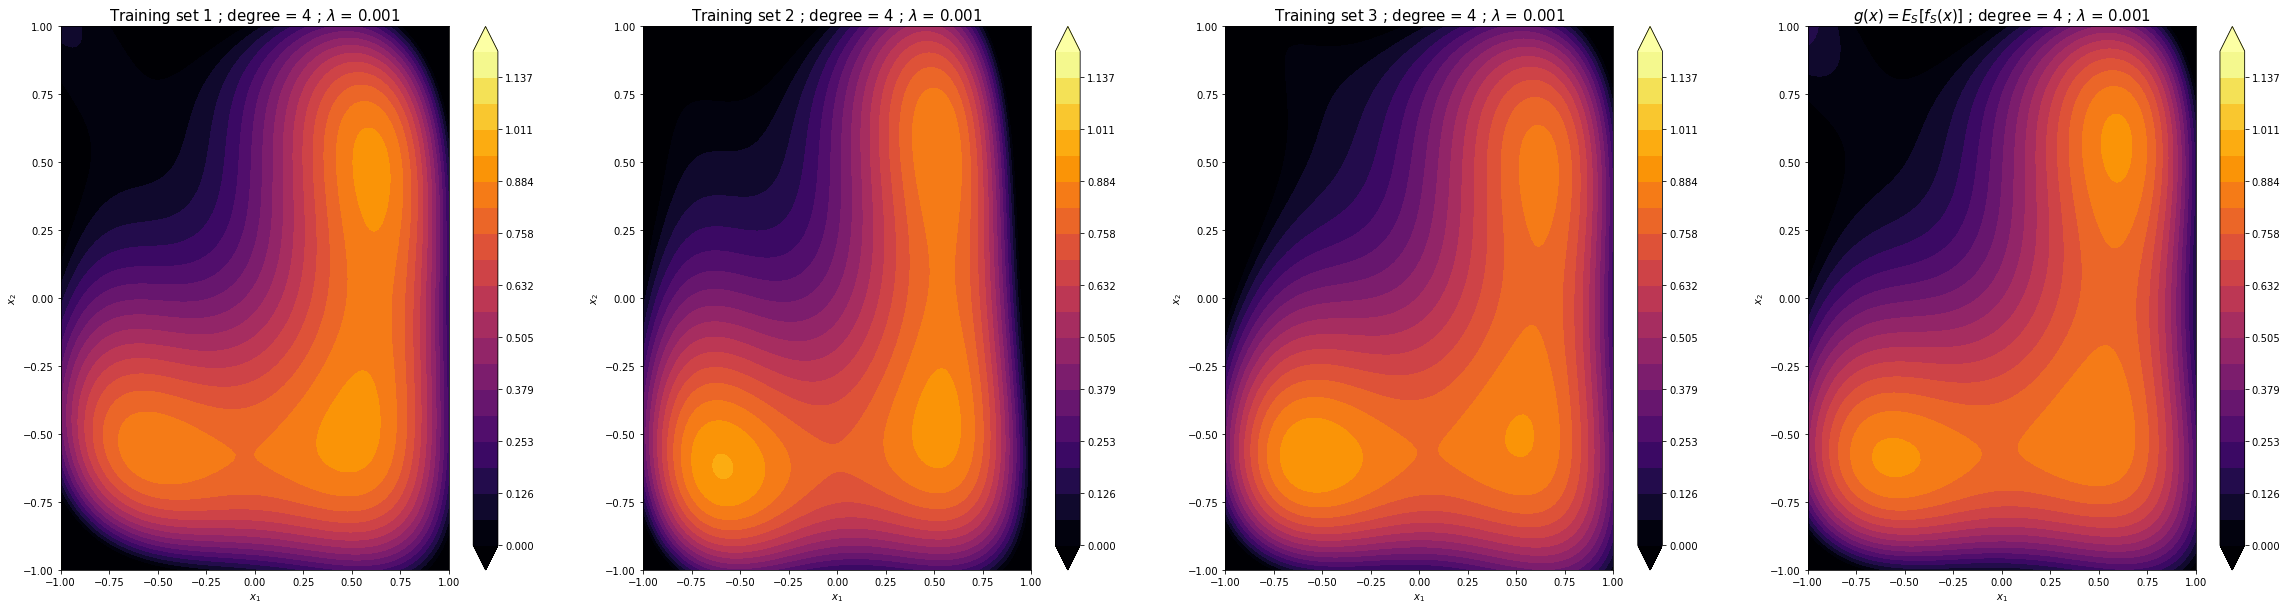

<Figure size 432x288 with 0 Axes>

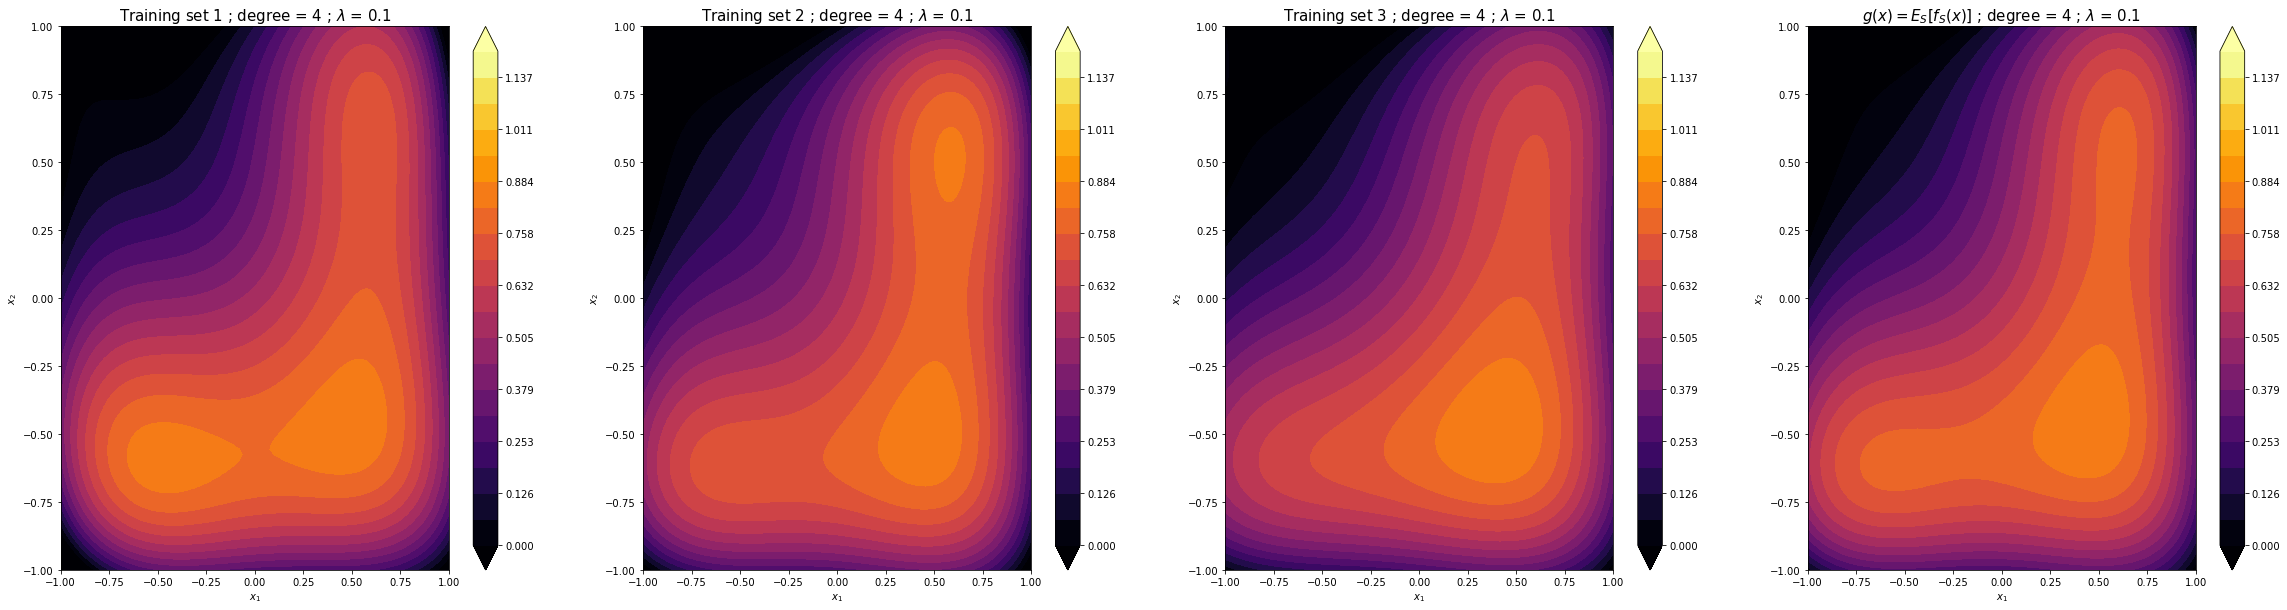

<Figure size 432x288 with 0 Axes>

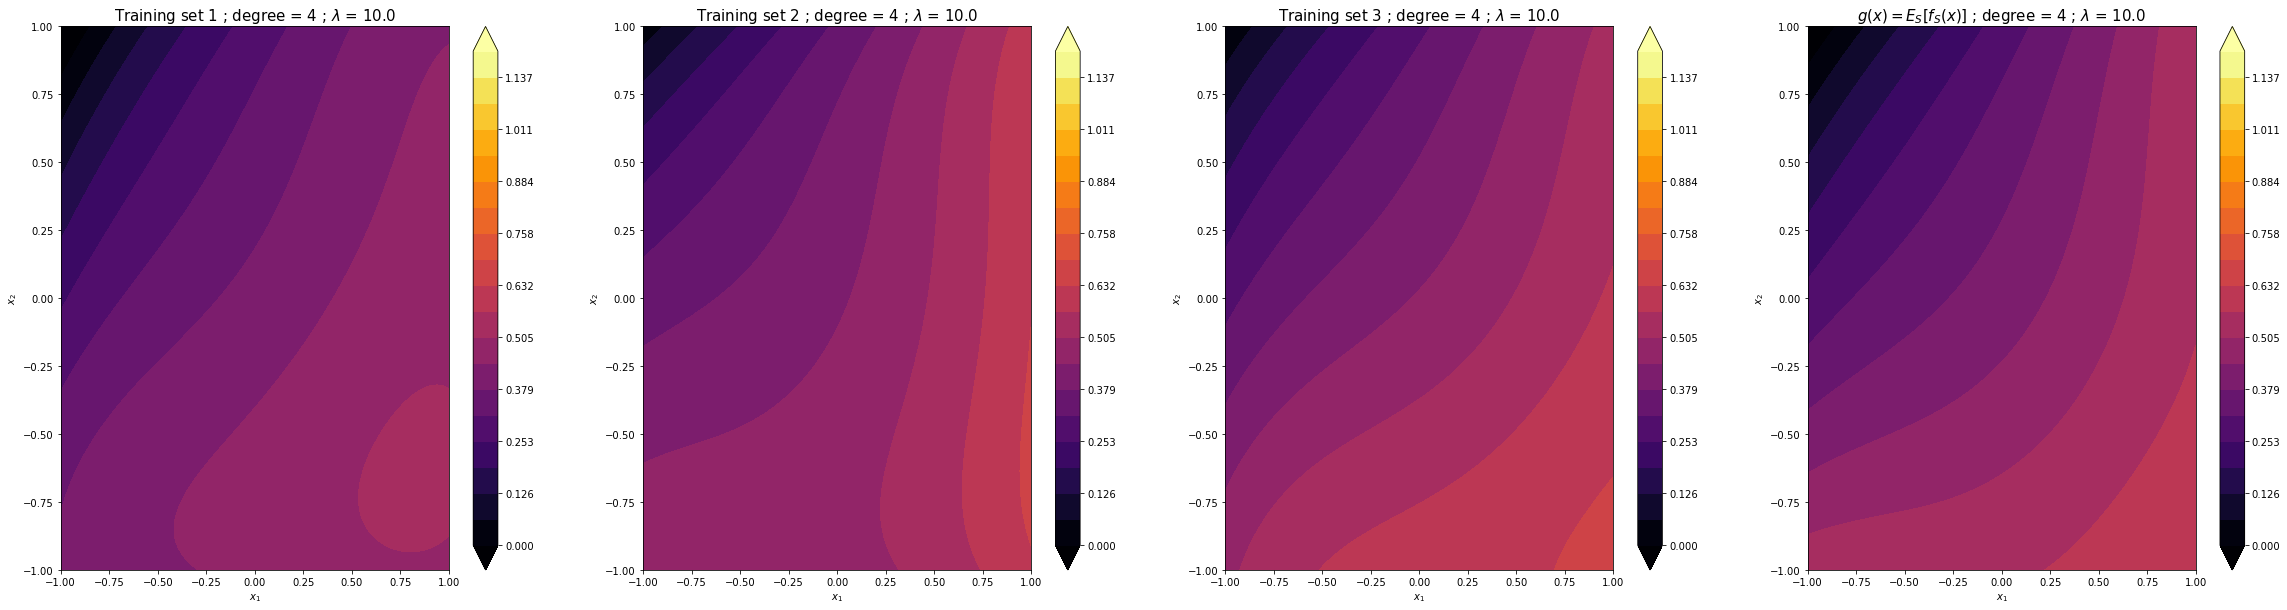

<Figure size 432x288 with 0 Axes>

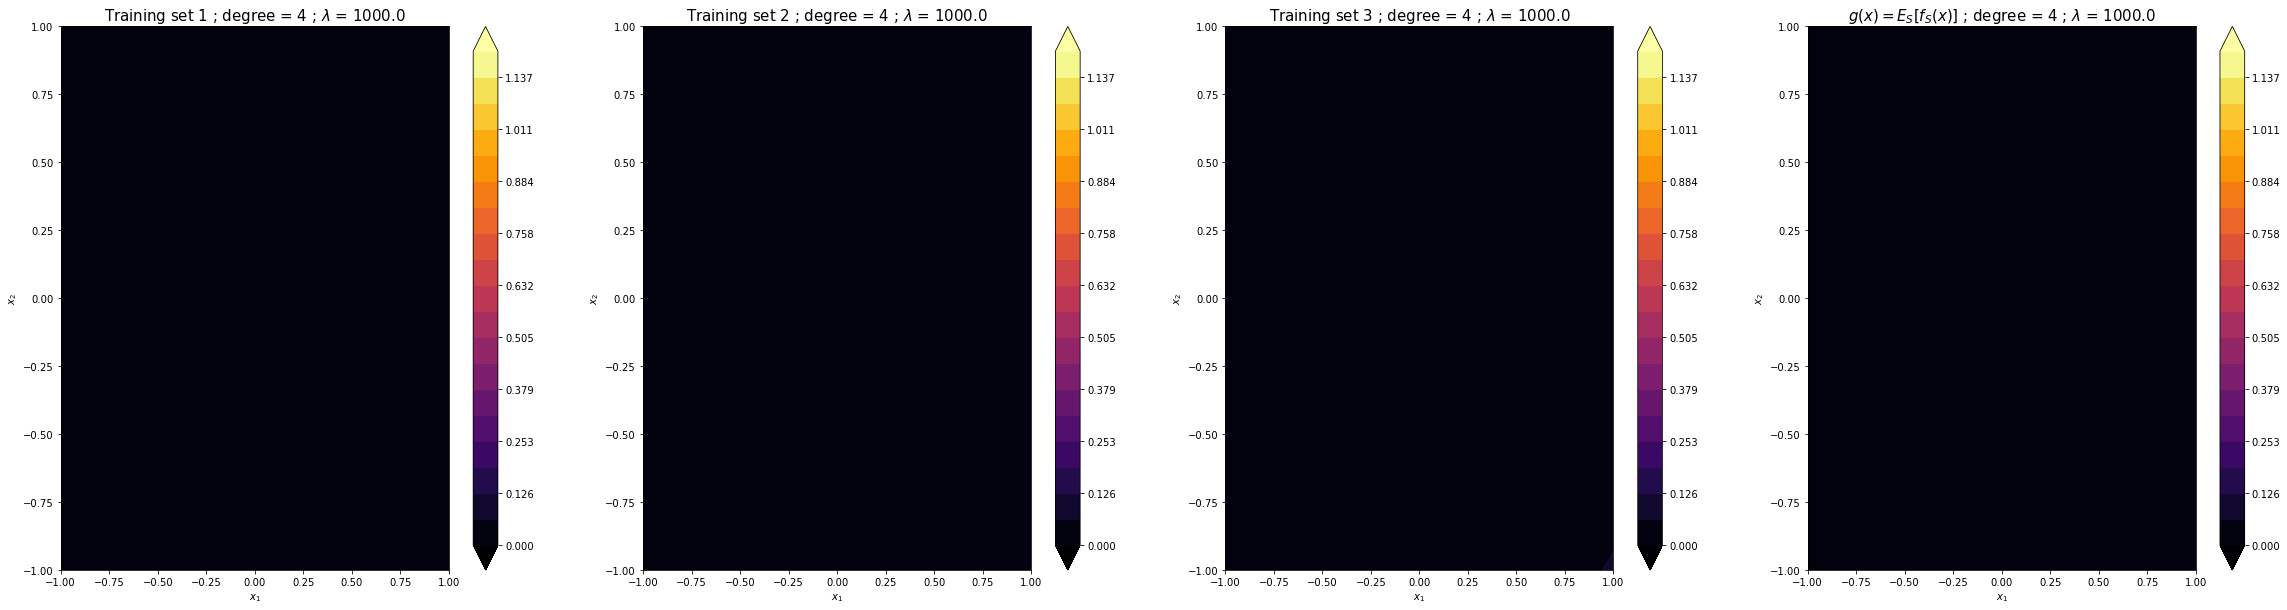

<Figure size 432x288 with 0 Axes>

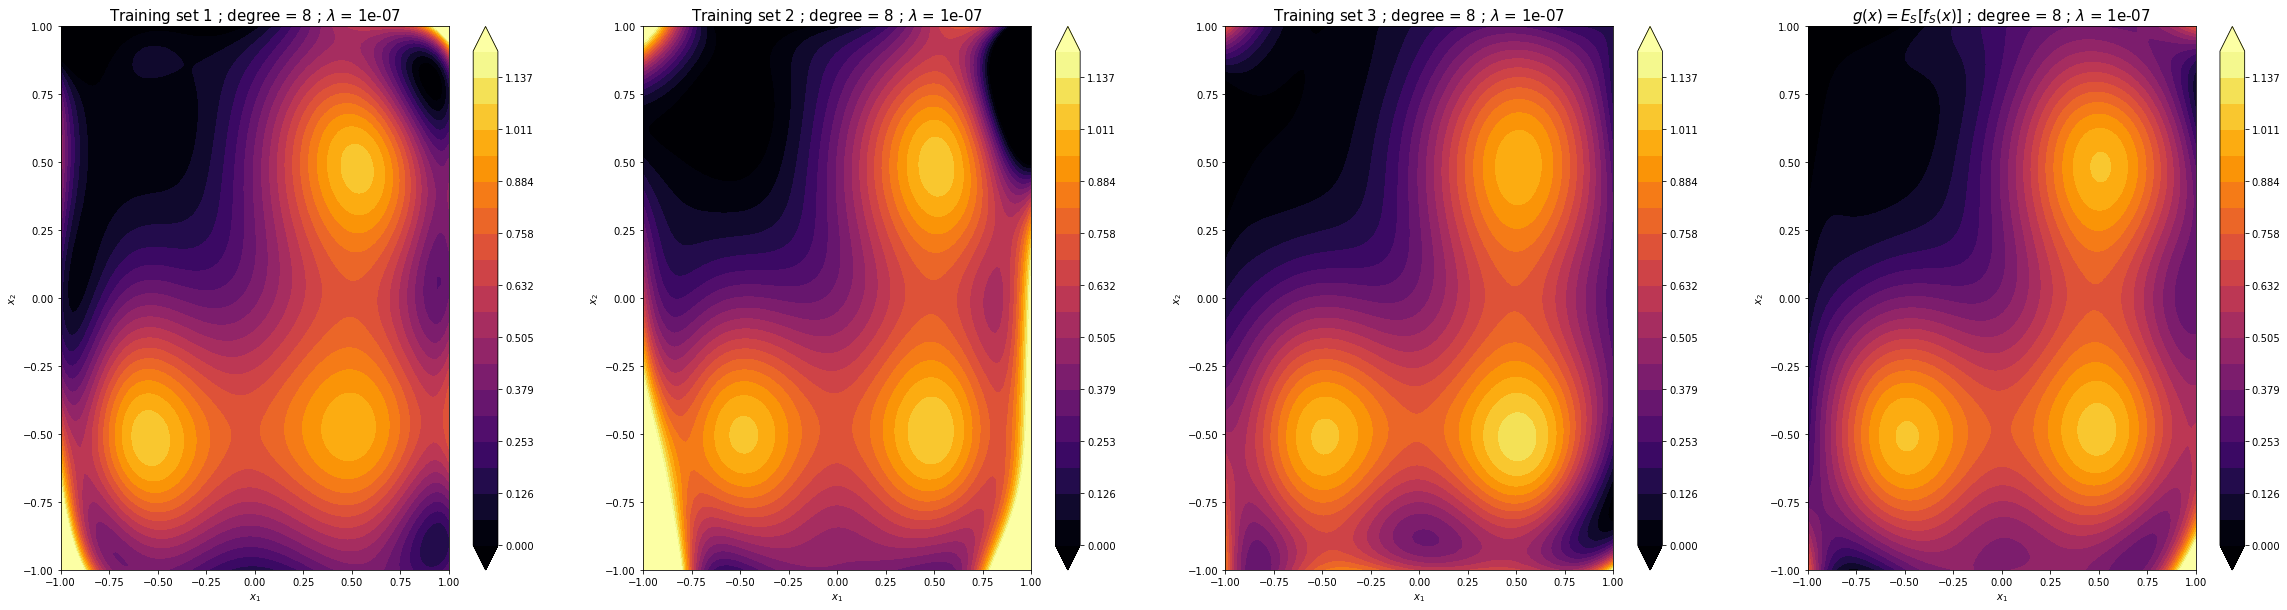

<Figure size 432x288 with 0 Axes>

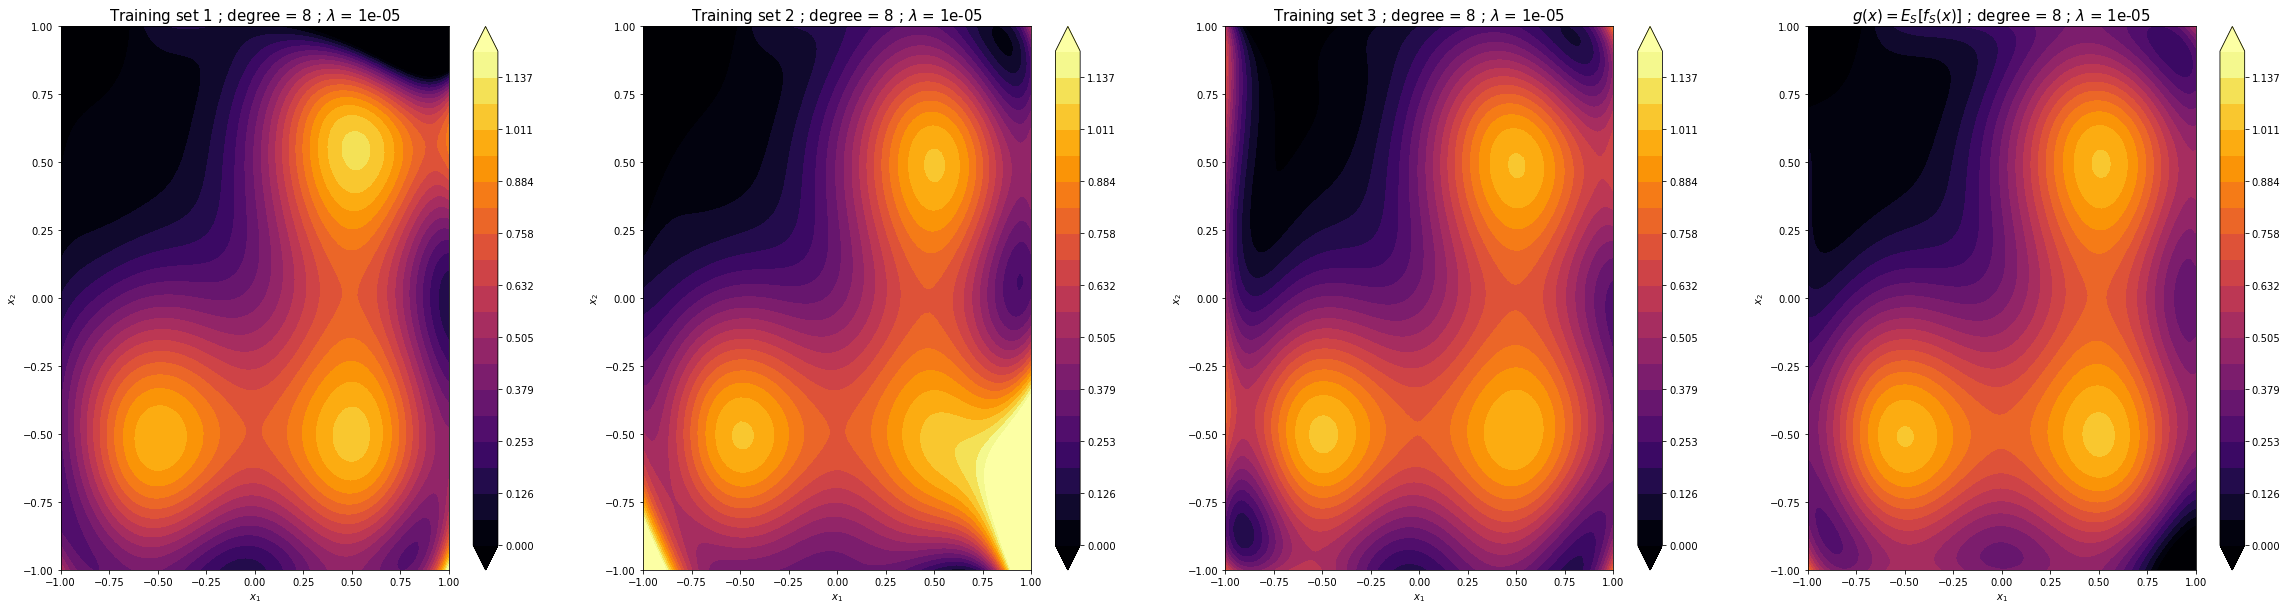

<Figure size 432x288 with 0 Axes>

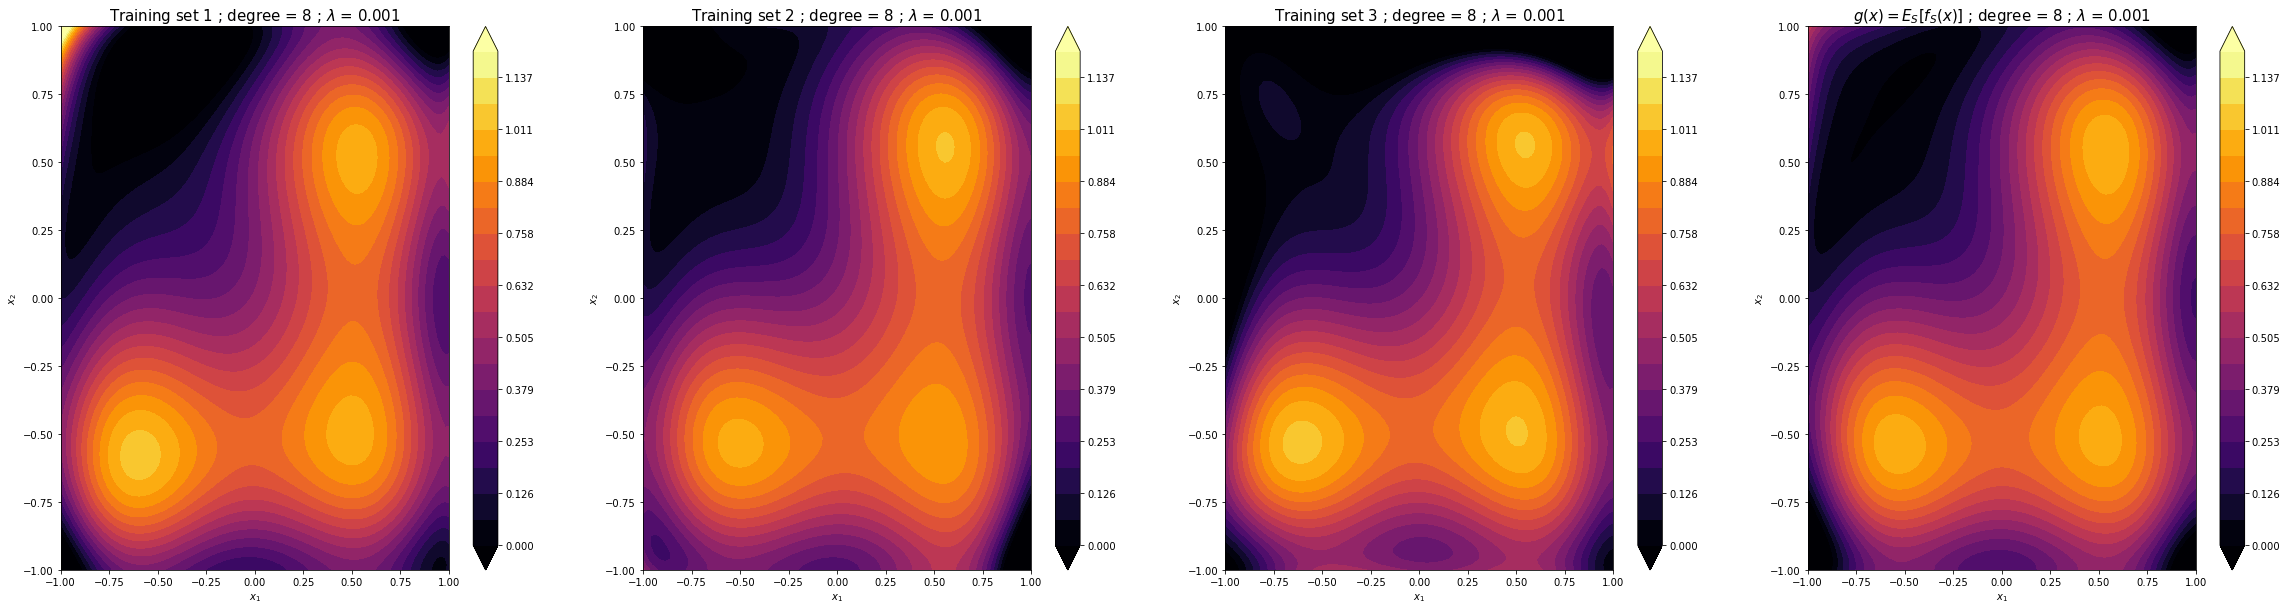

<Figure size 432x288 with 0 Axes>

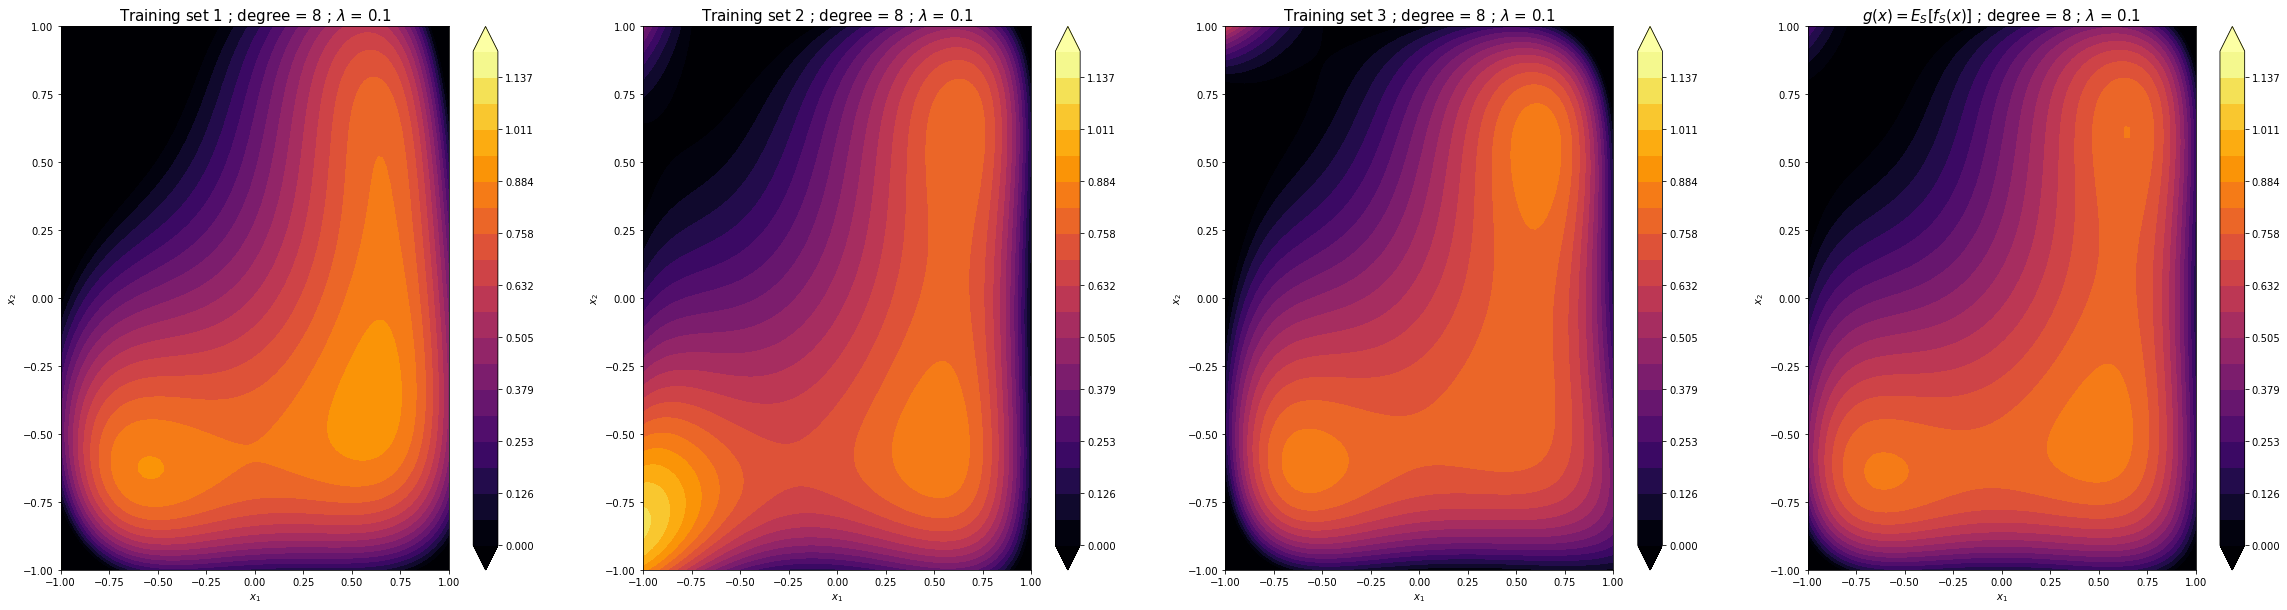

<Figure size 432x288 with 0 Axes>

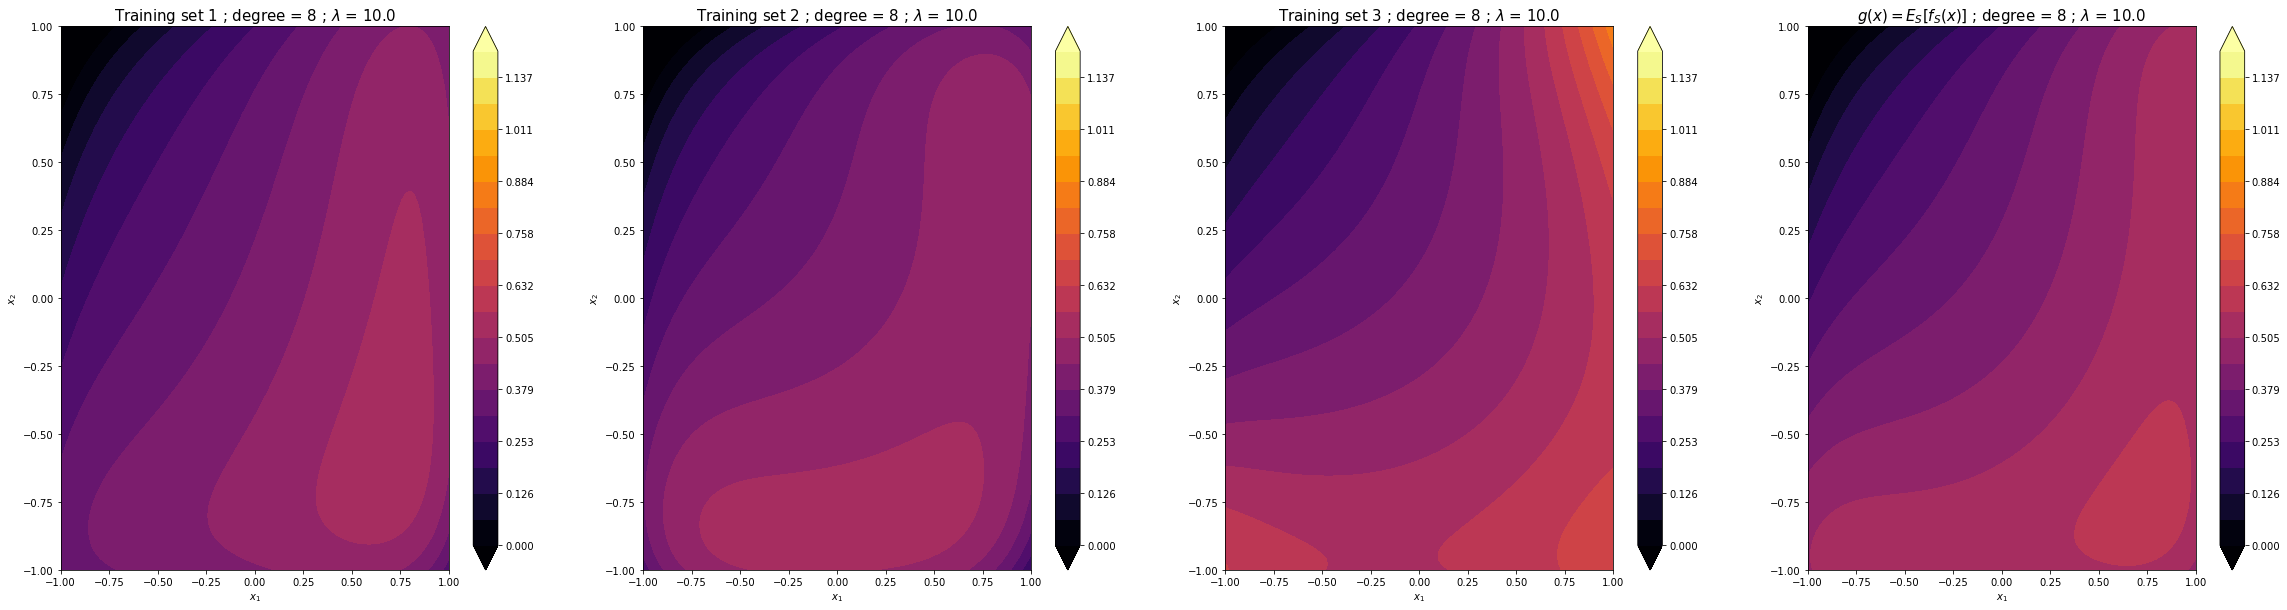

<Figure size 432x288 with 0 Axes>

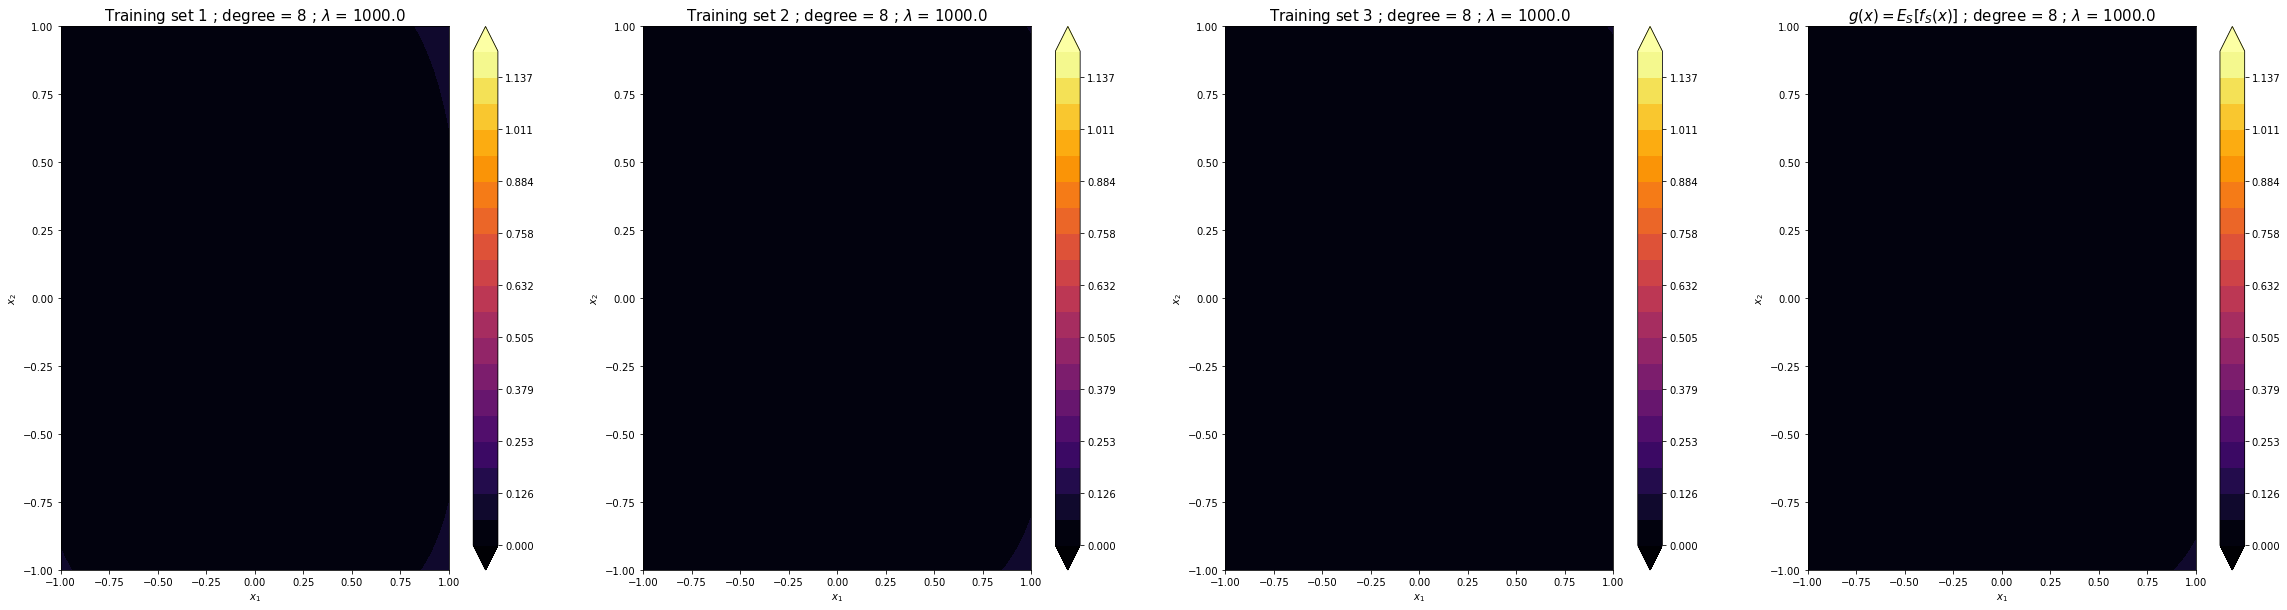

<Figure size 432x288 with 0 Axes>

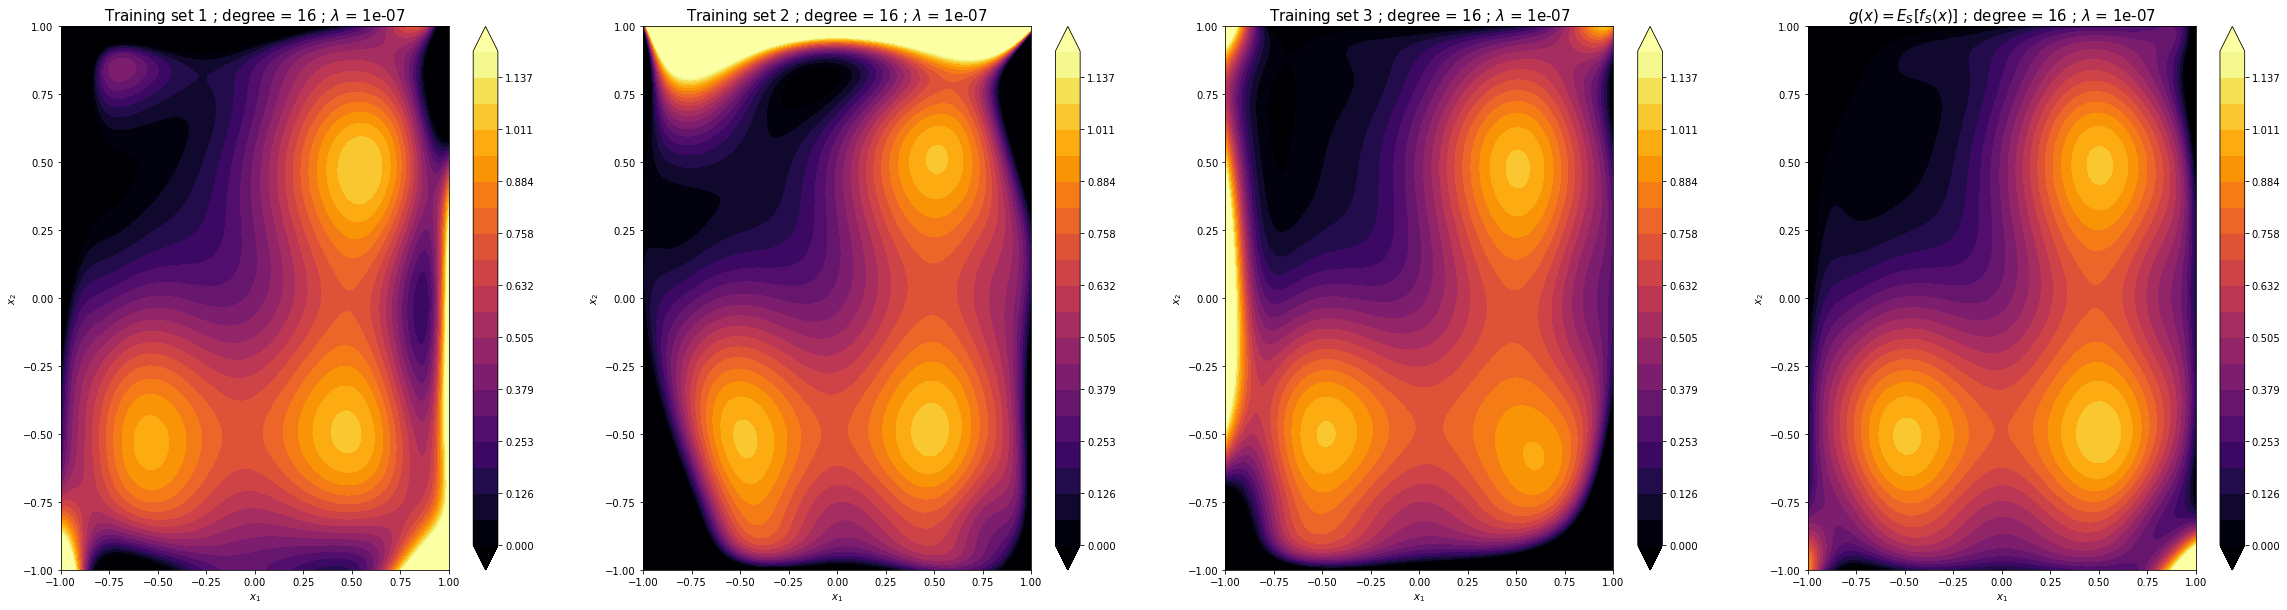

<Figure size 432x288 with 0 Axes>

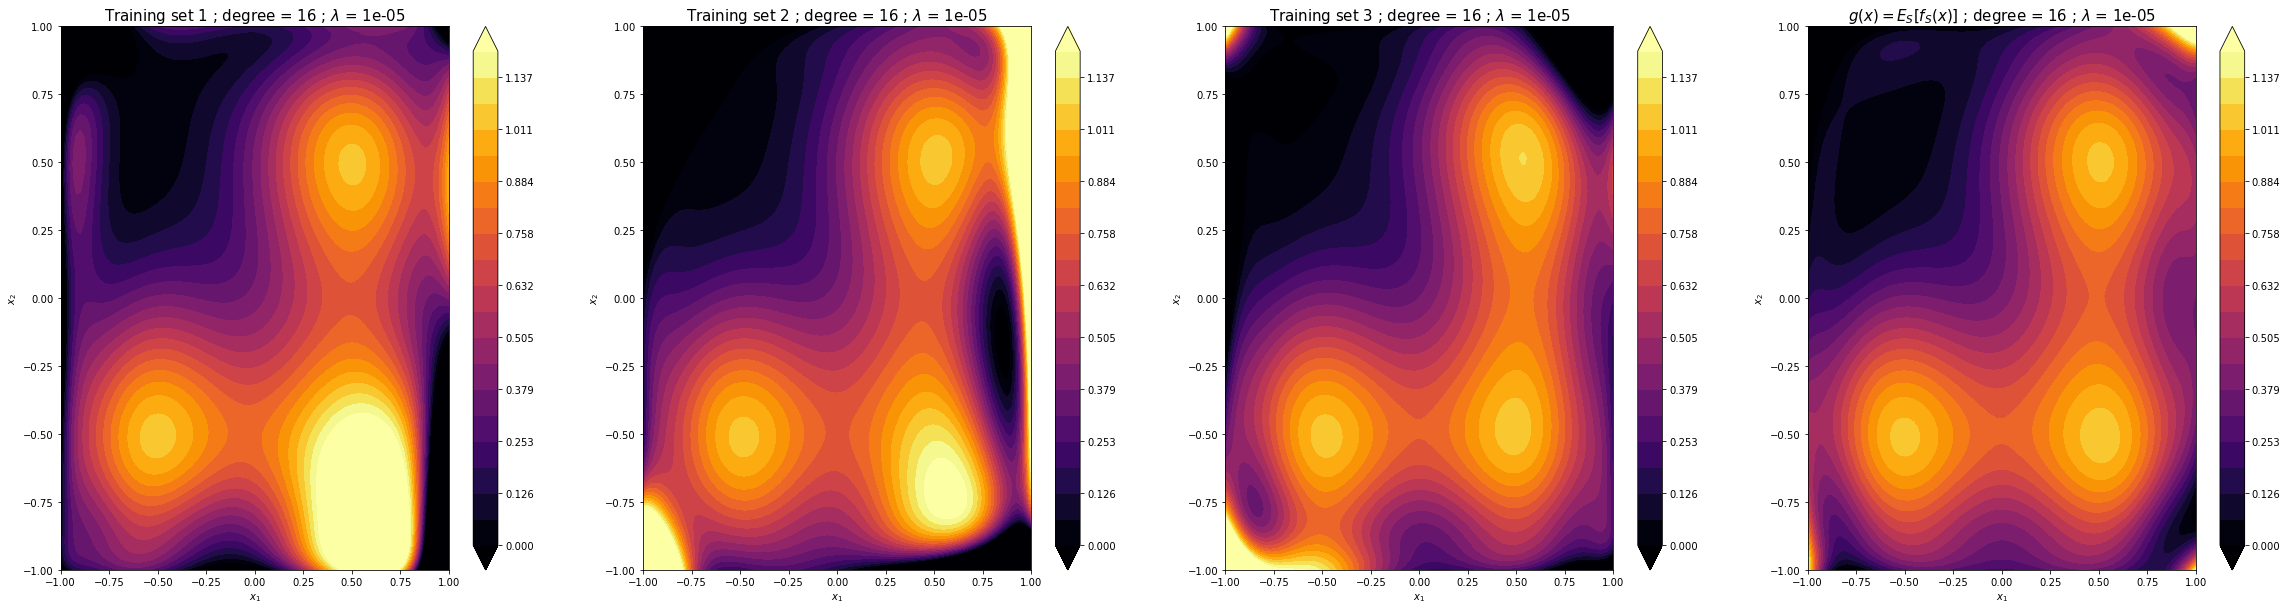

<Figure size 432x288 with 0 Axes>

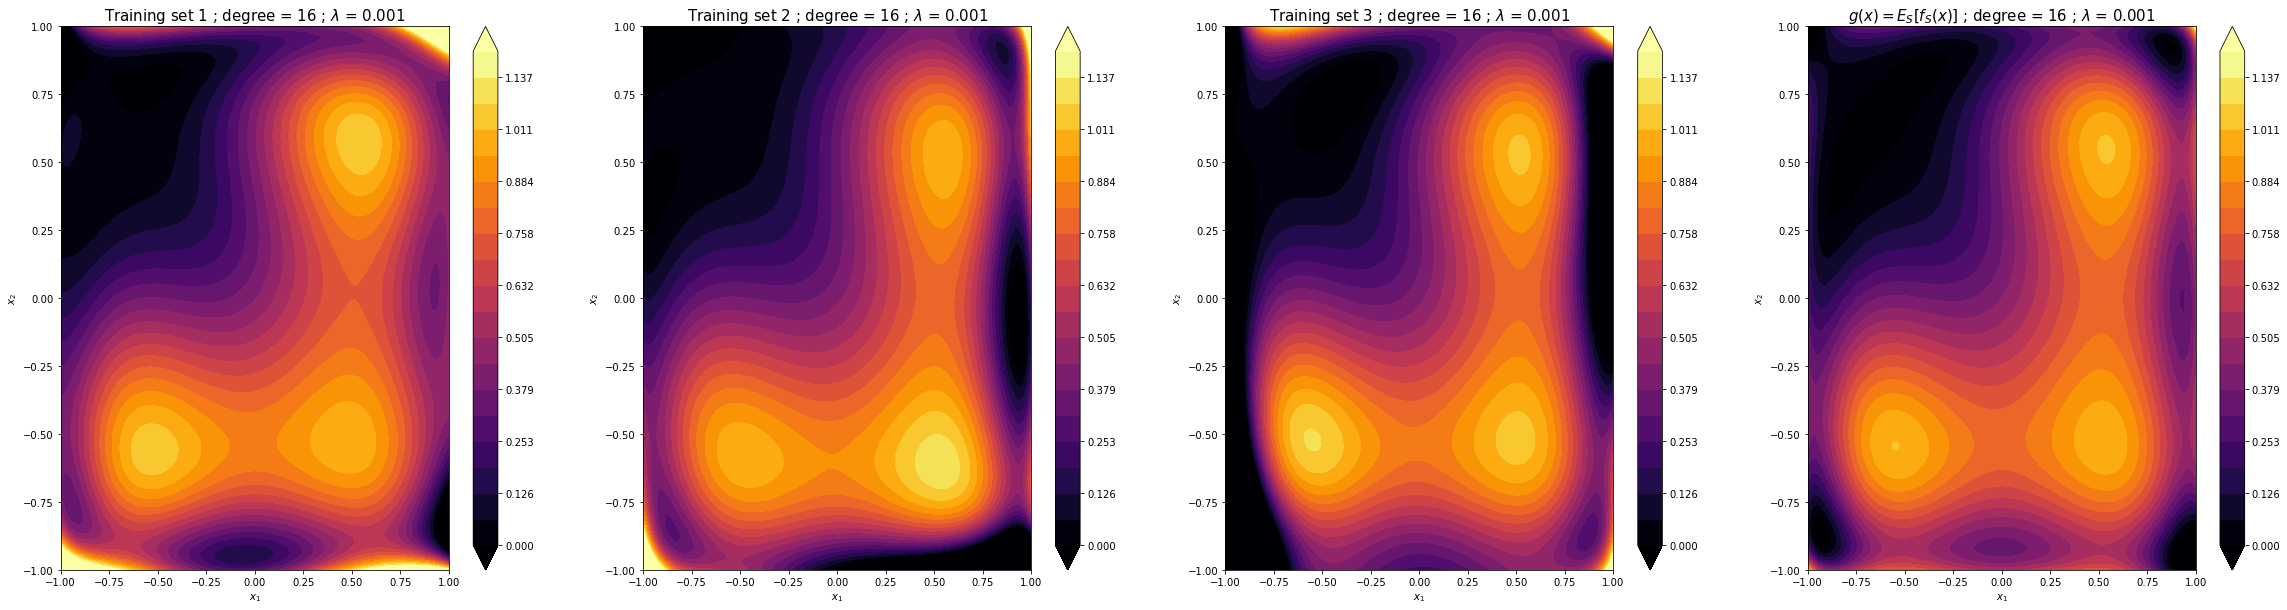

<Figure size 432x288 with 0 Axes>

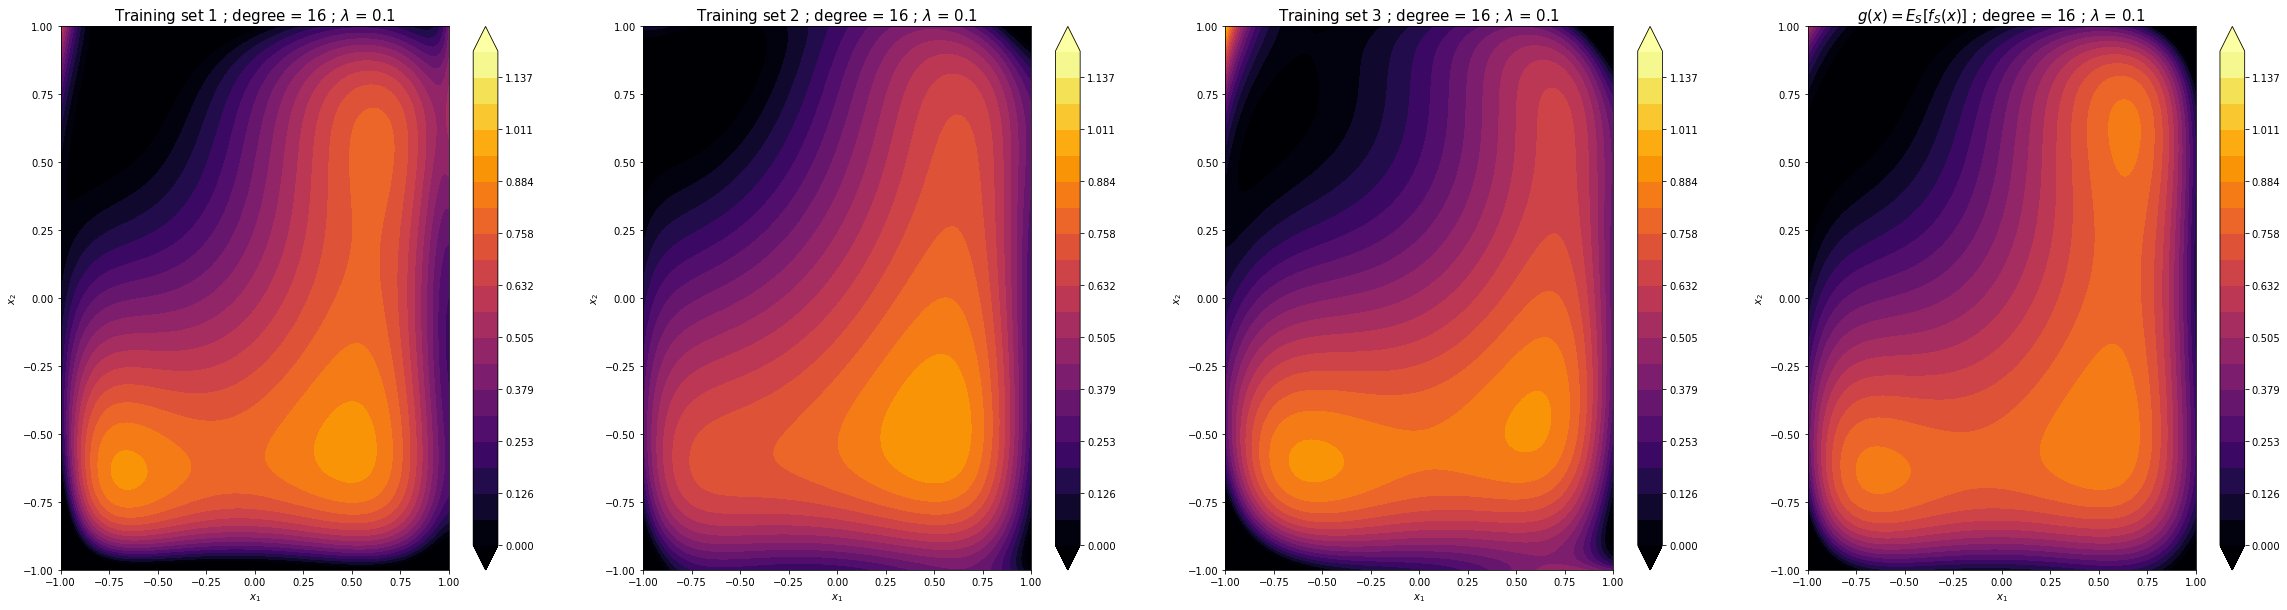

<Figure size 432x288 with 0 Axes>

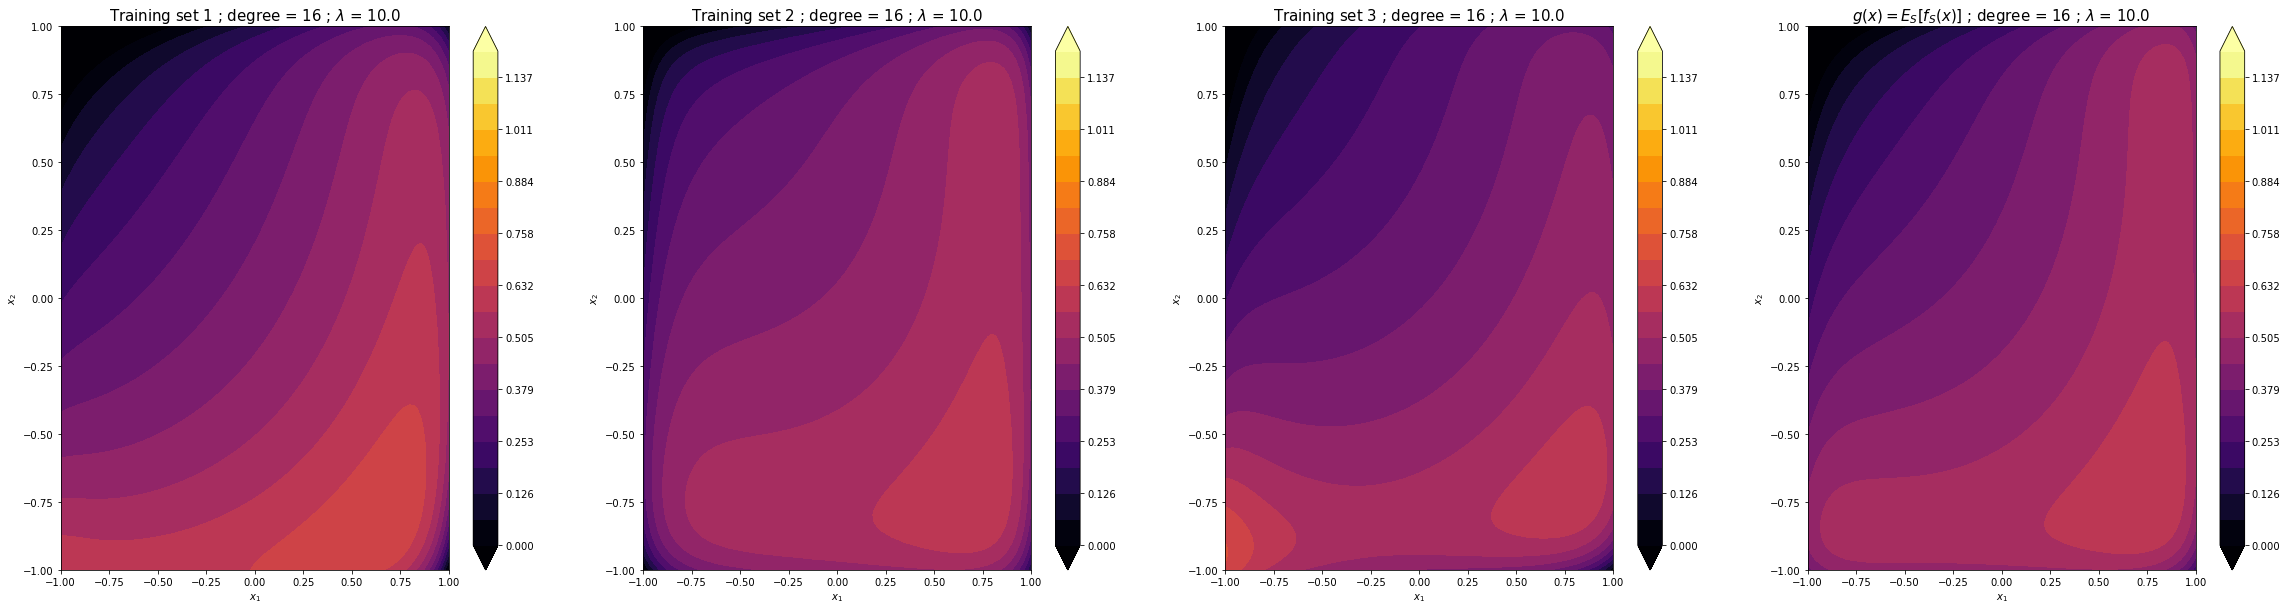

<Figure size 432x288 with 0 Axes>

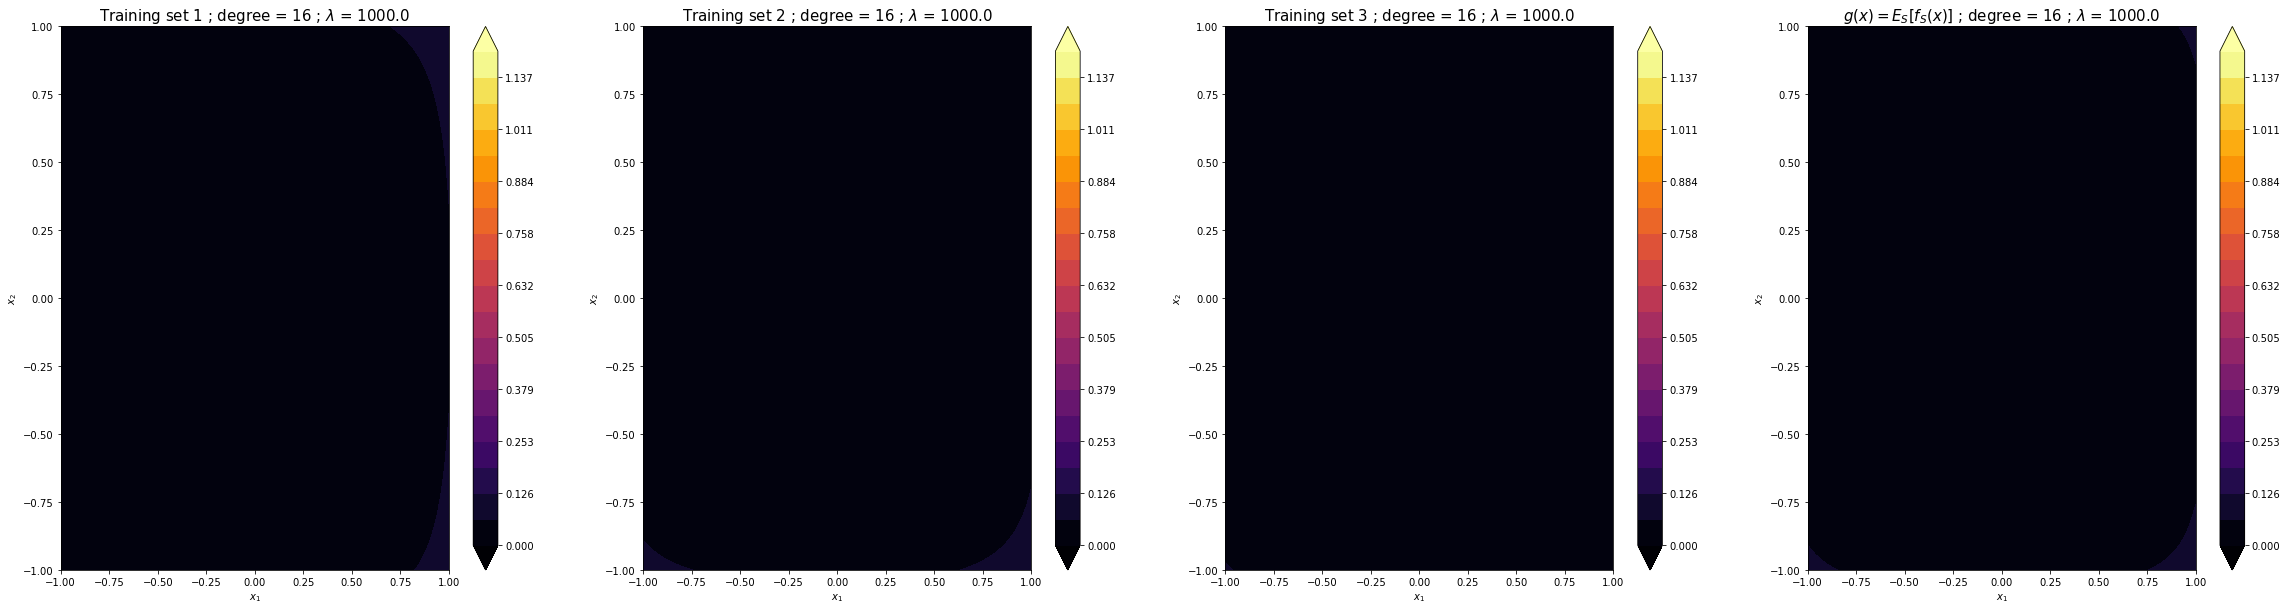

In [8]:
# Cell type : CodeWrite
import operator as op
from functools import reduce

def f_star(X):
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, -0.5])
    c = np.array([0.5, -0.5])
    Y = np.zeros(X.shape[0])
    return np.exp(-4 * np.sum((X - a)**2, axis = 1)) + np.exp(-4 * np.sum((X - b)**2, axis = 1)) + np.exp(-4 * np.sum((X - c)**2, axis = 1))

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  

def sample(num_training_samples):
    X_train = np.random.rand(num_training_samples, 2)
    X_train  = 2 * X_train - 1
    Y_train = f_star(X_train)
    return X_train, Y_train

def get_phi(X, dprime, degree):
    """
    Arguments:
    X: numpy array of shape(n, d), here d is always 2
    dprime: new dimension

    Returns:
    phi: numpy array of shape(n, d')
    """
    n = X.shape[0]
    phi = np.zeros((n, dprime))
    index = 0
    for j in range(degree + 1) :
        for k in range(j + 1) :
            phi[:, index] = X[:, 0]**k * X[:, 1]**(j - k)
            index += 1
    
    return phi

#defining the sample space
X1, X2 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_samplespace = np.c_[X1.ravel(), X2.ravel()]
Y_samplespace = f_star(X_samplespace)

#computing the phi for the sample space upto degree 16 terms for later
dprime_sample_space = ncr(18, 2)
phi_X_samplespace = get_phi(X_samplespace, dprime_sample_space, 16)

"""
#plotting the actual function contour for debugging
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10, forward = True)   

ax1 = plt.subplot(1, 1, 1)

plt.contourf(X1,X2,Y_samplespace.reshape(100, 100),levels=np.linspace(0.,1.2 , 20), extend = 'both')
plt.title("Actual Curve", fontsize = 15)
plt.colorbar()
"""

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    n = X_test.shape[0]
    dprime = wt_vector.shape[0]
    phi = get_phi(X_test, dprime, degree)
    
    Y_test_pred = np.matmul(phi, wt_vector)
    Y_test_pred = Y_test_pred.reshape(n)

    return Y_test_pred
            
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    dprime = ncr(degree + 2, 2)
    Z = np.matmul(phi_X_samplespace[:, : dprime], wt_vector)
    Z = Z.reshape(100, 100)

    plt.contourf(X1,X2,Z,levels=np.linspace(0.,1.2 , 20), cmap = 'inferno', extend = 'both')
    plt.title(title, fontsize = 15)
    plt.xlabel("$x_1$", fontsize = 10)
    plt.ylabel("$x_2$", fontsize = 10)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1] #always 2
    dprime = ncr(d + degree, degree)
    phi = get_phi(X_train, dprime, degree)

    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T, phi) + reg_param * np.identity(dprime)), phi.T), Y_train)

    return w

    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    dprime = ncr(degree + 2, 2)
    wt_vectors = np.zeros((100, dprime))
    for i in range(100) :
        X_train, Y_train = sample(num_training_samples)
        wt_vectors[i, :] = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)

    fs_wt_vec = np.average(wt_vectors, axis = 0)
    fig, ax = plt.subplots(1, 4)
    fig.set_size_inches(40, 10, forward = True)   

    ax1 = plt.subplot(1, 4, 1)
    visualise_polynomial_2d(wt_vectors[0, :], degree, title = "Training set 1 ; degree = " + str(degree) + " ; $\lambda$ = " +  str(reg_param))
    ax2 = plt.subplot(1, 4, 2)
    visualise_polynomial_2d(wt_vectors[1, :], degree, title = "Training set 2 ; degree = " + str(degree) + " ; $\lambda$ = " +  str(reg_param))
    ax3 = plt.subplot(1, 4, 3)
    visualise_polynomial_2d(wt_vectors[2, :], degree, title = "Training set 3 ; degree = " + str(degree) + " ; $\lambda$ = " +  str(reg_param))
    ax4 = plt.subplot(1, 4, 4)
    visualise_polynomial_2d(fs_wt_vec, degree, title = "$g(x) = E_{S}[f_{S}(x)]$ ; degree = " + str(degree) + " ; $\lambda$ = " +  str(reg_param))

    phi_X = phi_X_samplespace[:, : dprime]
    Y_pred = np.matmul(phi_X, np.transpose(wt_vectors))
    Y_avg = np.matmul(phi_X, fs_wt_vec)
    
    #computing variance
    Y_pred_avg = Y_pred - Y_avg.reshape(Y_avg.shape[0], 1)
    variance = np.sum(np.sum(Y_pred_avg**2, axis = 0))
    variance /= 100 * Y_pred.shape[0]

    #computing bias
    bias = np.sum((Y_avg - Y_samplespace)**2)/Y_avg.shape[0]

    #computing mse
    Y_pred_samplespace = Y_pred - Y_samplespace.reshape(Y_samplespace.shape[0], 1)
    mse = np.sum(np.sum(Y_pred_samplespace**2, axis = 0))
    mse /= 100 * Y_pred.shape[0]

    return bias, variance, mse

"""
X_train = np.array([[i, i+1] for i in range(50)])
X_train = X_train/25
X_train = X_train - 1
Y_train = f_star(X_train)
wt_vec = polynomial_regression_ridge_train(X_train, Y_train, degree = 8, reg_param = 0.001)
print(wt_vec)
visualise_polynomial_2d(wt_vec, 8, "Debugging")
"""

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        #print('================================')
        #print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        #print('Bias = '+str(round(b, 7)))
        #print('Variance = '+str(round(v, 7)))
        #print('Bias + Variance = '+str(b + v))
        #print('MSE = '+str(round(e, 7)))
        #print('Bias + Variance - MSE = '+str(round(b+v-e, 7)))

In [9]:
# Cell type: convenience


***
#### Bias and Variance
Note that the values are rounded off to 7 decimal places, and $d$ refers to the degree of the polynomial


Variance|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$|$\lambda=10^{3}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.0035802$|$0.0032131$|$0.0032972$|$0.003517$|$0.0016676$|$6.1e-06$|
$d$ $=$ $2$|$0.0048414$|$0.0054556$|$0.0049495$|$0.0052743$|$0.0020685$|$7.9e-06$|
$d$ $=$ $4$|$0.007554$|$0.0103004$|$0.0097585$|$0.0041286$|$0.0021575$|$9.3e-06$|
$d$ $=$ $8$|$0.3068153$|$0.0485881$|$0.0202122$|$0.0070326$|$0.0023499$|$1.64e-05$|
$d$ $=$ $16$|$0.3971917$|$0.162355$|$0.0596804$|$0.0132511$|$0.0026768$|$1.78e-05$|

Bias|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$|$\lambda=10^{3}$|
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.0551616$|$0.0552759$|$0.0552299$|$0.0551886$|$0.0657184$|$0.3077528$|
$d$ $=$ $2$|$0.034806$|$0.0349832$|$0.0345781$|$0.03493$|$0.061538$|$0.3033785$|
$d$ $=$ $4$|$0.0083979$|$0.0083206$|$0.008012$|$0.0091103$|$0.0598852$|$0.3027402$|
$d$ $=$ $8$|$0.0071826$|$0.0058844$|$0.0048757$|$0.0099409$|$0.0560074$|$0.301875$|
$d$ $=$ $16$|$0.0177588$|$0.0120208$|$0.0065782$|$0.0124485$|$0.052549$|$0.3013624$|

***

#### Observations / Trends
* The best curve, which fits the contour of the actual function well seems to be the one with degree = 8 and $\lambda$ = 0.1
* For a given degree, the bias tends to increase as $\lambda$ increases while variance tends to decrease. 
This occurs because, with a higher $\lambda$, we restrict the set of possible hypothesis (coefficents tend to be smaller), this results in a smaller variance. Furthermore, we restrict the complexity of the hypotheses, this results in a high bias as the model is not able to fit the training data points because it is simply not equipped to do so. This trend is clearly observed in the tables. 
* For higher degrees like 8 and 16, we note an anomaly in the trend for bias i.e. for the smaller values of $\lambda$, the bias tends to decrease with increasing $\lambda$. This can be attributed to the fact that, the sample mean we use to calculate $E_{S}[f_{S}(x)] = g_{S}(x)$ is done with only 50 data points. But with degree 8 and 16 polynomials with a very low $\lambda$, we have a very high variance. From the law of large numbers, the sample mean $M_n$ approaches the true mean $M$ in the limit that $n \rightarrow \infty$. But this limit converges quickly when the variance is small, whereas for a larger variance, we need a higher sample $n$ to approximate the true mean with the sample mean. 
* For a given $\lambda$, the bias decreases with increase in the degree while variance tends to increase.
This is because, with higher degree polynomials, we can have a larger set of possible hypothesis, this is reflected as an increase in the variance. Furthermore, the complexity of the model is high, therefore, it is capable enough to fit the training data points well. This is reflected as a low bias. This rough trend is also visible in the data. 

***

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




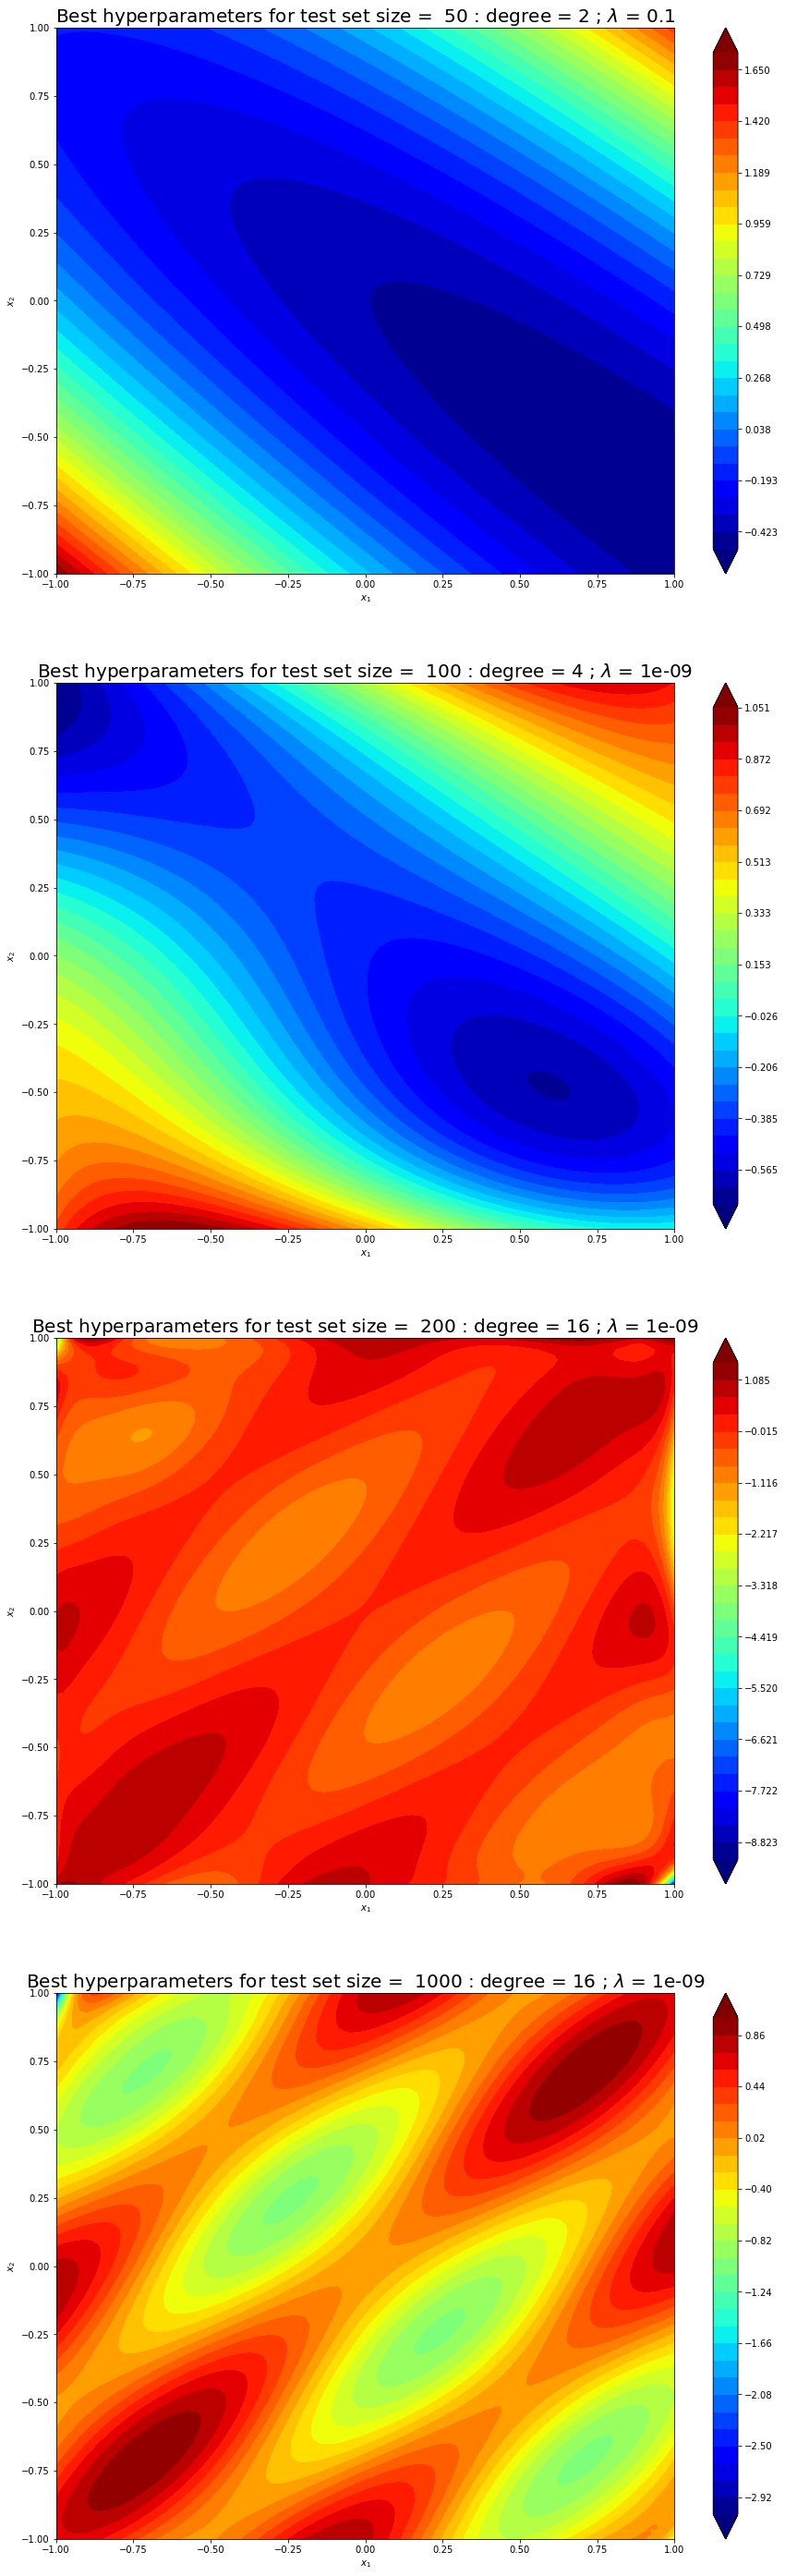

In [10]:
# Cell type : CodeWrite 
dataset = np.load('../../Data/dataset4_1.npz')
X_train = dataset['arr_0']
Y_train = dataset['arr_1']
X_test = dataset['arr_2']
Y_test = dataset['arr_3']

def compute_error(X, Y, wt_vector, degree, lam): 
    dprime = ncr(degree + 2, 2)
    phi_X = get_phi(X, dprime, degree)
    error =  (1/phi_X.shape[0]) * np.linalg.norm(np.matmul(phi_X, wt_vector) - Y)**2
    return error

train_error = {}
test_error = {}
min_cord = {}

fig, ax = plt.subplots(4, 1)
fig.set_size_inches(15, 50)

i = 1
for size in [50, 100, 200, 1000] :
    minimum = np.Inf  
    X_train_res = X_train[np.arange(0, size)]
    Y_train_res = Y_train[np.arange(0, size)]
    for degree in [1, 2, 4, 8, 16] :
        for lam in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1] :
            wt_vector = polynomial_regression_ridge_train(X_train_res, Y_train_res, degree, lam)
            train_error[(size, degree, lam)] = compute_error(X_train_res, Y_train_res, wt_vector, degree, lam)
            test_error[(size, degree, lam)] = compute_error(X_test, Y_test, wt_vector, degree, lam)
            if test_error[(size, degree, lam)] < minimum :
                minimum = test_error[(size, degree, lam)]
                min_cord[size] = (degree, lam, wt_vector)
    (min_degree, min_lam, min_wt_vector) = min_cord[size]
    #Code for plotting
    ax1 = plt.subplot(4, 1, i)
    i += 1
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    Z_plot = polynomial_regression_ridge_pred(X_plot, min_wt_vector, min_degree)
    Z_plot = Z_plot.reshape(100, 100)
    plt.contourf(xx, yy, Z_plot, levels = np.linspace(Z_plot.min(), Z_plot.max(), 30), cmap = 'jet', extend = 'both')
    plt.title("Best hyperparameters for test set size =  " + str(size) + " : degree = " + str(min_degree) + " ; $\lambda$ = " + str(min_lam), fontsize = 20)
    plt.xlabel("$x_1$", fontsize = 10)
    plt.ylabel("$x_2$", fontsize = 10)
    plt.colorbar()

***
#### Observations
* Here we can see that when the size of the training sample available low, and when using very high degree polynomials, regularization helps to limit overfitting and improves the test error significantly. 
* However, when the size of the training sample available is higher, regularization does not have that dramatic of an effect in improving the test errors. In some cases, when the number of training points is high, and we use a high degree polynomial, a very high regularization parameter $\lambda$ might significantly reduce the complexity of the model and actually lead to a decrease the test error. 
* We can also see that when our model is complex i.e. has very high degree, getting more amount of data can help in reducing the test error significantly. 
* However, when the model is very restrictive, i.e. has very low degree, collecting more training data would not be very useful and it has very little effect on the test error. 

***
#### Training and Test errors
##### Data set size  $=$ 50

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.25038$| $0.25038$| $0.25038$| $0.25038$| $0.25038$| $0.2559$| 
$d$ $=$ $2$|$0.13411$| $0.13411$| $0.13411$| $0.13411$| $0.13421$| $0.19748$| 
$d$ $=$ $4$|$0.10202$| $0.10202$| $0.10202$| $0.10202$| $0.10411$| $0.18064$| 
$d$ $=$ $8$|$0.00013$| $0.0002$| $0.01077$| $0.04172$| $0.08199$| $0.1632$| 
$d$ $=$ $16$|$0.0$| $1e-05$| $0.00132$| $0.03111$| $0.07002$| $0.15001$| 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.30127$| $0.30127$| $0.30127$| $0.30126$| $0.30084$| $0.27835$| 
$d$ $=$ $2$|$0.1579$| $0.1579$| $0.1579$| $0.15789$| $0.15674$| $0.20822$| 
$d$ $=$ $4$|$0.15733$| $0.15733$| $0.15733$| $0.15724$| $0.16183$| $0.19657$| 
$d$ $=$ $8$|$237.69006$| $172.50186$| $18.59425$| $0.99025$| $0.16516$| $0.19392$| 
$d$ $=$ $16$|$250.52196$| $232.02482$| $66.69768$| $2.33731$| $0.20396$| $0.19606$| 


##### Data set size  $=$ 100

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.25809$| $0.25809$| $0.25809$| $0.25809$| $0.25809$| $0.25874$| 
$d$ $=$ $2$|$0.13095$| $0.13095$| $0.13095$| $0.13095$| $0.13097$| $0.16497$| 
$d$ $=$ $4$|$0.11303$| $0.11303$| $0.11303$| $0.11303$| $0.11365$| $0.15237$| 
$d$ $=$ $8$|$0.04159$| $0.04159$| $0.04168$| $0.05801$| $0.0929$| $0.14489$| 
$d$ $=$ $16$|$1e-05$| $0.00048$| $0.00754$| $0.04173$| $0.0837$| $0.13954$| 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.27315$| $0.27315$| $0.27315$| $0.27315$| $0.27308$| $0.26862$| 
$d$ $=$ $2$|$0.15321$| $0.15321$| $0.15321$| $0.15321$| $0.15292$| $0.17571$| 
$d$ $=$ $4$|$0.14278$| $0.14278$| $0.14278$| $0.14281$| $0.14602$| $0.16898$| 
$d$ $=$ $8$|$0.71292$| $0.71132$| $0.58076$| $0.20364$| $0.16263$| $0.17117$| 
$d$ $=$ $16$|$54.08006$| $11.77042$| $23.41659$| $0.41785$| $0.18836$| $0.17416$| 


##### Data set size  $=$ 200


Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.24654$| $0.24654$| $0.24654$| $0.24654$| $0.24654$| $0.24664$| 
$d$ $=$ $2$|$0.13367$| $0.13367$| $0.13367$| $0.13367$| $0.13367$| $0.14755$| 
$d$ $=$ $4$|$0.11334$| $0.11334$| $0.11334$| $0.11334$| $0.11359$| $0.14444$| 
$d$ $=$ $8$|$0.06174$| $0.06174$| $0.06174$| $0.06395$| $0.09569$| $0.14119$| 
$d$ $=$ $16$|$3e-05$| $0.00109$| $0.01133$| $0.04446$| $0.0835$| $0.13376$| 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.26766$| $0.26766$| $0.26766$| $0.26766$| $0.26765$| $0.26623$| 
$d$ $=$ $2$|$0.14578$| $0.14578$| $0.14578$| $0.14578$| $0.14575$| $0.15868$| 
$d$ $=$ $4$|$0.13117$| $0.13117$| $0.13117$| $0.13116$| $0.13083$| $0.15709$| 
$d$ $=$ $8$|$0.13736$| $0.13736$| $0.13698$| $0.11818$| $0.11397$| $0.15645$| 
$d$ $=$ $16$|$0.03715$| $0.08371$| $0.17081$| $0.0869$| $0.11121$| $0.15224$| 


##### Data set size  $=$ 1000

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.24073$| $0.24073$| $0.24073$| $0.24073$| $0.24073$| $0.24073$| 
$d$ $=$ $2$|$0.13882$| $0.13882$| $0.13882$| $0.13882$| $0.13882$| $0.13972$| 
$d$ $=$ $4$|$0.12502$| $0.12502$| $0.12502$| $0.12502$| $0.12503$| $0.13417$| 
$d$ $=$ $8$|$0.07674$| $0.07674$| $0.07674$| $0.07685$| $0.09484$| $0.12844$| 
$d$ $=$ $16$|$3e-05$| $0.00045$| $0.00653$| $0.03842$| $0.08499$| $0.12169$| 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$
-|-:|-:|-:|-:|-:|-
$d$ $=$ $1$|$0.26253$| $0.26253$| $0.26253$| $0.26253$| $0.26253$| $0.26253$| 
$d$ $=$ $2$|$0.14243$| $0.14243$| $0.14243$| $0.14243$| $0.14244$| $0.14452$| 
$d$ $=$ $4$|$0.12708$| $0.12708$| $0.12708$| $0.12708$| $0.12724$| $0.14094$| 
$d$ $=$ $8$|$0.08481$| $0.08481$| $0.0848$| $0.08391$| $0.09782$| $0.13499$| 
$d$ $=$ $16$|$0.0012$| $0.00149$| $0.01096$| $0.04966$| $0.09074$| $0.12782$| 

***

#### Best (degree, $\lambda$) combinations

Best Fit | degree | $\lambda$ |
-|-:|-:
Size = 50|$2$ |$0.1$ 
Size = 100|$4$ |$10^{-9}$ 
Size = 200|$16$ |$10^{-9}$ 
Size = 1000|$16$ |$10^{-9}$

***

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












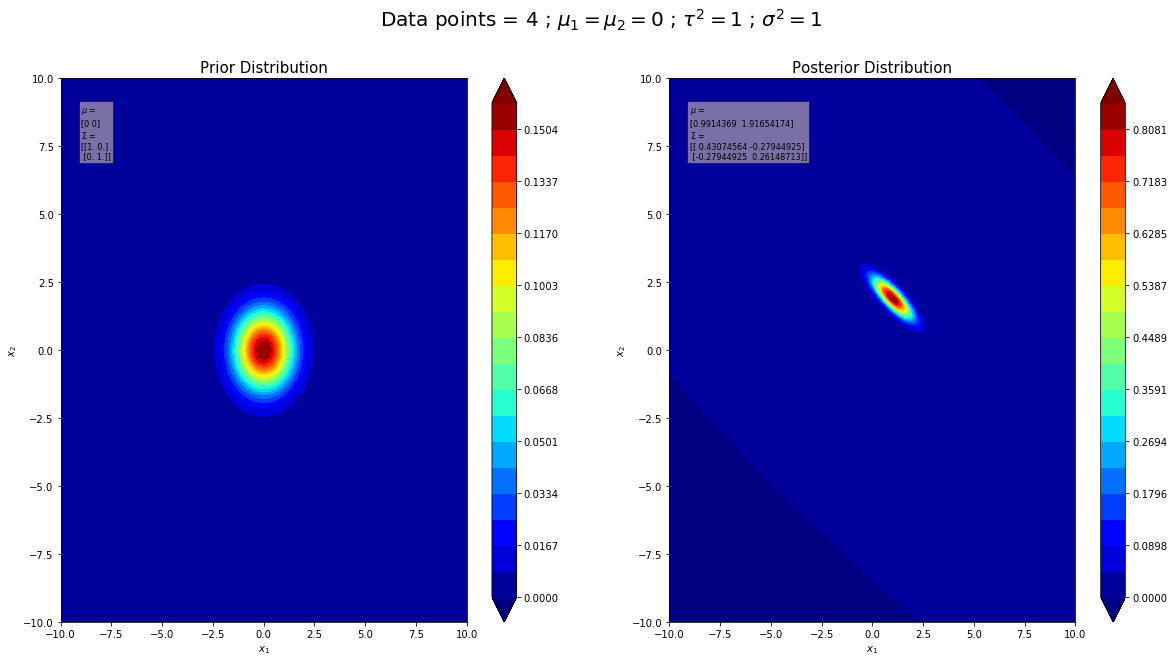

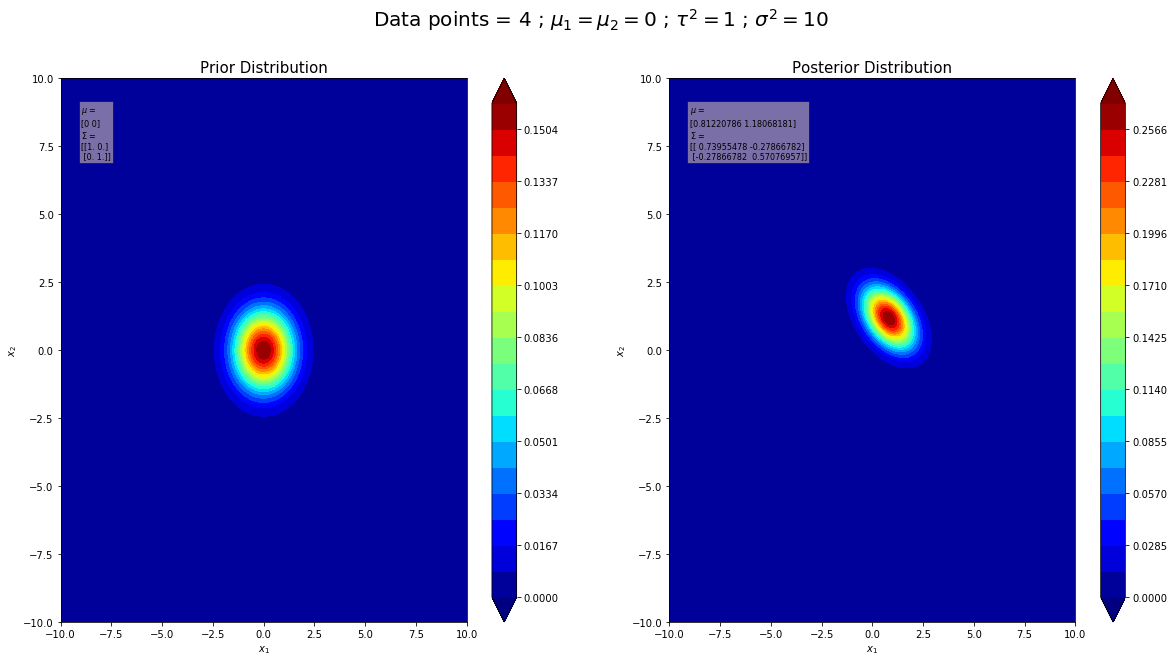

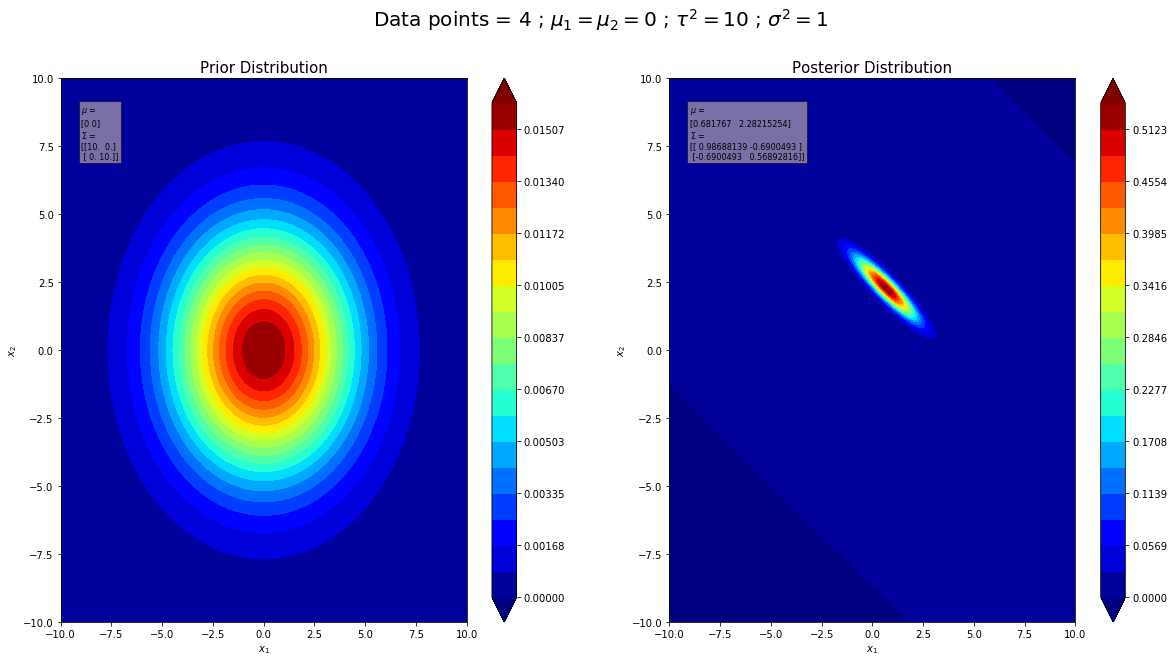

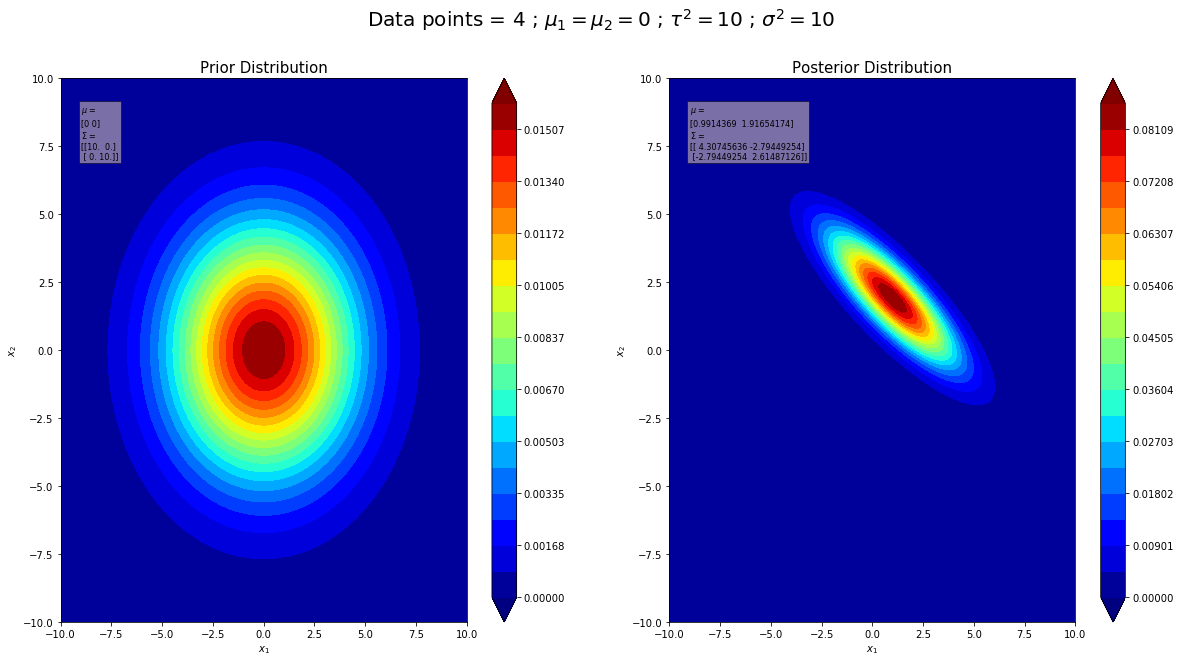

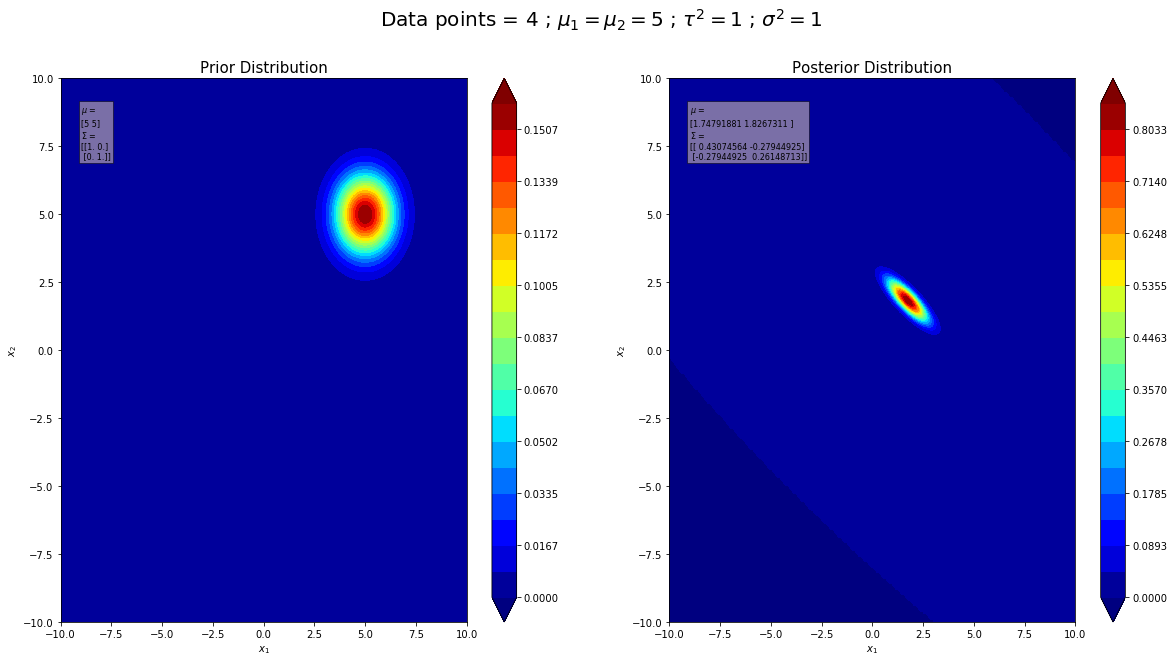

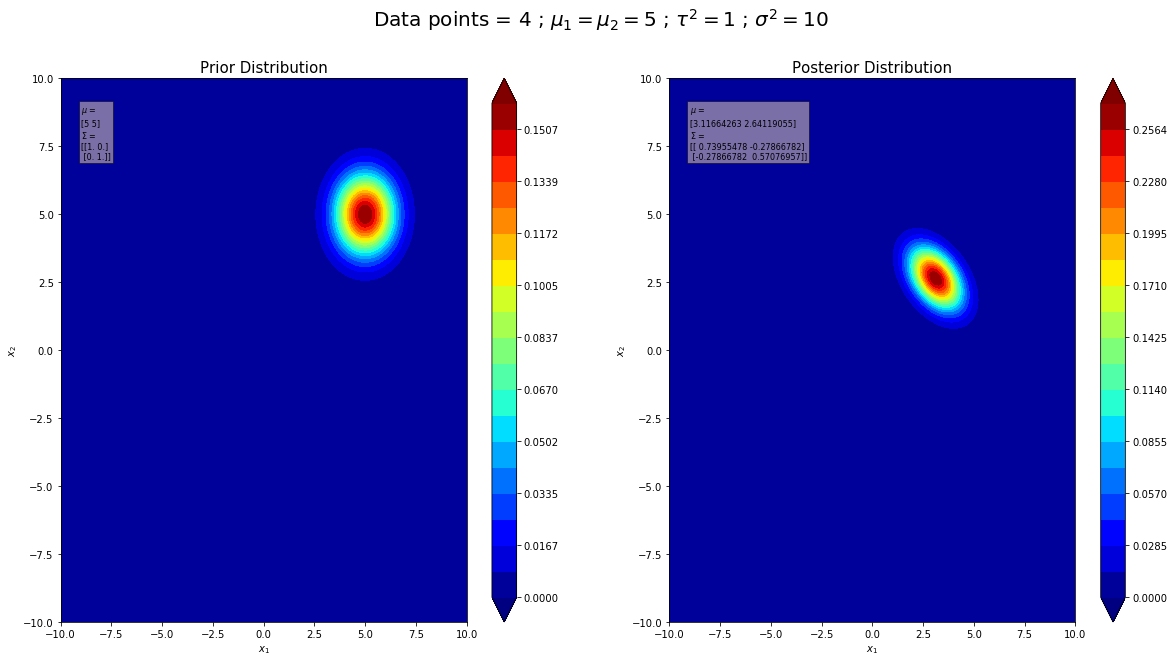

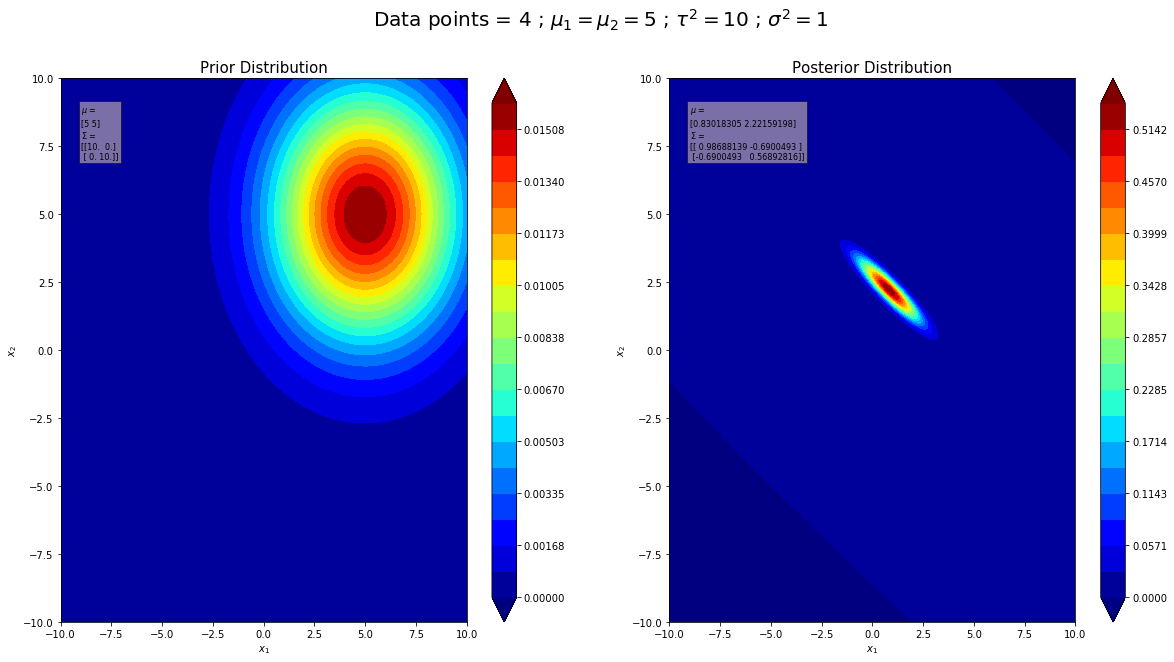

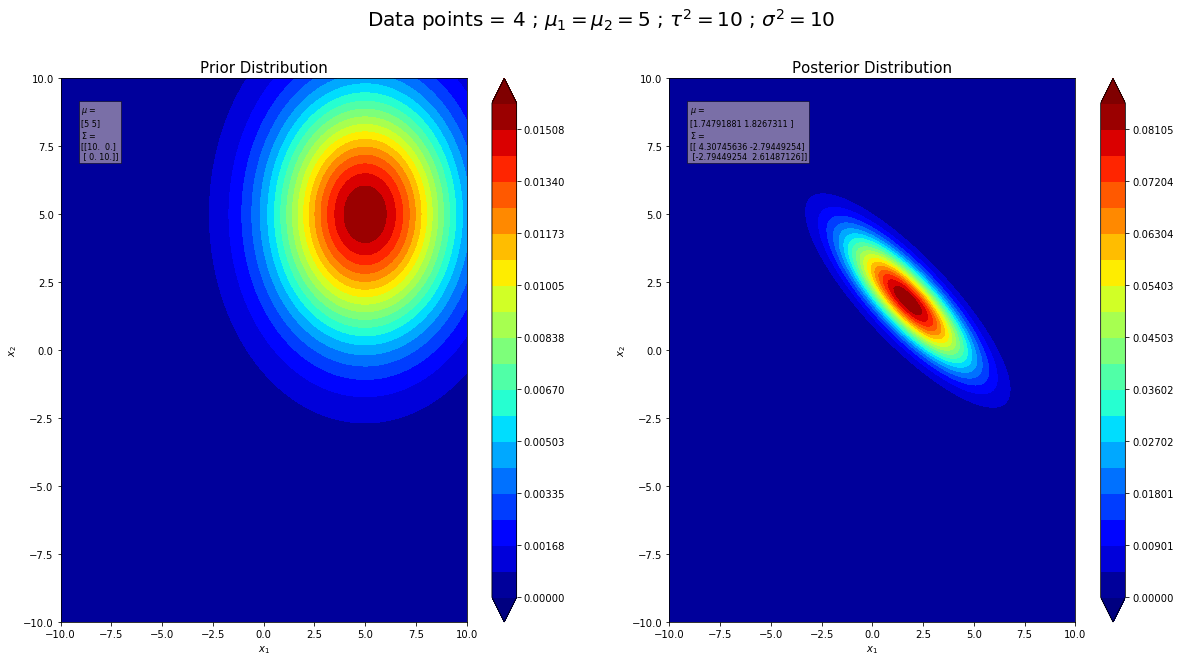

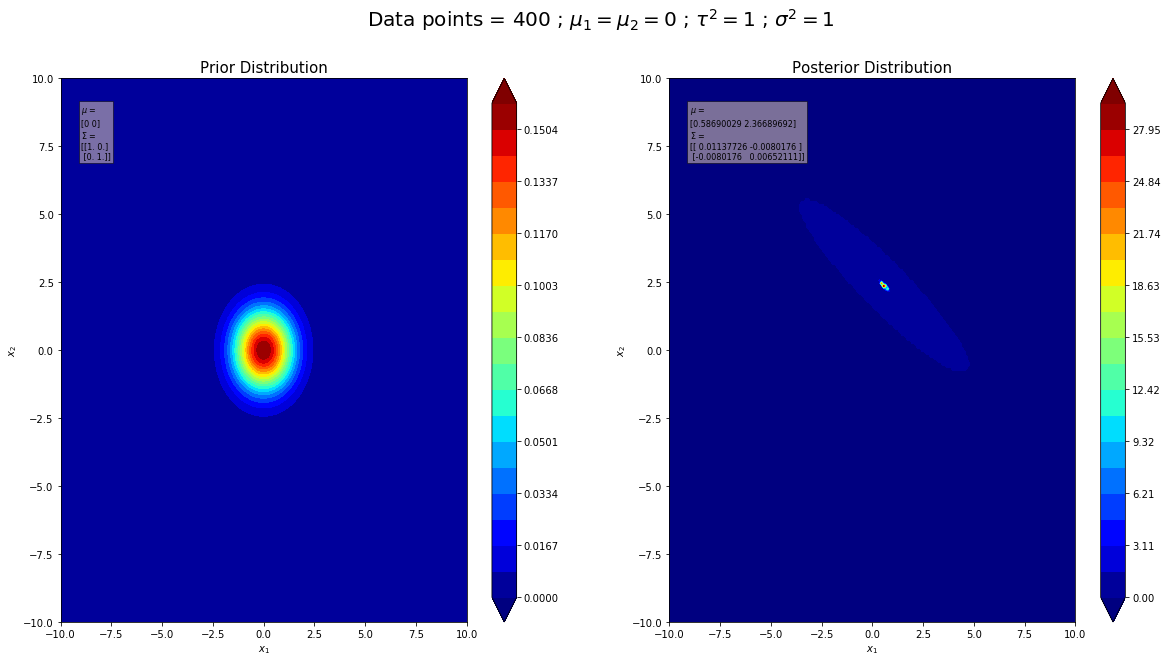

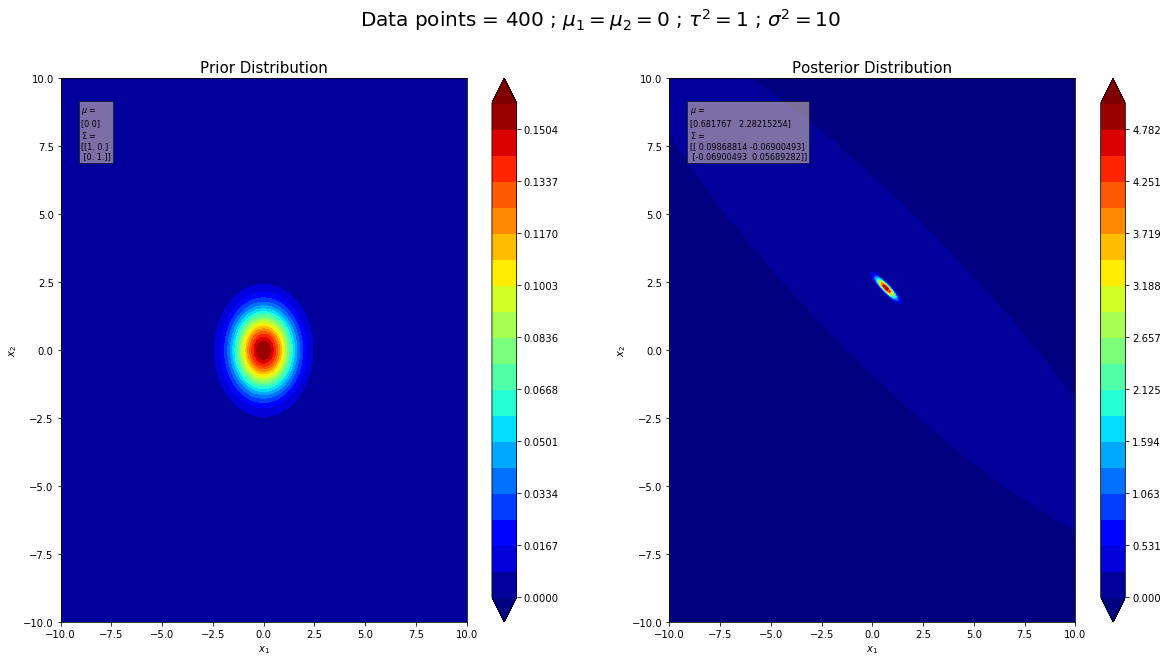

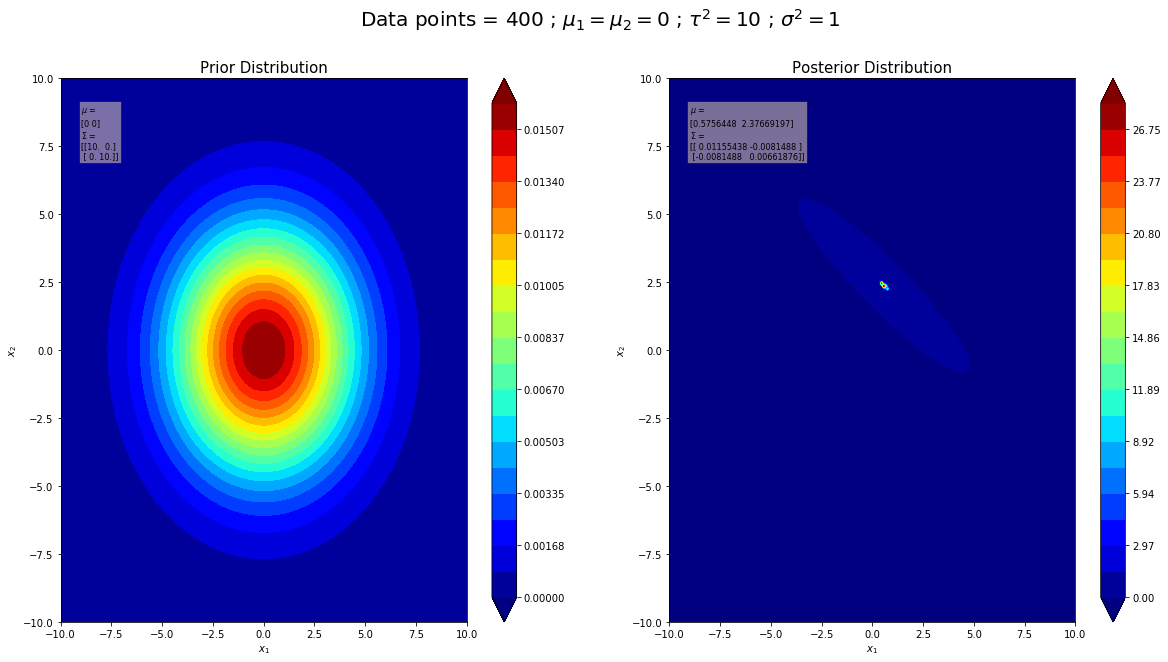

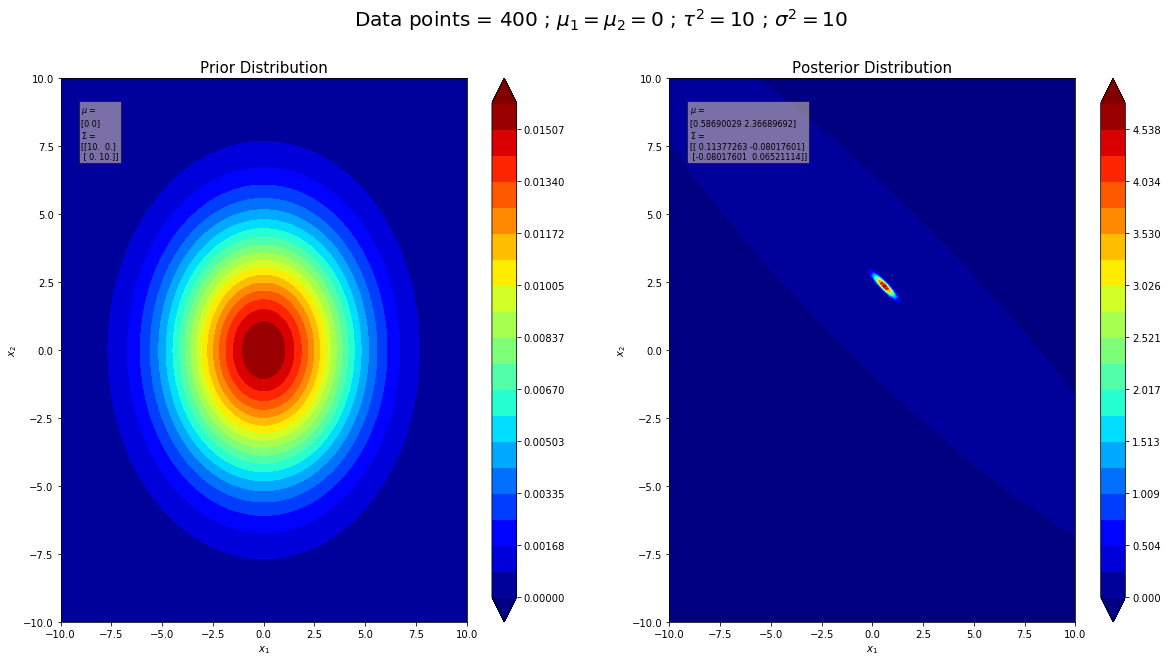

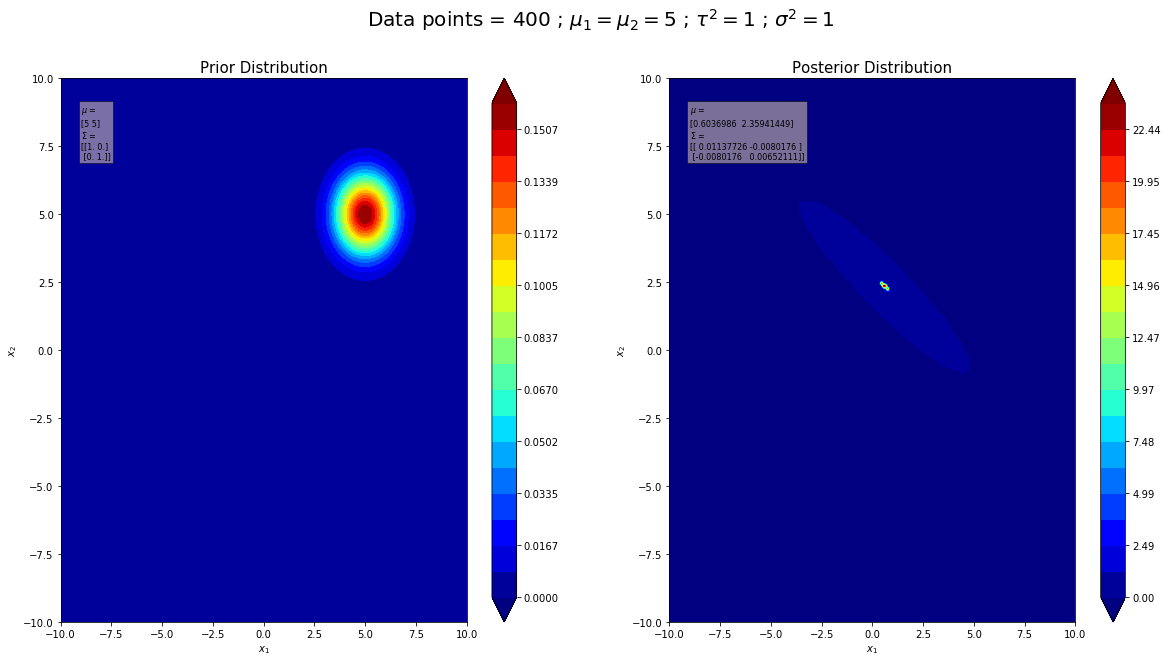

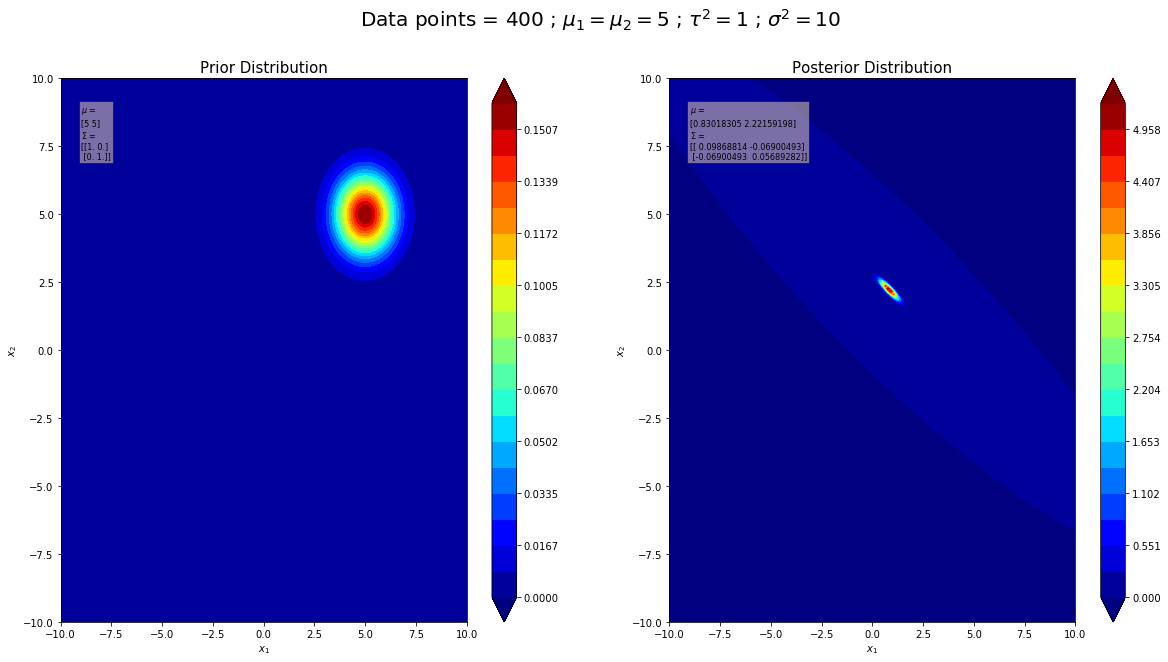

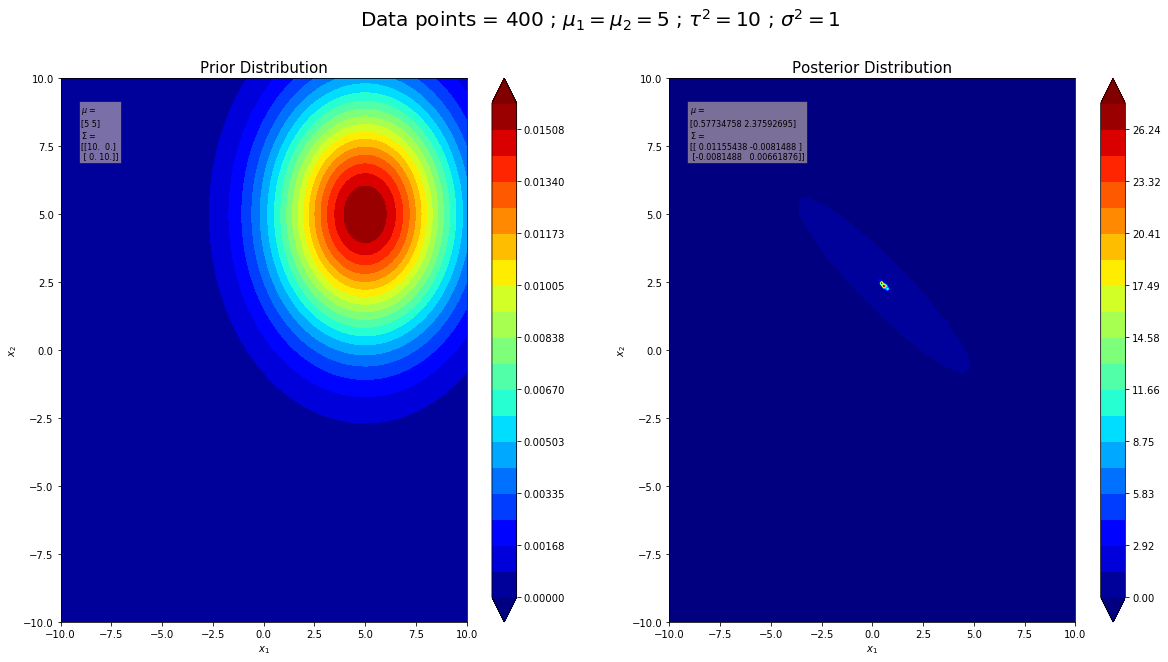

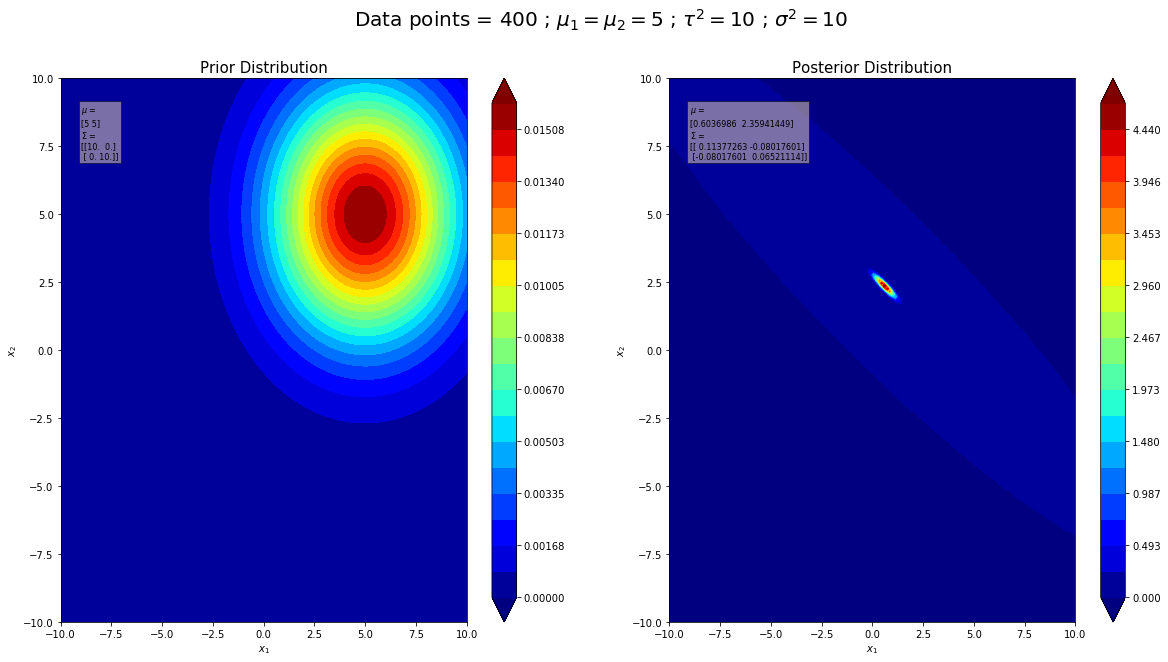

In [11]:
# Cell type : CodeWrite 
def posterior_distribution(prior_mean, prior_covariance, sigma_sqrd, X_train, Y_train):
    prior_covariance_inv = np.linalg.inv(prior_covariance)
    posterior_covariance_inv = prior_covariance_inv + (1/sigma_sqrd) * np.matmul(X_train.T, X_train) 
    posterior_covariance = np.linalg.inv(posterior_covariance_inv)
    posterior_mean = np.matmul(posterior_covariance, np.matmul(prior_covariance_inv, prior_mean) + (1/sigma_sqrd) * np.matmul(X_train.T, Y_train))
    return posterior_mean, posterior_covariance

def gaussian(X, mean, covariance) :
    exp = lambda x, mu, q : np.exp(-0.5 * np.matmul(np.matmul(np.transpose(x - mu), q), (x - mu))) 

    Y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        Y[i] = exp(X[i].reshape(2, 1), mean.reshape(2, 1), np.linalg.inv(covariance))
        Y[i] /= (2 * np.pi) * (np.linalg.det(covariance))**(1/2)
    
    return Y

def plot_gaussian(mean, covariance, title) :
    xx, yy = np.meshgrid(np.linspace(-10, +10, 200), np.linspace(-10, +10, 200))
    X = np.c_[xx.ravel(), yy.ravel()]
    Y = gaussian(X, mean, covariance)
    Y = Y.reshape(200, 200)

    plt.contourf(xx, yy, Y, levels = np.linspace(Y.min(), Y.max(), 20), cmap = 'jet', extend = 'both')
    plt.title(title, fontsize = 15)
    plt.xlabel("$x_1$", fontsize = 10)
    plt.ylabel("$x_2$", fontsize = 10)
    plt.colorbar()
    

X_data = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]]).reshape(4, 2)
Y_data = np.array([5.1, 6.1, 4.2, 2.9]).reshape(4, 1)
X_repeated_data = np.tile(X_data, (100, 1))
Y_repeated_data = np.tile(Y_data, (100, 1))
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)
for mean in [0, 5] :
    for tau_sqrd in [1, 10] :
        for sigma_sqrd in [1, 10] :
            fig, ax = plt.subplots(1, 2)
            fig.set_size_inches(20, 10)
            fig.suptitle("Data points = 4 ; $\mu_1 = \mu_2 = $" + str(mean) + " ; $\\tau^{2} = $" + str(tau_sqrd) + " ; $\sigma^{2} = $" + str(sigma_sqrd), fontsize = 20)

            prior_mean = np.array([mean, mean]).reshape(2, 1)
            prior_covariance = tau_sqrd * np.identity(2)
            prior_text = "$\mu$ = \n" + str(prior_mean.reshape(2)) + "\n$\Sigma$ = \n" + str(prior_covariance)
            posterior_mean, posterior_covariance = posterior_distribution(prior_mean, prior_covariance, sigma_sqrd, X_data, Y_data)
            posterior_text = "$\mu$ = \n" + str(posterior_mean.reshape(2)) + "\n$\Sigma$ = \n" + str(posterior_covariance)
            ax1 = plt.subplot(1, 2, 1)
            plot_gaussian(prior_mean, prior_covariance, "Prior Distribution")
            ax1.text(0.05, 0.95, prior_text, transform = ax1.transAxes, fontsize = 8, verticalalignment='top', bbox=props)
            ax2 = plt.subplot(1, 2, 2)
            plot_gaussian(posterior_mean, posterior_covariance, "Posterior Distribution")
            ax2.text(0.05, 0.95, posterior_text, transform = ax2.transAxes, fontsize = 8, verticalalignment='top', bbox=props)

for mean in [0, 5] :
    for tau_sqrd in [1, 10] :
        for sigma_sqrd in [1, 10] :
            fig, ax = plt.subplots(1, 2)
            fig.set_size_inches(20, 10)
            fig.suptitle("Data points = 400 ; $\mu_1 = \mu_2 = $" + str(mean) + " ; $\\tau^{2} = $" + str(tau_sqrd) + " ; $\sigma^{2} = $" + str(sigma_sqrd), fontsize = 20)

            prior_mean = np.array([mean, mean]).reshape(2, 1)
            prior_covariance = tau_sqrd * np.identity(2)
            prior_text = "$\mu$ = \n" + str(prior_mean.reshape(2)) + "\n$\Sigma$ = \n" + str(prior_covariance)
            posterior_mean, posterior_covariance = posterior_distribution(prior_mean, prior_covariance, sigma_sqrd, X_repeated_data, Y_repeated_data)
            posterior_text = "$\mu$ = \n" + str(posterior_mean.reshape(2)) + "\n$\Sigma$ = \n" + str(posterior_covariance)
            
            ax1 = plt.subplot(1, 2, 1)
            plot_gaussian(prior_mean, prior_covariance, "Prior Distribution")
            ax1.text(0.05, 0.95, prior_text, transform = ax1.transAxes, fontsize = 8, verticalalignment='top', bbox=props)
            ax2 = plt.subplot(1, 2, 2)
            plot_gaussian(posterior_mean, posterior_covariance, "Posterior Distribution")
            ax2.text(0.05, 0.95, posterior_text, transform = ax2.transAxes, fontsize = 8, verticalalignment='top', bbox=props)


***
#### Assumptions
* Prior Distribution of $W$
   $$ W \sim \mathcal{N}\Big(\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, \Sigma = \tau^2 I\Big)$$
* $Y_i = W \cdot X_i + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \sigma^2)$

***

#### Posterior Distribution
From Bayes rule, the Posterior Distribution also turns out to be normal too with the parameters
* $W|X, Y \sim \mathcal{N}(\mu_p, \Sigma_p)$ where, $$\Sigma_p^{-1} = \Sigma^{-1} + \frac{1}{\sigma^{2}} X^{T} X = \frac{1}{\tau^{2}}I + \frac{1}{\sigma^{2}} X^{T} X$$
$$\mu_p = \Sigma_p(\Sigma^{-1}\mu + \frac{1}{\sigma^{2}}X^{T}Y) = \Sigma_p(\frac{1}{\tau^{2}}\mu + \frac{1}{\sigma^{2}}X^{T}Y)$$
***

#### Observations
The four parameters in this problem are the mean $\mu$ of the prior, the covariance $\tau^{2}I$ of the prior, the variance of the gaussian noise $\sigma^{2}$ and the number of data points. 
* We can note that the factor $\beta = 1/\sigma^{2}$ influences the weightage given to the training data terms in both the formula for the posterior mean as well as posterior covariance. A high $\beta$ would imply a higher weightage given to the data terms i.e. a high confidence in the data. Essentially the posterior mean and covariance will change according to the whatever the data dictates even if there is very little amount of evidence to the contary. However, a low value of $\beta$ would mean that the mean and the covariance will change significantly only if there is a lot of data evidence to the contrary to shift from the prior distribution. This trend can be observed in the plots too. 
* A high value of $\tau^{2}$ indicates lesser confidence in the prior knowledge, therefore, even with less number of data points, the distribution changes significantly from the prior. However, a low value of $\tau^{2}$ indicates a very high confidence in the prior, therefore, we need a lot of data points of evidence to the contrary to change the mean of the distribution. 
***